# Environment Setup

# 1. Import Libraries

In [1]:
import re
import unicodedata
import nltk
import random
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from collections import Counter
import csv
random.seed(42)

print("All imports working!")

All imports working!


# 2. Data Loading

In [2]:
# Read text files from the local "dataset" folder

# YORUBA
with open('dataset/bot_data_yoruba.txt', 'r', encoding='utf-8') as f:
    bot_data_yoruba = f.read()
with open('dataset/human_data_yoruba.txt', 'r', encoding='utf-8') as f:
    human_data_yoruba = f.read()

# KASHMIRI
with open('dataset/bot_data_kashmiri.txt', 'r', encoding='utf-8') as f:
     bot_data_kashmiri = f.read()
with open('dataset/human_data_kashmiri.txt', 'r', encoding='utf-8') as f:
     human_data_kashmiri = f.read()

                Word Count  Vocab Size
Dataset                               
Bot Yoruba           22096        6248
Human Yoruba        949580       54866
Bot Kashmiri         20146        6511
Human Kashmiri      120842       18367 



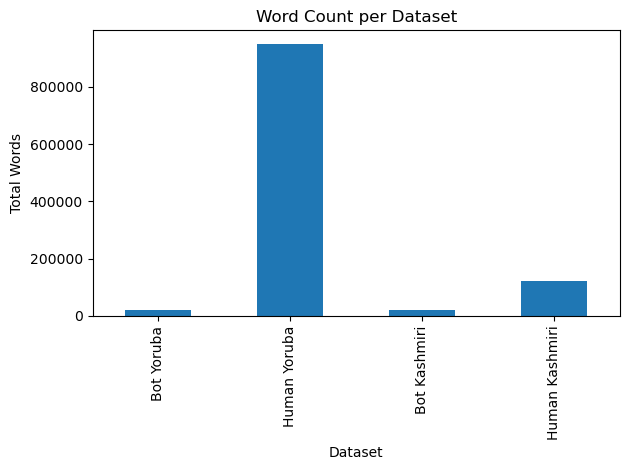

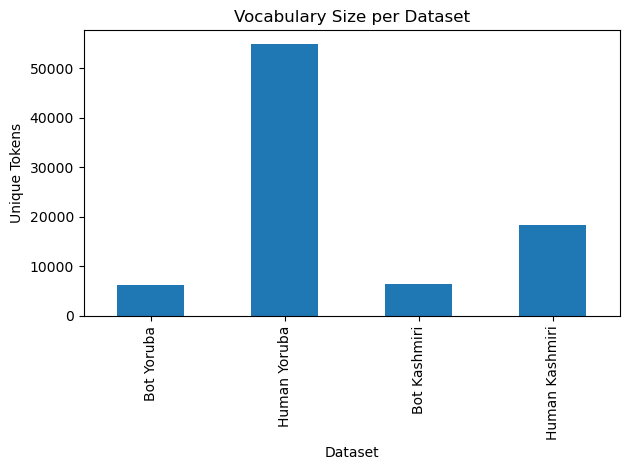

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Load your data (note the encoding keyword)
with open('dataset/bot_data_yoruba.txt',   'r', encoding='utf-8') as f:
    bot_y = f.read()
with open('dataset/human_data_yoruba.txt', 'r', encoding='utf-8') as f:
    hum_y = f.read()
with open('dataset/bot_data_kashmiri.txt', 'r', encoding='utf-8') as f:
    bot_k = f.read()
with open('dataset/human_data_kashmiri.txt', 'r', encoding='utf-8') as f:
    hum_k = f.read()

datasets = {
    'Bot Yoruba':     bot_y,
    'Human Yoruba':   hum_y,
    'Bot Kashmiri':   bot_k,
    'Human Kashmiri': hum_k
}

# 2. Compute metrics
records = []
for name, text in datasets.items():
    words = text.split()
    records.append({
        'Dataset':    name,
        'Word Count': len(words),
        'Vocab Size': len(set(words))
    })

df = pd.DataFrame(records).set_index('Dataset')

# 3. Print table
print(df, '\n')

# 4. Plot Word Counts
plt.figure()
df['Word Count'].plot.bar()
plt.title('Word Count per Dataset')
plt.ylabel('Total Words')
plt.tight_layout()
plt.show()

# 5. Plot Vocabulary Sizes
plt.figure()
df['Vocab Size'].plot.bar()
plt.title('Vocabulary Size per Dataset')
plt.ylabel('Unique Tokens')
plt.tight_layout()
plt.show()

                Word Count  Vocab Size
Dataset                               
Bot Yoruba           22096        6248
Human Yoruba        949580       54866
Bot Kashmiri         20146        6511
Human Kashmiri      120842       18367 



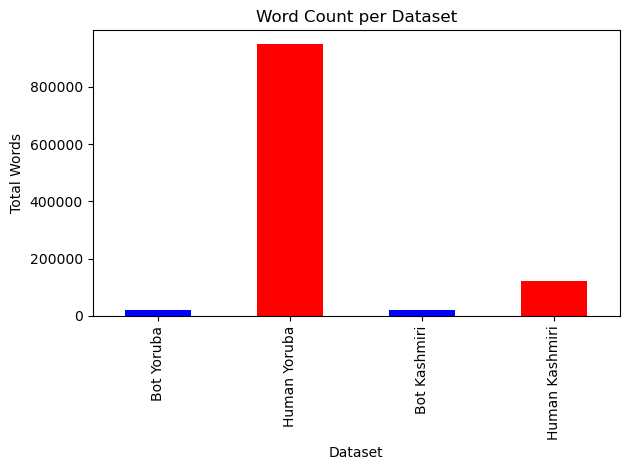

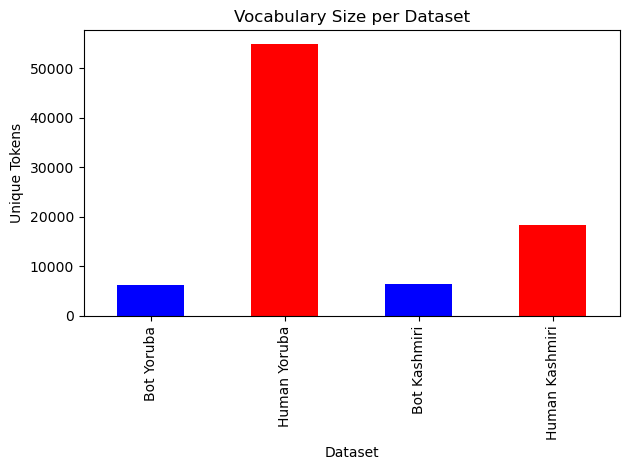

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Load your data with correct encoding
with open('dataset/bot_data_yoruba.txt',   'r', encoding='utf-8') as f:
    bot_y = f.read()
with open('dataset/human_data_yoruba.txt', 'r', encoding='utf-8') as f:
    hum_y = f.read()
with open('dataset/bot_data_kashmiri.txt', 'r', encoding='utf-8') as f:
    bot_k = f.read()
with open('dataset/human_data_kashmiri.txt', 'r', encoding='utf-8') as f:
    hum_k = f.read()

datasets = {
    'Bot Yoruba':     bot_y,
    'Human Yoruba':   hum_y,
    'Bot Kashmiri':   bot_k,
    'Human Kashmiri': hum_k
}

# 2. Compute metrics
records = []
for name, text in datasets.items():
    words = text.split()
    records.append({
        'Dataset':    name,
        'Word Count': len(words),
        'Vocab Size': len(set(words))
    })

df = pd.DataFrame(records).set_index('Dataset')

# 3. Print table
print(df, '\n')

# 4. Define two colors and alternate them
colors = ['blue', 'red', 'blue', 'red']

# 5. Plot Word Counts with two colors
plt.figure()
df['Word Count'].plot.bar(color=colors)
plt.title('Word Count per Dataset')
plt.ylabel('Total Words')
plt.tight_layout()
plt.show()

# 6. Plot Vocabulary Sizes with two colors
plt.figure()
df['Vocab Size'].plot.bar(color=colors)
plt.title('Vocabulary Size per Dataset')
plt.ylabel('Unique Tokens')
plt.tight_layout()
plt.show()

## 3. Text Summarization

In [3]:
def summarize_text(text, label="Text"):
    """
    Print a simple summary of the given text:
      1. Total word count
      2. First 20 words (as a preview)
    """
    # Split the text into words
    words = text.split()
    
    # Count total words
    num_words = len(words)
    print(f"{label} — Number of words: {num_words}")
    
    # Select the first 200 words for preview (or fewer, if the text is short)
    preview = words[:200]
    preview_str = " ".join(preview)
    print(f"{label} — First 200 words: {preview_str}\n")


# Example usage:

# Summarize the bot-generated Yoruba text
summarize_text(bot_data_yoruba, label="Bot-generated Yoruba")

# Summarize the human-written Yoruba text
summarize_text(human_data_yoruba, label="Human-written Yoruba")

# Summarize the bot-generated Kashmiri text
summarize_text(bot_data_kashmiri, label="Bot-generated Kashmiri")

# Summarize the human-written Kashmiri text
summarize_text(human_data_kashmiri, label="Human-written Kashmiri")

Bot-generated Yoruba — Number of words: 22096
Bot-generated Yoruba — First 200 words: Ní agbègbè Ìwrùn Nàìjíríà Yòrùbá ti dá ìtàn ìbíl kan tó gbooro plú èdè ìe ìsìn lítírés àti ìmò ojúsìn IléIf ìlú ìbíl tí wn gbà sí kèldá ni a kà sí kànàyà ìran Yòrùbá ib ni àgbélébú ìtànìbíl ti br plú Odùduwà Obàtálá rúnmìlà àti àwn irúnmòlé mìíràn Ní gbogbo àgbègbè tó lórí ìtàn YòrùbáÓyó Ìbàdàn Ìjbú Èkìtì Ègbáàwn aáájúòèlú atij àti onímìtàn ti da àfihàn ìtàn àwn ìjba ìrìnàjò ènìyàn ìbáep àti ìgbyàwó fún p grùnún dún péré ùgbn ìrìnàjò Yòrùbá ò dá síb nígbà dé àkókò ìjba òyìnbó àwn ba àti olóyè ti kk kojú ìàkóso alágbára Pńtí náà wn sì jíròrò láti pa àà m níwájú lyà àmdémáe dàgbà Àmdé ilé Yòrùbá tó ks ní DO Fágúnwà fi ìtàn Ògbójú d nínú Igbó Irúnmìlà hàn pé a lè lo èdè àtwdá àti àlàyé aáájú láti tsíwájú ìrètí àti ìfkànsìn Amos Tútùòlá tún fi The PalmWine Drinkard e àfihàn ìrìnàjò ìm kàn ní ayédèrú ìtànoníran Ní kànàyà Yòrùbá ni Ìwà Omolúàbì ìe rere ìforítì oòtó àìtànkárà inúrè àti ìbágb plú ìbáep òwò j 

# 4. Frequent Words Analysis

In [4]:
import re
from collections import Counter

# Define regex patterns for each language to keep only letters and spaces
PATTERNS = {
    'en':      r'[^a-z\s]',                             # English letters a–z
    'yoruba':  r'[^a-zàáâãèéêìíîòóôõùúûẹọṣń\s]',        # Yoruba letters + diacritics
    'kashmiri':r'[^\u0600-\u06FF\s]'                   # Kashmiri (Arabic script block)
}


def preprocess_text(text: str, language: str = 'en') -> list[str]:
    """
    Clean and tokenize text for the given language:
      1. Lowercase (no-op for scripts without case).
      2. Remove any character not in the language's alphabet.
      3. Split into tokens on whitespace.
    """
    # Lowercase the text (affects only Latin-based scripts)
    clean = text.lower()
    
    # Apply language-specific regex to strip unwanted characters
    pattern = PATTERNS.get(language, PATTERNS['en'])
    clean = re.sub(pattern, '', clean)
    
    # Split on whitespace to generate token list
    return clean.split()


def count_frequencies(tokens: list[str]) -> Counter:
    """
    Return a Counter mapping each token to its frequency.
    """
    return Counter(tokens)


def get_most_common(corpus_text: str, language: str = 'en', top_n: int = 50) -> list[tuple[str, int]]:
    """
    Compute and return the top N most common tokens in the text.
    """
    tokens = preprocess_text(corpus_text, language)
    freq = count_frequencies(tokens)
    return freq.most_common(top_n)


def find_frequent_words(text: str, threshold: int = 150) -> list[str]:
    """
    Identify and return words occurring at least `threshold` times in `text`.
    """
    # Split raw text (preserving original tokens)
    tokens = text.split()
    # Count occurrences of each token
    counts = Counter(tokens)
    # Select tokens whose count meets or exceeds threshold
    return [word for word, cnt in counts.items() if cnt >= threshold]


if __name__ == '__main__':
    # Load each dataset from files
    with open('dataset/human_data_yoruba.txt', encoding='utf-8') as f:
        human_data_yoruba = f.read()
    with open('dataset/human_data_kashmiri.txt', encoding='utf-8') as f:
        human_data_kashmiri = f.read()
    with open('dataset/bot_data_yoruba.txt', encoding='utf-8') as f:
        bot_data_yoruba = f.read()
    with open('dataset/bot_data_kashmiri.txt', encoding='utf-8') as f:
        bot_data_kashmiri = f.read()

    # Print top common words
    print('Top Human Yoruba words:', get_most_common(human_data_yoruba, language='yoruba'))
    print('Top Human Kashmiri words:', get_most_common(human_data_kashmiri, language='kashmiri'))
    print('Top Bot Yoruba words:',    get_most_common(bot_data_yoruba, language='yoruba'))
    print('Top Bot Kashmiri words:',  get_most_common(bot_data_kashmiri, language='kashmiri'))

    # Print words occurring at least 150 times in each corpus
    print('\nFrequent words (>=150 occurrences):')
    print('Human Yoruba:',  find_frequent_words(human_data_yoruba))
    print('Bot Yoruba:',    find_frequent_words(bot_data_yoruba))
    print('Human Kashmiri:',find_frequent_words(human_data_kashmiri))
    print('Bot Kashmiri:',  find_frequent_words(bot_data_kashmiri))

Top Human Yoruba words: [('si', 46870), ('o', 38146), ('ti', 35510), ('ni', 22489), ('rẹ', 21574), ('awọn', 21540), ('ati', 18684), ('ki', 15104), ('fun', 14138), ('li', 13587), ('a', 13415), ('wọn', 12262), ('nwọn', 12160), ('fi', 9947), ('mi', 9292), ('bi', 9261), ('ṣe', 8215), ('oluwa', 7966), ('ọmọ', 7388), ('ba', 7294), ('yio', 7164), ('kò', 7109), ('emi', 7018), ('pe', 6950), ('gbogbo', 6771), ('lati', 6616), ('na', 6368), ('ninu', 6240), ('iwọ', 5904), ('lọ', 5326), ('jẹ', 5174), ('wá', 4972), ('nyin', 4730), ('enia', 4513), ('le', 4488), ('ọlọrun', 4404), ('ara', 4373), ('i', 4296), ('wi', 4255), ('mu', 4211), ('nitori', 4210), ('ṣugbọn', 4084), ('ọ', 4065), ('kan', 4012), ('wa', 3955), ('ẹ', 3818), ('ẹnyin', 3571), ('yi', 3425), ('pẹlu', 3397), ('wipe', 3371)]
Top Human Kashmiri words: [('تہٕ', 3208), ('،', 1925), ('چھُ', 1808), ('منز', 1411), ('تہ', 1223), ('یہ', 977), ('و', 846), ('چھِ', 766), ('زِ', 717), ('۔', 693), ('چھے', 660), ('اوس', 569), ('ہُند', 529), ('پٮ۪ٹھ', 488)

# 5. Text Preprocessing

## 5.1 Stop Words and Diacritics Removal

In [5]:
# -*- coding: utf-8 -*-
"""
Pipeline for cleaning Yoruba and Kashmiri texts:
 1. Remove stop-wo rds
 2. Strip diacritics (Yoruba only)
 3. Preview first N words of cleaned output
"""
import unicodedata

# 1. Stop-word sets for Yoruba and Kashmiri
stopwords_yoruba = {
    'ó', 'ní', 'ṣe', 'rẹ̀', 'tí', 'àwọn', 'sí', 'ni', 'náà', 'láti',
    'kan', 'ti', 'ń', 'lọ', 'o', 'bí', 'padà', 'sì', 'wá', 'lè', 'wà',
    'kí', 'púpọ̀', 'mi', 'wọ́n', 'pẹ̀lú', 'a', 'ṣùgbọ́n', 'fún', 'jẹ́',
    'fẹ́', 'kò', 'jù', 'pé', 'é', 'gbogbo', 'inú', 'bẹ̀rẹ̀', 'jẹ',
    'ọjọ́', 'nítorí', 'nǹkan', 'sínú', 'ṣ', 'yìí', 'ṣé', 'àti', 'í',
    'máa', 'nígbà', 'mo', 'an', 'mọ̀', 'bá', 'kì', 'ńlá', 'ọ̀pọ̀lọpọ̀',
    'ẹmọ́', 'wọn', 'òun'
}
stopwords_kashmiri = {
    'تہٕ', 'چھُ', 'منز', 'تہ', 'یہ', 'و', 'چھِ', 'زِ', 'چھے', 'اوس',
    'ہُند', 'پٮ۪ٹھ', 'سٍتۍ', 'اکھ', 'مثنوی', 'چھہ', 'نہٕ', 'شاہ',
    'یا', 'سُہ', 'اَتھ', 'پٲٹھۍ', 'مگر', 'حضرت', 'ہٕنز', 'ہٕندۍ',
    'از', 'اَمہ'
}


def remove_stopwords(text: str, stopwords: set) -> str:
    """
    Remove tokens in `stopwords` from text and return cleaned string.
    """
    filtered = [word for word in text.split() if word not in stopwords]
    return ' '.join(filtered)


def remove_diacritics(text: str) -> str:
    """
    Strip all Unicode diacritic marks from the input string.
    """
    # Decompose characters (NFD), drop combining marks (Mn)
    return ''.join(
        ch for ch in unicodedata.normalize('NFD', text)
        if unicodedata.category(ch) != 'Mn'
    )


def load_text(path: str) -> str:
    """
    Read file at `path` and return its content as a string.
    """
    with open(path, 'r', encoding='utf-8') as f:
        return f.read()


def preview_text(text: str, num_words: int = 200) -> str:
    """
    Return the first `num_words` of `text` as a preview string.
    """
    words = text.split()
    return ' '.join(words[:num_words])



if __name__ == '__main__':
    # File paths for each dataset
    paths = {
        'yoruba_bot':     'dataset/bot_data_yoruba.txt',
        'yoruba_human':   'dataset/human_data_yoruba.txt',
        'kashmiri_bot':   'dataset/bot_data_kashmiri.txt',
        'kashmiri_human': 'dataset/human_data_kashmiri.txt'
    }

    # 1️⃣ Load raw texts
    texts = {k: load_text(p) for k, p in paths.items()}

    # 2️⃣ Remove stop-words
    no_stop = {
        'yoruba_bot':     remove_stopwords(texts['yoruba_bot'],   stopwords_yoruba),
        'yoruba_human':   remove_stopwords(texts['yoruba_human'], stopwords_yoruba),
        'kashmiri_bot':   remove_stopwords(texts['kashmiri_bot'],   stopwords_kashmiri),
        'kashmiri_human': remove_stopwords(texts['kashmiri_human'], stopwords_kashmiri),
    }

    # 3️⃣ Remove diacritics for Yoruba only
    cleaned = {
        'yoruba_bot':     remove_diacritics(no_stop['yoruba_bot']),
        'yoruba_human':   remove_diacritics(no_stop['yoruba_human']),
        'kashmiri_bot':   no_stop['kashmiri_bot'],
        'kashmiri_human': no_stop['kashmiri_human'],
    }

    # 4️⃣ Assign to variables
    cleaned_yoruba_bot     = cleaned['yoruba_bot']
    cleaned_yoruba_human   = cleaned['yoruba_human']
    cleaned_kashmiri_bot   = cleaned['kashmiri_bot']
    cleaned_kashmiri_human = cleaned['kashmiri_human']

    # 5️⃣ Print only the first 200 words of each cleaned text
    print("=== Yoruba Bot (first 200 words) ===")
    print(preview_text(cleaned_yoruba_bot, num_words=200), "\n")

    print("=== Yoruba Human (first 200 words) ===")
    print(preview_text(cleaned_yoruba_human, num_words=200), "\n")

    print("=== Kashmiri Bot (first 200 words) ===")
    print(preview_text(cleaned_kashmiri_bot, num_words=200), "\n")

    print("=== Kashmiri Human (first 200 words) ===")
    print(preview_text(cleaned_kashmiri_human, num_words=200), "\n")

=== Yoruba Bot (first 200 words) ===
Ni agbegbe Iwrun Naijiria Yoruba da itan ibil to gbooro plu ede ie isin litires imo ojusin IleIf ilu ibil wn gba kelda ka kanaya iran Yoruba ib agbelebu itanibil br plu Oduduwa Obatala runmila awn irunmole miiran Ni agbegbe to lori itan YorubaOyo Ibadan Ijbu Ekiti Egbaawn aaajuoelu atij onimitan da afihan itan awn ijba irinajo eniyan ibaep igbyawo p grunun dun pere ugbn irinajo Yoruba o da sib de akoko ijba oyinbo awn ba oloye kk koju iakoso alagbara Pnti wn jiroro pa aa m niwaju lya amdemae dagba Amde ile Yoruba to ks DO Fagunwa fi itan Ogboju d ninu Igbo Irunmila han lo ede atwda alaye aaaju tsiwaju ireti ifkansin Amos Tutuola tun fi The PalmWine Drinkard e afihan irinajo im kan ayederu itanoniran Ni kanaya Yoruba Iwa Omoluabi ie rere iforiti ooto aitankara inure ibagb plu ibaep owo j koko r Owe Yoruba wi Iwa loogo Iwa rere san ju wura itan agbalagba k mde e huwa niwn ilana itosna ikan Ninu aloapagba gg Ijapa Ikoko han imleara imura kun igbe akuny

## 5.2 Stemming

In [6]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# 2. Initialize stemmer
stemmer = PorterStemmer()

# 3. Define a helper
def stem_text(text: str) -> str:
    tokens = word_tokenize(text)     # splits on punctuation, etc.
    stems  = [stemmer.stem(tok) for tok in tokens]
    return " ".join(stems)

# 4. Apply to each of your cleaned text
stemmed_yoruba_bot     = stem_text(cleaned_yoruba_bot)
stemmed_yoruba_human   = stem_text(cleaned_yoruba_human)
stemmed_kashmiri_bot   = stem_text(cleaned_kashmiri_bot)
stemmed_kashmiri_human = stem_text(cleaned_kashmiri_human)


def preview_text(text: str, num_words: int = 200) -> str:
    words = text.split()
    return " ".join(words[:num_words])



# Print first 200 words of each cleaned + stemmed doc, with spacing

print("Yoruba bot (stemmed):")
print(preview_text(stemmed_yoruba_bot, num_words=200), "\n")

print("Yoruba human (stemmed):")
print(preview_text(stemmed_yoruba_human, num_words=200), "\n")

print("Kashmiri bot (stemmed):")
print(preview_text(stemmed_kashmiri_bot, num_words=200), "\n")

print("Kashmiri human (stemmed):")
print(preview_text(stemmed_kashmiri_human, num_words=200), "\n")

Yoruba bot (stemmed):
ni agbegb iwrun naijiria yoruba da itan ibil to gbooro plu ede ie isin litir imo ojusin ileif ilu ibil wn gba kelda ka kanaya iran yoruba ib agbelebu itanibil br plu oduduwa obatala runmila awn irunmol miiran ni agbegb to lori itan yorubaoyo ibadan ijbu ekiti egbaawn aaajuoelu atij onimitan da afihan itan awn ijba irinajo eniyan ibaep igbyawo p grunun dun pere ugbn irinajo yoruba o da sib de akoko ijba oyinbo awn ba oloy kk koju iakoso alagbara pnti wn jiroro pa aa m niwaju lya amdema dagba amd ile yoruba to ks do fagunwa fi itan ogboju d ninu igbo irunmila han lo ede atwda alay aaaju tsiwaju ireti ifkansin amo tutuola tun fi the palmwin drinkard e afihan irinajo im kan ayederu itanoniran ni kanaya yoruba iwa omoluabi ie rere ifor ooto aitankara inur ibagb plu ibaep owo j koko r owe yoruba wi iwa loogo iwa rere san ju wura itan agbalagba k mde e huwa niwn ilana itosna ikan ninu aloapagba gg ijapa ikoko han imleara imura kun igb akunya ede yoruba kun owe oriki aloa

## 5.3 Yoruba: John Snow Labs Spark NLP Lemmatizer

In [7]:
# Option A: Install the very latest (currently 6.0.0)
!pip install spark-nlp pyspark

# # Option B: Pin to the latest 5.x release (e.g. 5.5.2)
# pip install spark-nlp==5.5.2 pyspark


  Using cached spark_nlp-6.0.0-py2.py3-none-any.whl.metadata (19 kB)
  Using cached pyspark-3.5.5-py2.py3-none-any.whl
  Using cached py4j-0.10.9.7-py2.py3-none-any.whl.metadata (1.5 kB)
Using cached spark_nlp-6.0.0-py2.py3-none-any.whl (684 kB)
Using cached py4j-0.10.9.7-py2.py3-none-any.whl (200 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pyspark]m2/3 [pyspark]


In [8]:
from pyspark.sql import SparkSession
import sparknlp

# 1) Build SparkSession with the host set
spark = SparkSession.builder \
    .appName("Yoruba Lemmatizer") \
    .config("spark.driver.host", "10.10.20.46") \
    .config("spark.jars.packages", "com.johnsnowlabs.nlp:spark-nlp_2.12:6.0.0") \
    .getOrCreate()

# 2) Silence everything below ERROR
spark.sparkContext.setLogLevel("ERROR")

25/05/04 21:21:58 WARN Utils: Your hostname, MacBook-Air-5.local resolves to a loopback address: 127.0.0.1; using 10.10.20.46 instead (on interface en0)
25/05/04 21:21:58 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


:: loading settings :: url = jar:file:/Users/farhananoor/anaconda3/envs/nlp_env/lib/python3.11/site-packages/pyspark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /Users/farhananoor/.ivy2/cache
The jars for the packages stored in: /Users/farhananoor/.ivy2/jars
com.johnsnowlabs.nlp#spark-nlp_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-29a31f18-e372-4ebe-8d31-d41d8ca8ff4a;1.0
	confs: [default]
	found com.johnsnowlabs.nlp#spark-nlp_2.12;6.0.0 in central
	found com.typesafe#config;1.4.2 in central
	found org.rocksdb#rocksdbjni;6.29.5 in central
	found com.amazonaws#aws-java-sdk-s3;1.12.500 in central
	found com.amazonaws#aws-java-sdk-kms;1.12.500 in central
	found com.amazonaws#aws-java-sdk-core;1.12.500 in central
	found commons-logging#commons-logging;1.1.3 in central
	found commons-codec#commons-codec;1.15 in central
	found org.apache.httpcomponents#httpclient;4.5.13 in central
	found org.apache.httpcomponents#httpcore;4.4.13 in central
	found software.amazon.ion#ion-java;1.0.2 in central
	found joda-time#joda-time;2.8.1 in central
	found com.amazonaws#jmespath-java;1.12.5

In [9]:
from sparknlp.base import DocumentAssembler, LightPipeline
from sparknlp.annotator import Tokenizer, LemmatizerModel
from pyspark.ml import Pipeline

document_assembler = DocumentAssembler() \
    .setInputCol("text") \
    .setOutputCol("document")
tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")
lem = LemmatizerModel.pretrained("lemma", "yo") \
    .setInputCols(["token"]) \
    .setOutputCol("lemma")

pipeline = Pipeline(stages=[document_assembler, tokenizer, lem])
light    = LightPipeline(pipeline.fit(
               spark.createDataFrame([[""]]).toDF("text")))

# 4) Capture the output
bot_ann   = light.fullAnnotate(stemmed_yoruba_bot)[0]
human_ann = light.fullAnnotate(stemmed_yoruba_human)[0]

lemmatized_yoruba_bot   = " ".join(tok.result for tok in bot_ann["lemma"])
lemmatized_yoruba_human = " ".join(tok.result for tok in human_ann["lemma"])

# Helper (if not already defined)
def preview_text(text: str, num_words: int = 200) -> str:
    words = text.split()
    return " ".join(words[:num_words])

# Then print only the first 200 words:
print("\nBot (first 200 words):")
print(preview_text(lemmatized_yoruba_bot, num_words=200), "\n")

print("Human (first 200 words):")
print(preview_text(lemmatized_yoruba_human, num_words=200), "\n")

lemma download started this may take some time.
Approximate size to download 11.5 KB
lemma download started this may take some time.
Approximate size to download 11.5 KB
Download done! Loading the resource.
[OK!]

Bot (first 200 words):
ni agbegb iwrun naijiria yoruba da itan ibil to gbooro plu ede ie isin litir imo ojusin ileif ilu ibil wn gba kelda ka kanaya iran yoruba ib agbelebu itanibil br plu oduduwa obatala runmila awn irunmol miiran ni agbegb to lori itan yorubaoyo ibadan ijbu ekiti egbaawn aaajuoelu atij onimitan da afihan itan awn ijba irinajo eniyan ibaep igbyawo p grunun dun pere ugbn irinajo yoruba o da sib de akoko ijba oyinbo awn ba oloy kk koju iakoso alagbara pnti wn jiroro pa aa m niwaju lya amdema dagba amd ile yoruba to ks do fagunwa fi itan ogboju d ninu igbo irunmila han lo ede atwda alay aaaju tsiwaju ireti ifkansin amo tutuola tun fi the palmwin drinkard e afihan irinajo im kan ayederu itanoniran ni kanaya yoruba iwa omoluabi ie rere ifor ooto aitankara inur ib

## 5.4 Singular Value Decomposition (SVD)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from gensim.models import Word2Vec


docs   = [
    lemmatized_yoruba_bot,
    lemmatized_yoruba_human,
    stemmed_kashmiri_bot,
    stemmed_kashmiri_human
]
labels = ['yo_bot', 'yo_human', 'ks_bot', 'ks_human']

# 1. TF-IDF
vectorizer = TfidfVectorizer(max_df=0.8, min_df=2, ngram_range=(1,2))
X_tfidf = vectorizer.fit_transform(docs)
print("TF-IDF matrix shape:", X_tfidf.shape)

# 2. Truncated SVD
#    cap components to at most n_docs (4) or your desired k
desired_k      = 50
max_allowed_k  = min(X_tfidf.shape[0], X_tfidf.shape[1])
n_components   = min(desired_k, max_allowed_k)
svd = TruncatedSVD(n_components=n_components, random_state=42)
X_svd = svd.fit_transform(X_tfidf)
print("SVD output shape:", X_svd.shape)

# 3. Print top terms for each component (up to 5 or total comps)
terms        = vectorizer.get_feature_names_out()
num_comps    = svd.components_.shape[0]
for comp_idx in range(min(5, num_comps)):
    component   = svd.components_[comp_idx]
    top_indices = component.argsort()[::-1][:10]
    top_terms   = [terms[i] for i in top_indices]
    print(f"Component {comp_idx+1} top terms: {top_terms}")

# 4. CBOW (Word2Vec with sg=0)
sentences = [doc.split() for doc in docs]
cbow_model = Word2Vec(
    sentences,
    vector_size=100,
    window=5,
    min_count=2,
    sg=0,        # CBOW
    epochs=20
)
print("CBOW vocab size:", len(cbow_model.wv))

TF-IDF matrix shape: (4, 3871)
SVD output shape: (4, 4)
Component 1 top terms: ['تھ', 'چھ', 'ون', 'ند', 'نہ', 'کران', 'ہند', 'کھ', 'کہ', 'نۍ']
Component 2 top terms: ['si', 'to', 'fi', 'ni', 'awn', 'awon', 'wn', 'ko', 'yoruba', 'ati']
Component 3 top terms: ['si', 'awon', 'ati', 're', 'fun', 'ki', 'omo', 'emi', 'ba', 'lati']
Component 4 top terms: ['ون', 'چھ', 'ہند', 'بیگم', 'نن', 'ایک', 'ننان', 'میں', 'کران', 'اند']
CBOW vocab size: 24953


/var/folders/ml/77k1vkl97nn0ggzxb_pg5xkw0000gn/T/ipykernel_32434/3508849943.py:34: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/ml/77k1vkl97nn0ggzxb_pg5xkw0000gn/T/ipykernel_32434/3508849943.py:34: UserWarning: Matplotlib currently does not support Arabic natively.
  plt.tight_layout()
/Users/farhananoor/anaconda3/envs/nlp_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/farhananoor/anaconda3/envs/nlp_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)


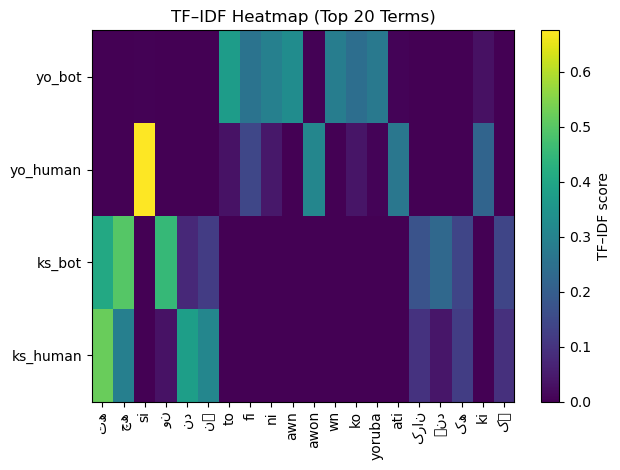

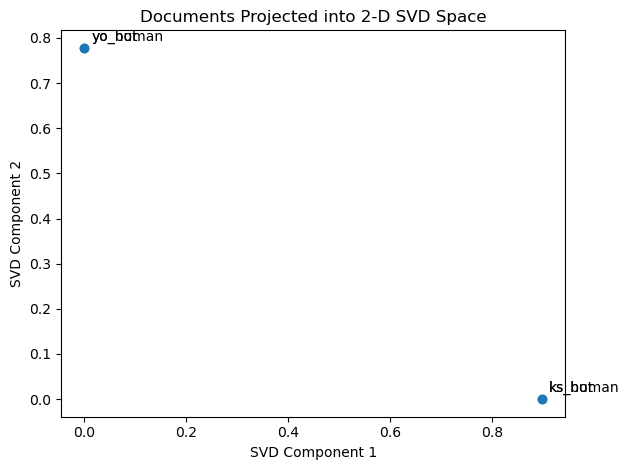

/var/folders/ml/77k1vkl97nn0ggzxb_pg5xkw0000gn/T/ipykernel_32434/3508849943.py:69: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/ml/77k1vkl97nn0ggzxb_pg5xkw0000gn/T/ipykernel_32434/3508849943.py:69: UserWarning: Matplotlib currently does not support Arabic natively.
  plt.tight_layout()
/var/folders/ml/77k1vkl97nn0ggzxb_pg5xkw0000gn/T/ipykernel_32434/3508849943.py:69: UserWarning: Glyph 1741 (\N{ARABIC LETTER YEH WITH TAIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/farhananoor/anaconda3/envs/nlp_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/farhananoor/anaconda3/envs/nlp_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **

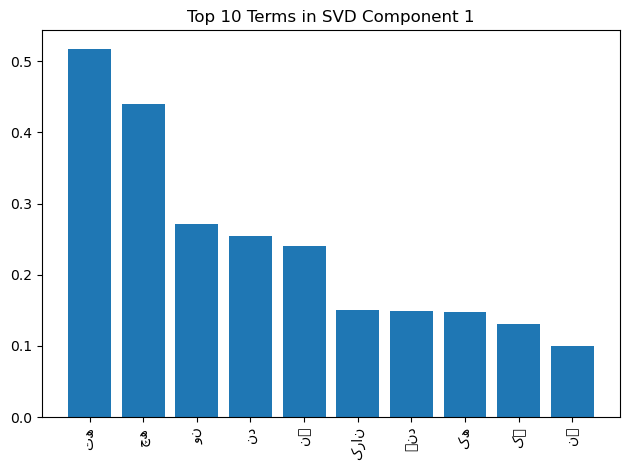

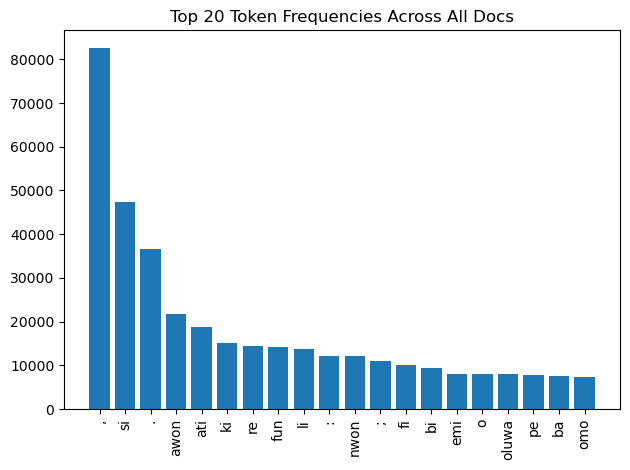

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from collections import Counter

# ─── 0. Put your data here ─────────────────────────────────────────────────────
docs = [
    lemmatized_yoruba_bot,
    lemmatized_yoruba_human,
    stemmed_kashmiri_bot,
    stemmed_kashmiri_human
]
labels = ['yo_bot', 'yo_human', 'ks_bot', 'ks_human']


# ─── 1. TF-IDF heatmap of the top 20 terms ─────────────────────────────────────
vectorizer = TfidfVectorizer(max_df=0.8, min_df=2, ngram_range=(1,2))
X_tfidf    = vectorizer.fit_transform(docs)
terms      = vectorizer.get_feature_names_out()

# pick the 20 terms with highest average TF-IDF
avg_tfidf  = np.asarray(X_tfidf.mean(axis=0)).ravel()
top_idx    = avg_tfidf.argsort()[::-1][:20]
top_terms  = terms[top_idx]
heatmap    = X_tfidf[:, top_idx].toarray()

plt.figure()
plt.imshow(heatmap, aspect='auto')
plt.colorbar(label='TF–IDF score')
plt.yticks(np.arange(len(labels)), labels)
plt.xticks(np.arange(20), top_terms, rotation=90)
plt.title('TF–IDF Heatmap (Top 20 Terms)')
plt.tight_layout()
plt.show()


# ─── 2. Scatter in the first two SVD components ────────────────────────────────
# reduce down to min(desired_k, #docs)
desired_k     = 50
max_allowed_k = min(X_tfidf.shape[0], X_tfidf.shape[1])
n_comp        = min(desired_k, max_allowed_k)

svd      = TruncatedSVD(n_components=n_comp, random_state=42)
X_svd    = svd.fit_transform(X_tfidf)

plt.figure()
x, y = X_svd[:,0], X_svd[:,1] if n_comp>1 else np.zeros(len(x))
plt.scatter(x, y)
for i, lab in enumerate(labels):
    plt.annotate(lab, (x[i], y[i]), xytext=(5,5), textcoords='offset points')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.title('Documents Projected into 2-D SVD Space')
plt.tight_layout()
plt.show()


# ─── 3. Bar chart of the top 10 terms in SVD Component 1 ───────────────────────
comp0       = svd.components_[0]
top10_idx   = comp0.argsort()[::-1][:10]
top10_terms = terms[top10_idx]
top10_wts   = comp0[top10_idx]

plt.figure()
plt.bar(np.arange(10), top10_wts)
plt.xticks(np.arange(10), top10_terms, rotation=90)
plt.title('Top 10 Terms in SVD Component 1')
plt.tight_layout()
plt.show()


# ─── 4. Token-frequency bar chart (illustrates min_count=2) ────────────────────
all_tokens = [tok for doc in docs for tok in doc.split()]
freqs      = Counter(all_tokens).most_common(20)
words, counts = zip(*freqs)

plt.figure()
plt.bar(np.arange(20), counts)
plt.xticks(np.arange(20), words, rotation=90)
plt.title('Top 20 Token Frequencies Across All Docs')
plt.tight_layout()
plt.show()

In [12]:
processed_yoruba_bot = lemmatized_yoruba_bot
processed_yoruba_human = lemmatized_yoruba_human
processed_kashmiri_bot = stemmed_kashmiri_bot
processed_kashmiri_human = stemmed_kashmiri_human

# 6. Embedding Models

## 6.1 FastText

In [13]:
from gensim.models import Word2Vec
from gensim.models import FastText
import logging

In [14]:
# Train a FastText model

processed_texts_yoruba_bot = [processed_yoruba_bot.split()]
processed_texts_yoruba_human = [processed_yoruba_human.split()]
processed_texts_kashmiri_bot = [processed_kashmiri_bot.split()]
processed_texts_kashmiri_human = [processed_kashmiri_human.split()]

fasttext_model_yoruba_bot = FastText(processed_texts_yoruba_bot , vector_size=10, window=3, min_count=1, workers=4, sg=1)
fasttext_model_yoruba_human = FastText(processed_texts_yoruba_human, vector_size=10, window=3, min_count=1, workers=4, sg=1)
fasttext_model_kashmiri_bot = FastText(processed_texts_kashmiri_bot, vector_size=10, window=3, min_count=1, workers=4, sg=1)
fasttext_model_kashmiri_human = FastText(processed_texts_kashmiri_human, vector_size=10, window=3, min_count=1, workers=4, sg=1)

fasttext_model_yoruba_bot.save("fasttext_gpt_yoruba.model")
print("FastText model trained and saved.")

fasttext_model_yoruba_human.save("fasttext_corpus_yoruba.model")
print("FastText model trained and saved.")

fasttext_model_kashmiri_bot.save("fasttext_gpt_kashmiri.model")
print("FastText model trained and saved.")

fasttext_model_kashmiri_human.save("fasttext_corpus_kashmiri.model")
print("FastText model trained and saved.")

FastText model trained and saved.
FastText model trained and saved.
FastText model trained and saved.
FastText model trained and saved.


## 6.2 Word2vec

In [15]:
# Train a Word2Vec model

word2vec_model_yoruba_bot = Word2Vec(processed_texts_yoruba_bot, vector_size=10, window=3, min_count=2, workers=4)
word2vec_model_yoruba_human = Word2Vec(processed_texts_yoruba_human, vector_size=10, window=3, min_count=2, workers=4)
word2vec_model_kashmiri_bot = Word2Vec(processed_texts_kashmiri_bot, vector_size=10, window=3, min_count=2, workers=4)
word2vec_model_kashmiri_human = Word2Vec(processed_texts_kashmiri_human, vector_size=10, window=3, min_count=2, workers=4)

word2vec_model_yoruba_bot.save("word2vec_gpt_yoruba.model")
print("Word2Vec model trained and saved.")

word2vec_model_yoruba_human.save("word2vec_corpus_yoruba.model")
print("Word2Vec model trained and saved.")

word2vec_model_kashmiri_bot.save("word2vec_gpt_kashmiri.model")
print("Word2Vec model trained and saved.")

word2vec_model_kashmiri_human.save("word2vec_corpus_kashmiri.model")
print("Word2Vec model trained and saved.")

Word2Vec model trained and saved.
Word2Vec model trained and saved.
Word2Vec model trained and saved.
Word2Vec model trained and saved.


In [39]:
# Function to segment text into chunks of 200 words

def segment_text(text, chunk_size=40):
    words = text.split()
    segments = [' '.join(words[i:i + chunk_size]) for i in range(0, len(words), chunk_size)]
    return segments

# Prepare the segmented corpus
corpus_yoruba_bot = segment_text(processed_yoruba_bot)
corpus_yoruba_human = segment_text(processed_yoruba_human)
corpus_kashmiri_bot = segment_text(processed_kashmiri_bot)
corpus_kashmiri_human = segment_text(processed_kashmiri_human)

# # Print segments to verify
# print("Yoruba Bot Segments:", corpus_yoruba_bot)
# print("Yoruba Human Segments:", corpus_yoruba_human)
# print("Kashmiri Bot Segments:", corpus_kashmiri_bot)
# print("Kashmiri Human Segments:", corpus_kashmiri_human)

In [17]:
# Corpus models
word2vec_corpus_yoruba = Word2Vec.load("word2vec_corpus_yoruba.model")
word2vec_corpus_kashmiri = Word2Vec.load("word2vec_corpus_kashmiri.model")

fasttext_corpus_yoruba = FastText.load("fasttext_corpus_yoruba.model")
fasttext_corpus_kashmiri = FastText.load("fasttext_corpus_kashmiri.model")

# GPT models
word2vec_gpt_yoruba = Word2Vec.load("word2vec_gpt_yoruba.model")
word2vec_gpt_kashmiri = Word2Vec.load("word2vec_gpt_kashmiri.model")

fasttext_gpt_yoruba = FastText.load("fasttext_gpt_yoruba.model")
fasttext_gpt_kashmiri = FastText.load("fasttext_gpt_kashmiri.model")

# Extract vocabulary sizes
vocab_sizes = {
    "Human Yoruba": {
        "Word2Vec": len(word2vec_corpus_yoruba.wv),
        "FastText": len(fasttext_corpus_yoruba.wv)
        
    },
    "Human Kashmiri": {
        "Word2Vec": len(word2vec_corpus_kashmiri.wv),
        "FastText": len(fasttext_corpus_kashmiri.wv)
        
    },
    "BOT Yoruba": {
        "Word2Vec": len(word2vec_gpt_yoruba.wv),
        "FastText": len(fasttext_gpt_yoruba.wv)
        
    },
    "BOT Kashmiri": {
        "Word2Vec": len(word2vec_gpt_kashmiri.wv),
        "FastText": len(fasttext_gpt_kashmiri.wv)
        
    }
}

In [18]:
import pandas as pd

# Flatten the dictionary into a list of dictionaries for DataFrame creation
data_for_df = []
for dataset, models in vocab_sizes.items():
    for model, size in models.items():
        data_for_df.append({"Dataset": dataset, "Model": model, "Vocabulary Size": size})

# Create DataFrame
df_vocab_sizes = pd.DataFrame(data_for_df)

# Display DataFrame
print(df_vocab_sizes)

          Dataset     Model  Vocabulary Size
0    Human Yoruba  Word2Vec            10071
1    Human Yoruba  FastText            22077
2  Human Kashmiri  Word2Vec            12325
3  Human Kashmiri  FastText            18339
4      BOT Yoruba  Word2Vec             1692
5      BOT Yoruba  FastText             5083
6    BOT Kashmiri  Word2Vec             1823
7    BOT Kashmiri  FastText             5658


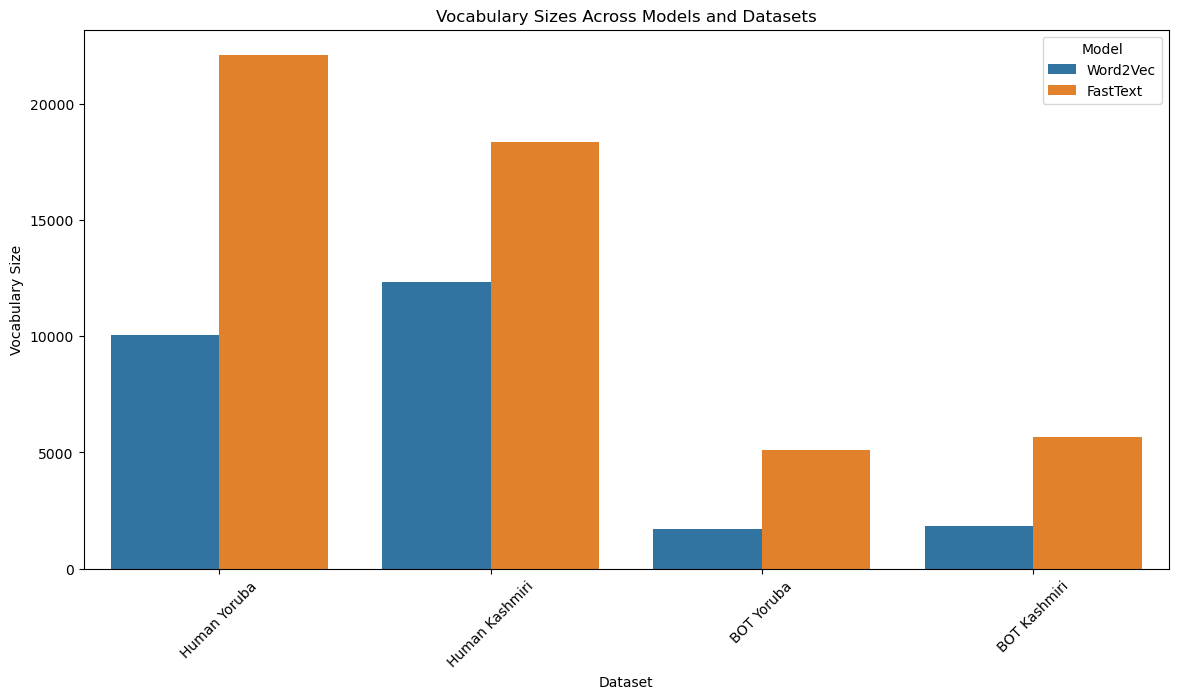

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(14, 7))
sns.barplot(x="Dataset", y="Vocabulary Size", hue="Model", data=df_vocab_sizes)
plt.title('Vocabulary Sizes Across Models and Datasets')
plt.xticks(rotation=45)
plt.show()

In [20]:
# !pip install hdbscan
# !pip install dbscan1d

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.cluster import DBSCAN
import warnings
from dbscan1d.core import DBSCAN1D
from nltk import ngrams
import numpy as np

In [22]:
from nltk import ngrams
import numpy as np

def generate_ngrams(text_tokens, n=3):
    """ Generate n-grams from the list of tokens. """
    return [ngram for ngram in ngrams(text_tokens, n)]

def ngram_to_vector(ngram, model):
    """ Concatenate word vectors for each word in the n-gram. """
    vector_dim = model.vector_size
    ngram_vector = np.concatenate([model.wv[word] if word in model.wv else np.zeros(vector_dim) for word in ngram])
    return ngram_vector

def create_ngram_dataset(texts, model, n=3):
    """ Create a dataset of n-gram vectors, store only unique n-grams. """
    all_ngrams = []
    all_ngrams_vectors = []
    seen_ngrams = set()  # To track unique n-grams

    for text_tokens in texts:
        ngrams = generate_ngrams(text_tokens, n)
        for ngram in ngrams:
            ngram_tuple = tuple(ngram)  # Convert list to tuple for hashability
            if ngram_tuple not in seen_ngrams:
                seen_ngrams.add(ngram_tuple)
                vector = ngram_to_vector(ngram, model)
                all_ngrams.append(ngram_tuple)
                all_ngrams_vectors.append(vector)

    return all_ngrams, np.array(all_ngrams_vectors)


# Processed texts need to be a list of tokens
processed_texts_yoruba_bot = processed_yoruba_bot.split()
processed_texts_yoruba_human = processed_yoruba_human.split()
processed_texts_kashmiri_bot = processed_kashmiri_bot.split()
processed_texts_kashmiri_human = processed_kashmiri_human.split()

# Word2vec
ngrams_yoruba_bot_wv, vectors_yoruba_bot_wv = create_ngram_dataset([processed_texts_yoruba_bot], word2vec_gpt_yoruba)
ngrams_yoruba_human_wv, vectors_yoruba_human_wv = create_ngram_dataset([processed_texts_yoruba_human], word2vec_corpus_yoruba)
ngrams_kashmiri_bot_wv, vectors_kashmiri_bot_wv = create_ngram_dataset([processed_texts_kashmiri_bot], word2vec_gpt_kashmiri)
ngrams_kashmiri_human_wv, vectors_kashmiri_human_wv = create_ngram_dataset([processed_texts_kashmiri_human], word2vec_corpus_kashmiri)

# Fasttext
ngrams_yoruba_bot_ft, vectors_yoruba_bot_ft = create_ngram_dataset([processed_texts_yoruba_bot], fasttext_gpt_yoruba)
ngrams_yoruba_human_ft, vectors_yoruba_human_ft = create_ngram_dataset([processed_texts_yoruba_human], fasttext_corpus_yoruba)
ngrams_kashmiri_bot_ft, vectors_kashmiri_bot_ft = create_ngram_dataset([processed_texts_kashmiri_bot], fasttext_gpt_kashmiri)
ngrams_kashmiri_human_ft, vectors_kashmiri_human_ft = create_ngram_dataset([processed_texts_kashmiri_human], fasttext_corpus_kashmiri)

print("Word2vec")
print(f"Generated {len(ngrams_yoruba_bot_wv)} Yoruba bot n-grams.")
print(f"Generated {len(ngrams_yoruba_human_wv)} Yoruba human n-grams.")
print(f"Generated {len(ngrams_kashmiri_bot_wv)} Kashmiri bot n-grams.")
print(f"Generated {len(ngrams_kashmiri_human_wv)} Kashmiri human n-grams.")

print("*"*60)

print("FastText")
print(f"Generated {len(ngrams_yoruba_bot_ft)} Yoruba bot n-grams.")
print(f"Generated {len(ngrams_yoruba_human_ft)} Yoruba human n-grams.")
print(f"Generated {len(ngrams_kashmiri_bot_ft)} Kashmiri bot n-grams.")
print(f"Generated {len(ngrams_kashmiri_human_ft)} Kashmiri human n-grams.")

Word2vec
Generated 16865 Yoruba bot n-grams.
Generated 526128 Yoruba human n-grams.
Generated 20033 Kashmiri bot n-grams.
Generated 55290 Kashmiri human n-grams.
************************************************************
FastText
Generated 16865 Yoruba bot n-grams.
Generated 526128 Yoruba human n-grams.
Generated 20033 Kashmiri bot n-grams.
Generated 55290 Kashmiri human n-grams.


## Wishart Clustering

In [23]:
import numpy as np
from scipy.special import gamma
from sklearn.neighbors import KDTree
from collections import defaultdict
from tqdm import tqdm

class Wishart:
    def __init__(self, wishart_neighbors, significance_level):
        self.wishart_neighbors = wishart_neighbors  # Number of neighbors
        self.significance_level = significance_level  # Significance level

    def fit(self, X):
        kdt = KDTree(X, metric='euclidean')

        # Query the k-nearest neighbors for each point
        distances, neighbors = kdt.query(X, k=self.wishart_neighbors + 1, return_distance=True)
        neighbors = neighbors[:, 1:]  # Exclude self-neighbor

        # Use the distance to the k-th nearest neighbor
        distances = distances[:, -1]
        indexes = np.argsort(distances)

        size, dim = X.shape
        self.object_labels = np.zeros(size, dtype=int) - 1

        # Initialize clusters and mapping of clusters to objects
        self.clusters = np.array([(1., 1., 0)])
        self.clusters_to_objects = defaultdict(list)
        print('Start clustering')

        for index in indexes:
            neighbors_clusters = np.concatenate([self.object_labels[neighbors[index]], self.object_labels[neighbors[index]]])
            unique_clusters = np.unique(neighbors_clusters).astype(int)
            unique_clusters = unique_clusters[unique_clusters != -1]

            if len(unique_clusters) == 0:
                self._create_new_cluster(index, distances[index])
            else:
                max_cluster = unique_clusters[-1]
                min_cluster = unique_clusters[0]
                if max_cluster == min_cluster:
                    if self.clusters[max_cluster][-1] < 0.5:
                        self._add_elem_to_exist_cluster(index, distances[index], max_cluster)
                    else:
                        self._add_elem_to_noise(index)
                else:
                    my_clusters = self.clusters[unique_clusters]
                    flags = my_clusters[:, -1]
                    if np.min(flags) > 0.5:
                        self._add_elem_to_noise(index)
                    else:
                        significan = np.power(np.maximum(my_clusters[:, 0], 1e-10), -dim) - np.power(np.maximum(my_clusters[:, 1], 1e-10), -dim)
                        significan *= self.wishart_neighbors
                        significan /= size
                        significan /= np.power(np.pi, dim / 2)
                        significan *= gamma(dim / 2 + 1)
                        significan_index = significan >= self.significance_level

                        significan_clusters = unique_clusters[significan_index]
                        not_significan_clusters = unique_clusters[~significan_index]
                        significan_clusters_count = len(significan_clusters)
                        if significan_clusters_count > 1 or min_cluster == 0:
                            self._add_elem_to_noise(index)
                            self.clusters[significan_clusters, -1] = 1
                            for not_sig_cluster in not_significan_clusters:
                                if not_sig_cluster == 0:
                                    continue

                                for bad_index in self.clusters_to_objects[not_sig_cluster]:
                                    self._add_elem_to_noise(bad_index)
                                self.clusters_to_objects[not_sig_cluster].clear()
                        else:
                            for cur_cluster in unique_clusters:
                                if cur_cluster == min_cluster:
                                    continue

                                for bad_index in self.clusters_to_objects[cur_cluster]:
                                    self._add_elem_to_exist_cluster(bad_index, distances[bad_index], min_cluster)
                                self.clusters_to_objects[cur_cluster].clear()

                            self._add_elem_to_exist_cluster(index, distances[index], min_cluster)

        return self.clean_data()

    def clean_data(self):
        unique = np.unique(self.object_labels)
        index = np.argsort(unique)
        if unique[0] != 0:
            index += 1
        true_cluster = {unq: idx for unq, idx in zip(unique, index)}
        result = np.zeros(len(self.object_labels), dtype=int)
        for idx, unq in enumerate(self.object_labels):
            result[idx] = true_cluster[unq]
        return result

    def _add_elem_to_noise(self, index):
        self.object_labels[index] = 0
        self.clusters_to_objects[0].append(index)

    def _create_new_cluster(self, index, dist):
        self.object_labels[index] = len(self.clusters)
        self.clusters_to_objects[len(self.clusters)].append(index)
        self.clusters = np.append(self.clusters, [(dist, dist, 0)], axis=0)

    def _add_elem_to_exist_cluster(self, index, dist, cluster_label):
        self.object_labels[index] = cluster_label
        self.clusters_to_objects[cluster_label].append(index)
        self.clusters[cluster_label][0] = min(self.clusters[cluster_label][0], dist)
        self.clusters[cluster_label][1] = max(self.clusters[cluster_label][1], dist)


class PreTrainWishart:
    def __init__(self, wishart_neighbors, significance_level, distances, neighbors):
        self.wishart_neighbors = wishart_neighbors  # Number of neighbors
        self.significance_level = significance_level  # Significance level
        self.distances = distances
        self.neighbors = neighbors

    def fit(self, X):
        kdt = KDTree(X, metric='euclidean')

        # Use precomputed distances and neighbors
        neighbors = self.neighbors[:, 1:self.wishart_neighbors + 1]
        distances = self.distances[:, self.wishart_neighbors]
        indexes = np.argsort(distances)

        size, dim = X.shape
        self.object_labels = np.zeros(size, dtype=int) - 1

        # Initialize clusters and mapping of clusters to objects
        self.clusters = np.array([(1., 1., 0)])
        self.clusters_to_objects = defaultdict(list)

        for index in indexes:
            neighbors_clusters = np.concatenate([self.object_labels[neighbors[index]], self.object_labels[neighbors[index]]])
            unique_clusters = np.unique(neighbors_clusters).astype(int)
            unique_clusters = unique_clusters[unique_clusters != -1]

            if len(unique_clusters) == 0:
                self._create_new_cluster(index, distances[index])
            else:
                max_cluster = unique_clusters[-1]
                min_cluster = unique_clusters[0]
                if max_cluster == min_cluster:
                    if self.clusters[max_cluster][-1] < 0.5:
                        self._add_elem_to_exist_cluster(index, distances[index], max_cluster)
                    else:
                        self._add_elem_to_noise(index)
                else:
                    my_clusters = self.clusters[unique_clusters]
                    flags = my_clusters[:, -1]
                    if np.min(flags) > 0.5:
                        self._add_elem_to_noise(index)
                    else:
                        significan = np.power(np.maximum(my_clusters[:, 0], 1e-10), -dim) - np.power(np.maximum(my_clusters[:, 1], 1e-10), -dim)
                        significan *= self.wishart_neighbors
                        significan /= size
                        significan /= np.power(np.pi, dim / 2)
                        significan *= gamma(dim / 2 + 1)
                        significan_index = significan >= self.significance_level

                        significan_clusters = unique_clusters[significan_index]
                        not_significan_clusters = unique_clusters[~significan_index]
                        significan_clusters_count = len(significan_clusters)
                        if significan_clusters_count > 1 or min_cluster == 0:
                            self._add_elem_to_noise(index)
                            self.clusters[significan_clusters, -1] = 1
                            for not_sig_cluster in not_significan_clusters:
                                if not_sig_cluster == 0:
                                    continue

                                for bad_index in self.clusters_to_objects[not_sig_cluster]:
                                    self._add_elem_to_noise(bad_index)
                                self.clusters_to_objects[not_sig_cluster].clear()
                        else:
                            for cur_cluster in unique_clusters:
                                if cur_cluster == min_cluster:
                                    continue

                                for bad_index in self.clusters_to_objects[cur_cluster]:
                                    self._add_elem_to_exist_cluster(bad_index, distances[bad_index], min_cluster)
                                self.clusters_to_objects[cur_cluster].clear()

                            self._add_elem_to_exist_cluster(index, distances[index], min_cluster)

        return self.clean_data()

    def clean_data(self):
        unique = np.unique(self.object_labels)
        index = np.argsort(unique)
        if unique[0] != 0:
            index += 1
        true_cluster = {unq: idx for unq, idx in zip(unique, index)}
        result = np.zeros(len(self.object_labels), dtype=int)
        for idx, unq in enumerate(self.object_labels):
            result[idx] = true_cluster[unq]
        return result

    def _add_elem_to_noise(self, index):
        self.object_labels[index] = 0
        self.clusters_to_objects[0].append(index)

    def _create_new_cluster(self, index, dist):
        self.object_labels[index] = len(self.clusters)
        self.clusters_to_objects[len(self.clusters)].append(index)
        self.clusters = np.append(self.clusters, [(dist, dist, 0)], axis=0)

    def _add_elem_to_exist_cluster(self, index, dist, cluster_label):
        self.object_labels[index] = cluster_label
        self.clusters_to_objects[cluster_label].append(index)
        self.clusters[cluster_label][0] = min(self.clusters[cluster_label][0], dist)
        self.clusters[cluster_label][1] = max(self.clusters[cluster_label][1], dist)

In [24]:
# Instantiate the Wishart clustering model

wishart_neighbors = 20  # Set appropriate number of neighbors
significance_level = 0.05  # Set appropriate significance level

wishart = Wishart(wishart_neighbors, significance_level)

# Fit the Wishart model on the vector datasets
# Word2vec
labels_yoruba_bot_wv = wishart.fit(vectors_yoruba_bot_wv)
labels_yoruba_human_wv = wishart.fit(vectors_yoruba_human_wv)
labels_kashmiri_bot_wv = wishart.fit(vectors_kashmiri_bot_wv)
labels_kashmiri_human_wv = wishart.fit(vectors_kashmiri_human_wv)

# Fasttext
labels_yoruba_bot_ft = wishart.fit(vectors_yoruba_bot_ft)
labels_yoruba_human_ft = wishart.fit(vectors_yoruba_human_ft)
labels_kashmiri_bot_ft = wishart.fit(vectors_yoruba_bot_ft)
labels_kashmiri_human_ft = wishart.fit(vectors_yoruba_human_ft)

# Print or analyze the clustering results
print('Yoruba Bot Word2vec Clusters:', np.unique(labels_yoruba_bot_wv))
print('Yoruba Human Word2vec Clusters:', np.unique(labels_yoruba_human_wv))
print('Kashmiri Bot Word2vec Clusters:', np.unique(labels_kashmiri_bot_wv))
print('Kashmiri Human Word2vec Clusters:', np.unique(labels_kashmiri_human_wv))

print('Yoruba Bot FastText Clusters:', np.unique(labels_yoruba_bot_ft))
print('Yoruba Human FastText Clusters:', np.unique(labels_yoruba_human_ft))
print('Kashmiri Bot FastText Clusters:', np.unique(labels_yoruba_bot_ft))
print('Kashmiri Human FastText Clusters:', np.unique(labels_yoruba_human_ft))

Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Yoruba Bot Word2vec Clusters: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
Yoruba Human Word2vec Clusters: [   0    1    2 ... 2435 2436 2437]
Kashmiri Bot Word2vec Clusters: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118]
Kashmiri Human Word2vec Clusters: [ 0  1  2  3  4  5  

In [25]:
# Define different parameter sets to experiment with
param_sets = [
    {'wishart_neighbors': 30, 'significance_level': 0.05},
    {'wishart_neighbors': 20, 'significance_level': 0.10},
    {'wishart_neighbors': 10, 'significance_level': 0.15},
    {'wishart_neighbors': 50, 'significance_level': 0.05},
    {'wishart_neighbors': 40, 'significance_level': 0.10},
    {'wishart_neighbors': 30, 'significance_level': 0.10}
]

# Function to run clustering with different parameters
def run_wishart_clustering(vectors, param_set):
    wishart = Wishart(param_set['wishart_neighbors'], param_set['significance_level'])
    return wishart.fit(vectors)

# Adjust parameters and run clustering again for each dataset
for params in param_sets:
    print(f"Running Wishart Clustering with params: {params}")

    # Word2vec
    labels_yoruba_bot_wv = run_wishart_clustering(vectors_yoruba_bot_wv, params)
    labels_yoruba_human_wv = run_wishart_clustering(vectors_yoruba_human_wv, params)
    labels_kashmiri_bot_wv = run_wishart_clustering(vectors_kashmiri_bot_wv, params)
    labels_kashmiri_human_wv = run_wishart_clustering(vectors_kashmiri_human_wv, params)

    # Fasttext
    labels_yoruba_bot_ft = run_wishart_clustering(vectors_yoruba_bot_ft, params)
    labels_yoruba_human_ft = run_wishart_clustering(vectors_yoruba_human_ft, params)
    labels_yoruba_bot_ft = run_wishart_clustering(vectors_yoruba_bot_ft, params)
    labels_yoruba_human_ft = run_wishart_clustering(vectors_yoruba_human_ft, params)

    # Print or analyze the clustering results
    print('Yoruba Bot Word2vec Clusters:', np.unique(labels_yoruba_bot_wv))
    print('Yoruba Human Word2vec Clusters:', np.unique(labels_yoruba_human_wv))
    print('Kashmiri Bot Word2vec Clusters:', np.unique(labels_kashmiri_bot_wv))
    print('Kashmiri Human Word2vec Clusters:', np.unique(labels_kashmiri_human_wv))
    print('Yoruba Bot FastText Clusters:', np.unique(labels_yoruba_bot_ft))
    print('Yoruba Human FastText Clusters:', np.unique(labels_yoruba_human_ft))
    print('Kashmiri Bot FastText Clusters:', np.unique(labels_kashmiri_bot_ft))
    print('Kashmiri Human FastText Clusters:', np.unique(labels_kashmiri_human_ft))

Running Wishart Clustering with params: {'wishart_neighbors': 30, 'significance_level': 0.05}
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Yoruba Bot Word2vec Clusters: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Yoruba Human Word2vec Clusters: [   0    1    2 ... 1598 1599 1600]
Kashmiri Bot Word2vec Clusters: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88]
Kashmiri Human Word2vec Clusters: [0 1 2 3 4 5 6]
Yoruba Bot FastText Clusters: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 

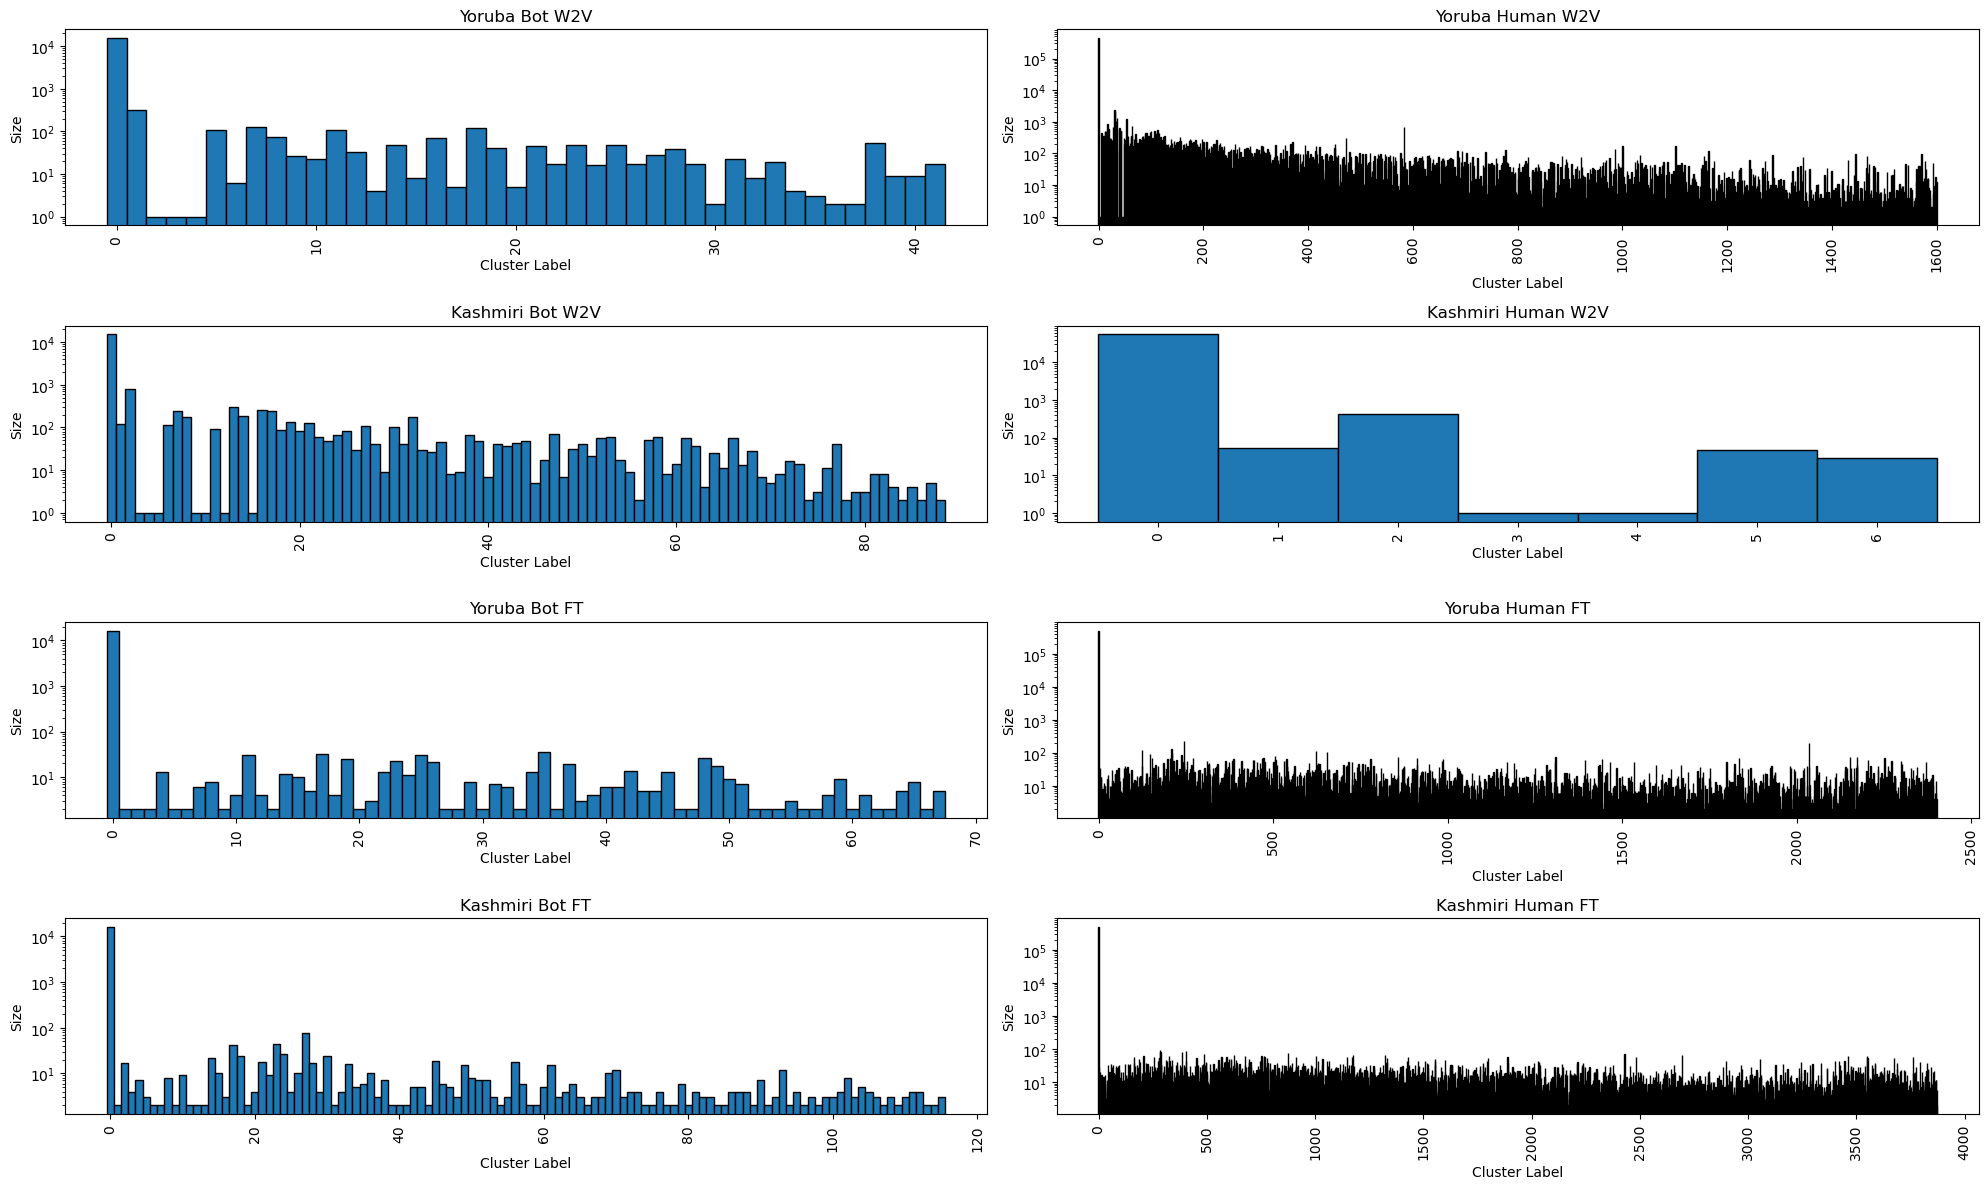

In [26]:
import matplotlib.pyplot as plt
from collections import Counter

# Create a list of all labels for easy iteration
label_sets = [labels_yoruba_bot_wv, labels_yoruba_human_wv, labels_kashmiri_bot_wv, labels_kashmiri_human_wv,
              labels_yoruba_bot_ft, labels_yoruba_human_ft, labels_kashmiri_bot_ft, labels_kashmiri_human_ft]
titles = ["Yoruba Bot W2V", "Yoruba Human W2V", "Kashmiri Bot W2V", "Kashmiri Human W2V",
          "Yoruba Bot FT", "Yoruba Human FT", "Kashmiri Bot FT", "Kashmiri Human FT"]

# Plotting
plt.figure(figsize=(20, 12))
for i, labels in enumerate(label_sets, 1):
    plt.subplot(4, 2, i)
    cluster_sizes = Counter(labels)
    sorted_cluster_sizes = sorted(cluster_sizes.items())
    sorted_labels, sorted_sizes = zip(*sorted_cluster_sizes)

    plt.bar(sorted_labels, sorted_sizes, width=1.0, edgecolor="black")
    plt.title(titles[i-1])
    plt.xlabel('Cluster Label')
    plt.ylabel('Size')
    plt.yscale('log')  # Logarithmic scale
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

## Calinski Harabasz Score

Processing Yoruba Bot Word2Vec:   0%|                   | 0/100 [00:00<?, ?it/s]

Start clustering


Processing Yoruba Bot Word2Vec:   1%|           | 1/100 [00:02<03:18,  2.00s/it]

Start clustering


Processing Yoruba Bot Word2Vec:   2%|▏          | 2/100 [00:03<03:06,  1.90s/it]

Start clustering


Processing Yoruba Bot Word2Vec:   3%|▎          | 3/100 [00:05<03:01,  1.87s/it]

Start clustering


Processing Yoruba Bot Word2Vec:   4%|▍          | 4/100 [00:07<02:59,  1.87s/it]

Start clustering


Processing Yoruba Bot Word2Vec:   5%|▌          | 5/100 [00:09<02:56,  1.86s/it]

Start clustering


Processing Yoruba Bot Word2Vec:   6%|▋          | 6/100 [00:11<02:56,  1.88s/it]

Start clustering


Processing Yoruba Bot Word2Vec:   7%|▊          | 7/100 [00:13<02:56,  1.90s/it]

Start clustering


Processing Yoruba Bot Word2Vec:   8%|▉          | 8/100 [00:15<02:55,  1.91s/it]

Start clustering


Processing Yoruba Bot Word2Vec:   9%|▉          | 9/100 [00:17<02:54,  1.92s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  10%|█         | 10/100 [00:19<02:54,  1.94s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  11%|█         | 11/100 [00:21<02:54,  1.96s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  12%|█▏        | 12/100 [00:23<02:52,  1.96s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  13%|█▎        | 13/100 [00:25<02:52,  1.99s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  14%|█▍        | 14/100 [00:27<02:51,  1.99s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  15%|█▌        | 15/100 [00:29<02:50,  2.00s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  16%|█▌        | 16/100 [00:31<02:53,  2.06s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  17%|█▋        | 17/100 [00:33<02:54,  2.10s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  18%|█▊        | 18/100 [00:35<02:54,  2.13s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  19%|█▉        | 19/100 [00:38<02:57,  2.20s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  20%|██        | 20/100 [00:40<02:53,  2.17s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  21%|██        | 21/100 [00:42<02:49,  2.15s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  22%|██▏       | 22/100 [00:44<02:47,  2.14s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  23%|██▎       | 23/100 [00:46<02:44,  2.14s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  24%|██▍       | 24/100 [00:48<02:42,  2.14s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  25%|██▌       | 25/100 [00:50<02:41,  2.15s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  26%|██▌       | 26/100 [00:53<02:40,  2.16s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  27%|██▋       | 27/100 [00:55<02:39,  2.18s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  28%|██▊       | 28/100 [00:57<02:36,  2.18s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  29%|██▉       | 29/100 [00:59<02:35,  2.20s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  30%|███       | 30/100 [01:01<02:34,  2.20s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  31%|███       | 31/100 [01:04<02:33,  2.22s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  32%|███▏      | 32/100 [01:06<02:31,  2.22s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  33%|███▎      | 33/100 [01:08<02:30,  2.25s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  34%|███▍      | 34/100 [01:11<02:29,  2.27s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  35%|███▌      | 35/100 [01:13<02:27,  2.28s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  36%|███▌      | 36/100 [01:15<02:26,  2.29s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  37%|███▋      | 37/100 [01:17<02:25,  2.31s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  38%|███▊      | 38/100 [01:20<02:22,  2.30s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  39%|███▉      | 39/100 [01:22<02:21,  2.32s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  40%|████      | 40/100 [01:25<02:20,  2.34s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  41%|████      | 41/100 [01:27<02:18,  2.35s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  42%|████▏     | 42/100 [01:29<02:17,  2.37s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  43%|████▎     | 43/100 [01:32<02:15,  2.38s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  44%|████▍     | 44/100 [01:34<02:14,  2.40s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  45%|████▌     | 45/100 [01:37<02:13,  2.43s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  46%|████▌     | 46/100 [01:39<02:09,  2.41s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  47%|████▋     | 47/100 [01:41<02:08,  2.42s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  48%|████▊     | 48/100 [01:44<02:06,  2.44s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  49%|████▉     | 49/100 [01:46<02:04,  2.44s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  50%|█████     | 50/100 [01:49<02:01,  2.44s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  51%|█████     | 51/100 [01:51<01:59,  2.44s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  52%|█████▏    | 52/100 [01:54<01:57,  2.44s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  53%|█████▎    | 53/100 [01:56<01:54,  2.44s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  54%|█████▍    | 54/100 [01:59<01:53,  2.46s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  55%|█████▌    | 55/100 [02:01<01:51,  2.48s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  56%|█████▌    | 56/100 [02:04<01:49,  2.49s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  57%|█████▋    | 57/100 [02:06<01:48,  2.52s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  58%|█████▊    | 58/100 [02:09<01:45,  2.51s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  59%|█████▉    | 59/100 [02:11<01:43,  2.53s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  60%|██████    | 60/100 [02:14<01:41,  2.54s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  61%|██████    | 61/100 [02:17<01:43,  2.64s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  62%|██████▏   | 62/100 [02:19<01:39,  2.61s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  63%|██████▎   | 63/100 [02:22<01:36,  2.60s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  64%|██████▍   | 64/100 [02:25<01:38,  2.74s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  65%|██████▌   | 65/100 [02:29<01:47,  3.08s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  66%|██████▌   | 66/100 [02:32<01:41,  2.99s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  67%|██████▋   | 67/100 [02:35<01:40,  3.05s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  68%|██████▊   | 68/100 [02:38<01:40,  3.14s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  69%|██████▉   | 69/100 [02:41<01:35,  3.09s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  70%|███████   | 70/100 [02:44<01:28,  2.96s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  71%|███████   | 71/100 [02:46<01:23,  2.88s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  72%|███████▏  | 72/100 [02:49<01:19,  2.82s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  73%|███████▎  | 73/100 [02:52<01:14,  2.77s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  74%|███████▍  | 74/100 [02:55<01:12,  2.78s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  75%|███████▌  | 75/100 [02:57<01:09,  2.77s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  76%|███████▌  | 76/100 [03:00<01:06,  2.78s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  77%|███████▋  | 77/100 [03:03<01:03,  2.78s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  78%|███████▊  | 78/100 [03:06<01:00,  2.77s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  79%|███████▉  | 79/100 [03:08<00:58,  2.77s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  80%|████████  | 80/100 [03:11<00:55,  2.76s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  81%|████████  | 81/100 [03:14<00:52,  2.76s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  82%|████████▏ | 82/100 [03:17<00:49,  2.77s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  83%|████████▎ | 83/100 [03:19<00:46,  2.76s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  84%|████████▍ | 84/100 [03:22<00:44,  2.79s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  85%|████████▌ | 85/100 [03:25<00:41,  2.79s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  86%|████████▌ | 86/100 [03:28<00:39,  2.79s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  87%|████████▋ | 87/100 [03:31<00:36,  2.81s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  88%|████████▊ | 88/100 [03:34<00:33,  2.79s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  89%|████████▉ | 89/100 [03:38<00:35,  3.23s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  90%|█████████ | 90/100 [03:41<00:32,  3.20s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  91%|█████████ | 91/100 [03:44<00:27,  3.10s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  92%|█████████▏| 92/100 [03:47<00:24,  3.05s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  93%|█████████▎| 93/100 [03:50<00:20,  3.00s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  94%|█████████▍| 94/100 [03:52<00:17,  2.96s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  95%|█████████▌| 95/100 [03:55<00:14,  2.95s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  96%|█████████▌| 96/100 [03:58<00:11,  2.93s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  97%|█████████▋| 97/100 [04:01<00:08,  2.92s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  98%|█████████▊| 98/100 [04:04<00:05,  2.92s/it]

Start clustering


Processing Yoruba Bot Word2Vec:  99%|█████████▉| 99/100 [04:07<00:02,  2.95s/it]

Start clustering


Processing Yoruba Human Word2Vec:   0%|                 | 0/100 [00:00<?, ?it/s]

Start clustering


Processing Yoruba Human Word2Vec:   1%|     | 1/100 [06:44<11:08:01, 404.87s/it]

Start clustering


Processing Yoruba Human Word2Vec:   2%|     | 2/100 [13:43<11:14:55, 413.22s/it]

Start clustering


Processing Yoruba Human Word2Vec:   3%|▏    | 3/100 [20:46<11:15:14, 417.67s/it]

Start clustering


Processing Yoruba Human Word2Vec:   4%|▏    | 4/100 [27:55<11:15:15, 422.03s/it]

Start clustering


Processing Yoruba Human Word2Vec:   5%|▎    | 5/100 [35:16<11:18:50, 428.74s/it]

Start clustering


Processing Yoruba Human Word2Vec:   6%|▎    | 6/100 [42:59<11:29:58, 440.41s/it]

Start clustering


Processing Yoruba Human Word2Vec:   7%|▎    | 7/100 [50:28<11:27:18, 443.42s/it]

Start clustering


Processing Yoruba Human Word2Vec:   8%|▍    | 8/100 [58:02<11:24:46, 446.59s/it]

Start clustering


Processing Yoruba Human Word2Vec:   9%|▎  | 9/100 [1:05:41<11:23:25, 450.61s/it]

Start clustering


Processing Yoruba Human Word2Vec:  10%|▏ | 10/100 [1:13:25<11:22:10, 454.79s/it]

Start clustering


Processing Yoruba Human Word2Vec:  11%|▏ | 11/100 [1:21:24<11:25:21, 462.04s/it]

Start clustering


Processing Yoruba Human Word2Vec:  12%|▏ | 12/100 [1:29:26<11:26:36, 468.15s/it]

Start clustering


Processing Yoruba Human Word2Vec:  13%|▎ | 13/100 [1:37:24<11:22:57, 471.00s/it]

Start clustering


Processing Yoruba Human Word2Vec:  14%|▎ | 14/100 [1:45:37<11:24:56, 477.87s/it]

Start clustering


Processing Yoruba Human Word2Vec:  15%|▎ | 15/100 [1:53:44<11:20:54, 480.64s/it]

Start clustering


Processing Yoruba Human Word2Vec:  16%|▎ | 16/100 [2:01:56<11:17:34, 483.98s/it]

Start clustering


Processing Yoruba Human Word2Vec:  17%|▎ | 17/100 [2:10:13<11:14:41, 487.73s/it]

Start clustering


Processing Yoruba Human Word2Vec:  18%|▎ | 18/100 [2:18:39<11:14:13, 493.34s/it]

Start clustering


Processing Yoruba Human Word2Vec:  19%|▍ | 19/100 [2:26:56<11:07:35, 494.52s/it]

Start clustering


Processing Yoruba Human Word2Vec:  20%|▍ | 20/100 [2:35:17<11:01:44, 496.31s/it]

Start clustering


Processing Yoruba Human Word2Vec:  21%|▍ | 21/100 [2:43:41<10:56:41, 498.75s/it]

Start clustering


Processing Yoruba Human Word2Vec:  22%|▍ | 22/100 [2:52:07<10:51:03, 500.81s/it]

Start clustering


Processing Yoruba Human Word2Vec:  23%|▍ | 23/100 [3:00:41<10:48:00, 504.94s/it]

Start clustering


Processing Yoruba Human Word2Vec:  24%|▍ | 24/100 [3:09:08<10:40:13, 505.44s/it]

Start clustering


Processing Yoruba Human Word2Vec:  25%|▌ | 25/100 [3:17:46<10:36:41, 509.35s/it]

Start clustering


Processing Yoruba Human Word2Vec:  26%|▌ | 26/100 [3:26:32<10:34:02, 514.09s/it]

Start clustering


Processing Yoruba Human Word2Vec:  27%|▌ | 27/100 [3:35:16<10:29:15, 517.20s/it]

Start clustering


Processing Yoruba Human Word2Vec:  28%|▌ | 28/100 [3:44:06<10:25:16, 521.06s/it]

Start clustering


Processing Yoruba Human Word2Vec:  29%|▌ | 29/100 [3:52:53<10:18:35, 522.75s/it]

Start clustering


Processing Yoruba Human Word2Vec:  30%|▌ | 30/100 [4:01:43<10:12:34, 525.07s/it]

Start clustering


Processing Yoruba Human Word2Vec:  31%|▌ | 31/100 [4:10:41<10:08:10, 528.85s/it]

Start clustering


Processing Yoruba Human Word2Vec:  32%|▋ | 32/100 [4:19:33<10:00:34, 529.92s/it]

Start clustering


Processing Yoruba Human Word2Vec:  33%|▉  | 33/100 [4:28:27<9:52:53, 530.95s/it]

Start clustering


Processing Yoruba Human Word2Vec:  34%|█  | 34/100 [4:37:24<9:46:00, 532.73s/it]

Start clustering


Processing Yoruba Human Word2Vec:  35%|█  | 35/100 [4:46:26<9:40:13, 535.59s/it]

Start clustering


Processing Yoruba Human Word2Vec:  36%|█  | 36/100 [4:55:30<9:34:06, 538.22s/it]

Start clustering


Processing Yoruba Human Word2Vec:  37%|█  | 37/100 [5:04:36<9:27:36, 540.58s/it]

Start clustering


Processing Yoruba Human Word2Vec:  38%|█▏ | 38/100 [5:13:46<9:21:26, 543.34s/it]

Start clustering


Processing Yoruba Human Word2Vec:  39%|█▏ | 39/100 [5:22:52<9:13:10, 544.11s/it]

Start clustering


Processing Yoruba Human Word2Vec:  40%|█▏ | 40/100 [5:32:02<9:05:56, 545.94s/it]

Start clustering


Processing Yoruba Human Word2Vec:  41%|█▏ | 41/100 [5:41:16<8:59:13, 548.36s/it]

Start clustering


Processing Yoruba Human Word2Vec:  42%|█▎ | 42/100 [5:50:32<8:52:08, 550.50s/it]

Start clustering


Processing Yoruba Human Word2Vec:  43%|█▎ | 43/100 [5:59:48<8:44:42, 552.32s/it]

Start clustering


Processing Yoruba Human Word2Vec:  44%|█▎ | 44/100 [6:09:03<8:36:11, 553.06s/it]

Start clustering


Processing Yoruba Human Word2Vec:  45%|█▎ | 45/100 [6:18:22<8:28:32, 554.78s/it]

Start clustering


Processing Yoruba Human Word2Vec:  46%|█▍ | 46/100 [6:27:44<8:21:18, 557.01s/it]

Start clustering


Processing Yoruba Human Word2Vec:  47%|█▍ | 47/100 [6:37:06<8:13:18, 558.46s/it]

Start clustering


Processing Yoruba Human Word2Vec:  48%|█▍ | 48/100 [6:46:33<8:06:10, 560.98s/it]

Start clustering


Processing Yoruba Human Word2Vec:  49%|█▍ | 49/100 [6:56:01<7:58:34, 563.02s/it]

Start clustering


Processing Yoruba Human Word2Vec:  50%|█▌ | 50/100 [7:05:28<7:50:18, 564.37s/it]

Start clustering


Processing Yoruba Human Word2Vec:  51%|█▌ | 51/100 [7:15:00<7:42:42, 566.59s/it]

Start clustering


Processing Yoruba Human Word2Vec:  52%|█▌ | 52/100 [7:24:28<7:33:44, 567.19s/it]

Start clustering


Processing Yoruba Human Word2Vec:  53%|█▌ | 53/100 [7:34:02<7:25:49, 569.15s/it]

Start clustering


Processing Yoruba Human Word2Vec:  54%|█▌ | 54/100 [7:43:38<7:17:57, 571.26s/it]

Start clustering


Processing Yoruba Human Word2Vec:  55%|█▋ | 55/100 [7:53:15<7:09:34, 572.76s/it]

Start clustering


Processing Yoruba Human Word2Vec:  56%|█▋ | 56/100 [8:02:56<7:01:58, 575.42s/it]

Start clustering


Processing Yoruba Human Word2Vec:  57%|█▋ | 57/100 [8:12:37<6:53:35, 577.10s/it]

Start clustering


Processing Yoruba Human Word2Vec:  58%|█▋ | 58/100 [8:22:19<6:44:53, 578.41s/it]

Start clustering


Processing Yoruba Human Word2Vec:  59%|█▊ | 59/100 [8:32:02<6:36:10, 579.76s/it]

Start clustering


Processing Yoruba Human Word2Vec:  60%|█▊ | 60/100 [8:41:53<6:28:44, 583.11s/it]

Start clustering


Processing Yoruba Human Word2Vec:  61%|█▊ | 61/100 [8:51:40<6:19:58, 584.57s/it]

Start clustering


Processing Yoruba Human Word2Vec:  62%|█▊ | 62/100 [9:01:30<6:11:08, 586.01s/it]

Start clustering


Processing Yoruba Human Word2Vec:  63%|█▉ | 63/100 [9:11:27<6:03:22, 589.24s/it]

Start clustering


Processing Yoruba Human Word2Vec:  64%|█▉ | 64/100 [9:21:19<5:54:05, 590.14s/it]

Start clustering


Processing Yoruba Human Word2Vec:  65%|█▉ | 65/100 [9:31:19<5:46:01, 593.19s/it]

Start clustering


Processing Yoruba Human Word2Vec:  66%|█▉ | 66/100 [9:41:19<5:37:11, 595.04s/it]

Start clustering


Processing Yoruba Human Word2Vec:  67%|██ | 67/100 [9:51:17<5:27:48, 596.02s/it]

Start clustering


Processing Yoruba Human Word2Vec:  68%|█▎| 68/100 [10:01:19<5:18:47, 597.74s/it]

Start clustering


Processing Yoruba Human Word2Vec:  69%|█▍| 69/100 [10:11:26<5:10:19, 600.62s/it]

Start clustering


Processing Yoruba Human Word2Vec:  70%|█▍| 70/100 [10:21:29<5:00:37, 601.24s/it]

Start clustering


Processing Yoruba Human Word2Vec:  71%|█▍| 71/100 [10:31:37<4:51:36, 603.34s/it]

Start clustering


Processing Yoruba Human Word2Vec:  72%|█▍| 72/100 [10:41:46<4:42:18, 604.96s/it]

Start clustering


Processing Yoruba Human Word2Vec:  73%|█▍| 73/100 [10:51:56<4:32:55, 606.51s/it]

Start clustering


Processing Yoruba Human Word2Vec:  74%|█▍| 74/100 [11:02:04<4:23:04, 607.08s/it]

Start clustering


Processing Yoruba Human Word2Vec:  75%|█▌| 75/100 [11:12:24<4:14:32, 610.91s/it]

Start clustering


Processing Yoruba Human Word2Vec:  76%|█▌| 76/100 [11:22:40<4:04:59, 612.49s/it]

Start clustering


Processing Yoruba Human Word2Vec:  77%|█▌| 77/100 [11:32:57<3:55:17, 613.79s/it]

Start clustering


Processing Yoruba Human Word2Vec:  78%|█▌| 78/100 [11:43:19<3:45:59, 616.36s/it]

Start clustering


Processing Yoruba Human Word2Vec:  79%|█▌| 79/100 [11:53:39<3:36:01, 617.22s/it]

Start clustering


Processing Yoruba Human Word2Vec:  80%|█▌| 80/100 [12:04:15<3:27:39, 622.96s/it]

Start clustering


Processing Yoruba Human Word2Vec:  81%|█▌| 81/100 [12:14:53<3:18:41, 627.46s/it]

Start clustering


Processing Yoruba Human Word2Vec:  82%|█▋| 82/100 [12:25:32<3:09:15, 630.85s/it]

Start clustering


Processing Yoruba Human Word2Vec:  83%|█▋| 83/100 [12:36:14<2:59:40, 634.15s/it]

Start clustering


Processing Yoruba Human Word2Vec:  84%|█▋| 84/100 [12:47:00<2:50:03, 637.74s/it]

Start clustering


Processing Yoruba Human Word2Vec:  85%|█▋| 85/100 [12:57:51<2:40:27, 641.81s/it]

Start clustering


Processing Yoruba Human Word2Vec:  86%|█▋| 86/100 [13:08:22<2:29:01, 638.69s/it]

Start clustering


Processing Yoruba Human Word2Vec:  87%|█▋| 87/100 [13:19:57<2:22:01, 655.53s/it]

Start clustering


Processing Yoruba Human Word2Vec:  88%|█▊| 88/100 [13:33:28<2:20:25, 702.15s/it]

Start clustering


Processing Yoruba Human Word2Vec:  89%|█▊| 89/100 [13:50:48<2:27:16, 803.33s/it]

Start clustering


Processing Yoruba Human Word2Vec:  90%|█▊| 90/100 [14:03:39<2:12:16, 793.63s/it]

Start clustering


Processing Yoruba Human Word2Vec:  91%|█▊| 91/100 [14:14:44<1:53:17, 755.33s/it]

Start clustering


Processing Yoruba Human Word2Vec:  92%|█▊| 92/100 [14:25:38<1:36:38, 724.85s/it]

Start clustering


Processing Yoruba Human Word2Vec:  93%|█▊| 93/100 [14:36:37<1:22:14, 704.94s/it]

Start clustering


Processing Yoruba Human Word2Vec:  94%|█▉| 94/100 [14:47:40<1:09:14, 692.47s/it]

Start clustering


Processing Yoruba Human Word2Vec:  95%|███▊| 95/100 [14:58:44<56:59, 683.81s/it]

Start clustering


Processing Yoruba Human Word2Vec:  96%|███▊| 96/100 [15:09:52<45:16, 679.20s/it]

Start clustering


Processing Yoruba Human Word2Vec:  97%|███▉| 97/100 [15:21:01<33:48, 676.13s/it]

Start clustering


Processing Yoruba Human Word2Vec:  98%|███▉| 98/100 [15:32:10<22:27, 673.87s/it]

Start clustering


Processing Yoruba Human Word2Vec:  99%|███▉| 99/100 [15:43:21<11:13, 673.21s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:   0%|                 | 0/100 [00:00<?, ?it/s]

Start clustering


Processing Kashmiri Bot Word2Vec:   1%|         | 1/100 [00:01<02:40,  1.62s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:   2%|▏        | 2/100 [00:03<02:41,  1.65s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:   3%|▎        | 3/100 [00:04<02:38,  1.64s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:   4%|▎        | 4/100 [00:07<02:58,  1.86s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:   5%|▍        | 5/100 [00:10<03:57,  2.49s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:   6%|▌        | 6/100 [00:12<03:35,  2.30s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:   7%|▋        | 7/100 [00:14<03:22,  2.18s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:   8%|▋        | 8/100 [00:16<03:07,  2.04s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:   9%|▊        | 9/100 [00:18<02:59,  1.97s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  10%|▊       | 10/100 [00:20<02:54,  1.94s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  11%|▉       | 11/100 [00:21<02:49,  1.90s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  12%|▉       | 12/100 [00:23<02:45,  1.88s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  13%|█       | 13/100 [00:25<02:40,  1.84s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  14%|█       | 14/100 [00:27<02:38,  1.84s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  15%|█▏      | 15/100 [00:29<02:35,  1.83s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  16%|█▎      | 16/100 [00:30<02:33,  1.82s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  17%|█▎      | 17/100 [00:32<02:31,  1.82s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  18%|█▍      | 18/100 [00:34<02:29,  1.82s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  19%|█▌      | 19/100 [00:36<02:29,  1.84s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  20%|█▌      | 20/100 [00:38<02:30,  1.88s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  21%|█▋      | 21/100 [00:40<02:30,  1.90s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  22%|█▊      | 22/100 [00:42<02:28,  1.90s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  23%|█▊      | 23/100 [00:44<02:26,  1.90s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  24%|█▉      | 24/100 [00:46<02:24,  1.90s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  25%|██      | 25/100 [00:48<02:25,  1.94s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  26%|██      | 26/100 [00:50<02:39,  2.15s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  27%|██▏     | 27/100 [00:52<02:33,  2.11s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  28%|██▏     | 28/100 [00:54<02:29,  2.08s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  29%|██▎     | 29/100 [00:56<02:26,  2.06s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  30%|██▍     | 30/100 [00:58<02:22,  2.04s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  31%|██▍     | 31/100 [01:00<02:20,  2.04s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  32%|██▌     | 32/100 [01:02<02:18,  2.04s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  33%|██▋     | 33/100 [01:04<02:16,  2.04s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  34%|██▋     | 34/100 [01:06<02:14,  2.04s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  35%|██▊     | 35/100 [01:08<02:12,  2.04s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  36%|██▉     | 36/100 [01:11<02:12,  2.08s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  37%|██▉     | 37/100 [01:13<02:11,  2.08s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  38%|███     | 38/100 [01:15<02:09,  2.08s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  39%|███     | 39/100 [01:17<02:08,  2.11s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  40%|███▏    | 40/100 [01:19<02:06,  2.12s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  41%|███▎    | 41/100 [01:21<02:05,  2.13s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  42%|███▎    | 42/100 [01:23<02:03,  2.13s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  43%|███▍    | 43/100 [01:26<02:02,  2.15s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  44%|███▌    | 44/100 [01:28<02:00,  2.15s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  45%|███▌    | 45/100 [01:30<01:58,  2.15s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  46%|███▋    | 46/100 [01:32<01:57,  2.18s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  47%|███▊    | 47/100 [01:34<01:55,  2.17s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  48%|███▊    | 48/100 [01:37<01:54,  2.20s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  49%|███▉    | 49/100 [01:39<01:52,  2.21s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  50%|████    | 50/100 [01:41<01:51,  2.22s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  51%|████    | 51/100 [01:43<01:49,  2.24s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  52%|████▏   | 52/100 [01:46<01:47,  2.24s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  53%|████▏   | 53/100 [01:48<01:45,  2.24s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  54%|████▎   | 54/100 [01:50<01:45,  2.29s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  55%|████▍   | 55/100 [01:52<01:42,  2.28s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  56%|████▍   | 56/100 [01:55<01:43,  2.35s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  57%|████▌   | 57/100 [01:57<01:41,  2.35s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  58%|████▋   | 58/100 [02:00<01:38,  2.34s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  59%|████▋   | 59/100 [02:02<01:35,  2.34s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  60%|████▊   | 60/100 [02:04<01:33,  2.33s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  61%|████▉   | 61/100 [02:07<01:31,  2.34s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  62%|████▉   | 62/100 [02:09<01:31,  2.40s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  63%|█████   | 63/100 [02:12<01:30,  2.44s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  64%|█████   | 64/100 [02:14<01:29,  2.49s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  65%|█████▏  | 65/100 [02:17<01:27,  2.50s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  66%|█████▎  | 66/100 [02:19<01:24,  2.48s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  67%|█████▎  | 67/100 [02:22<01:21,  2.48s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  68%|█████▍  | 68/100 [02:24<01:18,  2.46s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  69%|█████▌  | 69/100 [02:27<01:16,  2.46s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  70%|█████▌  | 70/100 [02:29<01:14,  2.47s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  71%|█████▋  | 71/100 [02:32<01:12,  2.48s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  72%|█████▊  | 72/100 [02:34<01:08,  2.46s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  73%|█████▊  | 73/100 [02:36<01:06,  2.47s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  74%|█████▉  | 74/100 [02:39<01:05,  2.52s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  75%|██████  | 75/100 [02:42<01:03,  2.53s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  76%|██████  | 76/100 [02:44<01:00,  2.52s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  77%|██████▏ | 77/100 [02:47<00:57,  2.51s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  78%|██████▏ | 78/100 [02:49<00:55,  2.52s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  79%|██████▎ | 79/100 [02:52<00:53,  2.54s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  80%|██████▍ | 80/100 [02:54<00:50,  2.54s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  81%|██████▍ | 81/100 [02:57<00:48,  2.55s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  82%|██████▌ | 82/100 [02:59<00:46,  2.56s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  83%|██████▋ | 83/100 [03:02<00:43,  2.58s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  84%|██████▋ | 84/100 [03:05<00:41,  2.57s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  85%|██████▊ | 85/100 [03:07<00:38,  2.57s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  86%|██████▉ | 86/100 [03:10<00:36,  2.58s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  87%|██████▉ | 87/100 [03:12<00:33,  2.60s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  88%|███████ | 88/100 [03:15<00:31,  2.60s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  89%|███████ | 89/100 [03:18<00:28,  2.60s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  90%|███████▏| 90/100 [03:20<00:26,  2.61s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  91%|███████▎| 91/100 [03:23<00:23,  2.64s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  92%|███████▎| 92/100 [03:26<00:21,  2.63s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  93%|███████▍| 93/100 [03:28<00:18,  2.63s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  94%|███████▌| 94/100 [03:31<00:15,  2.66s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  95%|███████▌| 95/100 [03:34<00:13,  2.66s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  96%|███████▋| 96/100 [03:36<00:10,  2.67s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  97%|███████▊| 97/100 [03:39<00:08,  2.69s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  98%|███████▊| 98/100 [03:42<00:05,  2.70s/it]

Start clustering


Processing Kashmiri Bot Word2Vec:  99%|███████▉| 99/100 [03:45<00:02,  2.71s/it]

Start clustering


Processing Kashmiri Human Word2Vec:   0%|               | 0/100 [00:00<?, ?it/s]

Start clustering


Processing Kashmiri Human Word2Vec:   1%|   | 1/100 [06:18<10:24:58, 378.78s/it]

Start clustering


Processing Kashmiri Human Word2Vec:   2%|   | 2/100 [12:38<10:19:16, 379.15s/it]

Start clustering


Processing Kashmiri Human Word2Vec:   3%|   | 3/100 [18:54<10:11:04, 377.98s/it]

Start clustering


Processing Kashmiri Human Word2Vec:   4%|   | 4/100 [25:10<10:03:13, 377.02s/it]

Start clustering


Processing Kashmiri Human Word2Vec:   5%|▏   | 5/100 [31:27<9:57:19, 377.26s/it]

Start clustering


Processing Kashmiri Human Word2Vec:   6%|▏   | 6/100 [37:44<9:50:28, 376.89s/it]

Start clustering


Processing Kashmiri Human Word2Vec:   7%|▎   | 7/100 [44:01<9:44:36, 377.16s/it]

Start clustering


Processing Kashmiri Human Word2Vec:   8%|▎   | 8/100 [50:17<9:37:38, 376.72s/it]

Start clustering


Processing Kashmiri Human Word2Vec:   9%|▎   | 9/100 [56:34<9:31:23, 376.74s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  10%| | 10/100 [1:02:52<9:25:51, 377.24s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  11%| | 11/100 [1:09:06<9:17:54, 376.12s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  12%| | 12/100 [1:15:22<9:11:39, 376.13s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  13%|▏| 13/100 [1:21:37<9:04:49, 375.74s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  14%|▏| 14/100 [1:27:50<8:57:35, 375.06s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  15%|▏| 15/100 [1:34:07<8:51:56, 375.49s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  16%|▏| 16/100 [1:40:20<8:44:39, 374.75s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  17%|▏| 17/100 [1:46:36<8:38:50, 375.07s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  18%|▏| 18/100 [1:52:50<8:32:06, 374.71s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  19%|▏| 19/100 [1:59:05<8:26:05, 374.88s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  20%|▏| 20/100 [2:05:20<8:19:48, 374.85s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  21%|▏| 21/100 [2:11:38<8:14:50, 375.84s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  22%|▏| 22/100 [2:17:55<8:09:03, 376.20s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  23%|▏| 23/100 [2:24:11<8:02:45, 376.18s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  24%|▏| 24/100 [2:30:25<7:55:37, 375.49s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  25%|▎| 25/100 [2:36:41<7:49:41, 375.76s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  26%|▎| 26/100 [2:42:56<7:42:53, 375.32s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  27%|▎| 27/100 [2:49:11<7:36:32, 375.24s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  28%|▎| 28/100 [2:55:26<7:30:31, 375.44s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  29%|▎| 29/100 [3:01:47<7:25:56, 376.86s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  30%|▎| 30/100 [3:08:03<7:19:33, 376.76s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  31%|▎| 31/100 [3:14:21<7:13:34, 377.02s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  32%|▎| 32/100 [3:20:35<7:06:27, 376.28s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  33%|▎| 33/100 [3:26:54<7:00:48, 376.85s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  34%|▎| 34/100 [3:33:12<6:55:03, 377.32s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  35%|▎| 35/100 [3:39:27<6:47:54, 376.54s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  36%|▎| 36/100 [3:45:45<6:42:03, 376.93s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  37%|▎| 37/100 [3:52:02<6:35:53, 377.03s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  38%|▍| 38/100 [3:58:15<6:28:26, 375.91s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  39%|▍| 39/100 [4:04:31<6:22:19, 376.05s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  40%|▍| 40/100 [4:10:45<6:15:13, 375.23s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  41%|▍| 41/100 [4:17:05<6:10:27, 376.73s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  42%|▍| 42/100 [4:23:19<6:03:21, 375.89s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  43%|▍| 43/100 [4:29:34<5:56:44, 375.51s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  44%|▍| 44/100 [4:35:49<5:50:19, 375.34s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  45%|▍| 45/100 [4:42:05<5:44:29, 375.81s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  46%|▍| 46/100 [4:48:19<5:37:41, 375.21s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  47%|▍| 47/100 [4:54:36<5:31:47, 375.62s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  48%|▍| 48/100 [5:00:50<5:25:12, 375.25s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  49%|▍| 49/100 [5:07:05<5:18:55, 375.20s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  50%|▌| 50/100 [5:13:24<5:13:33, 376.27s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  51%|▌| 51/100 [5:19:38<5:06:46, 375.64s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  52%|▌| 52/100 [5:25:53<5:00:20, 375.43s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  53%|▌| 53/100 [5:32:09<4:54:12, 375.59s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  54%|▌| 54/100 [5:38:24<4:47:44, 375.32s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  55%|▌| 55/100 [5:44:41<4:41:52, 375.84s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  56%|▌| 56/100 [5:50:58<4:35:58, 376.32s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  57%|▌| 57/100 [5:57:09<4:28:32, 374.72s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  58%|▌| 58/100 [6:03:19<4:21:20, 373.35s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  59%|▌| 59/100 [6:09:28<4:14:04, 371.83s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  60%|▌| 60/100 [6:15:41<4:08:11, 372.28s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  61%|▌| 61/100 [6:21:52<4:01:39, 371.79s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  62%|▌| 62/100 [6:28:05<3:55:43, 372.19s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  63%|▋| 63/100 [6:34:16<3:49:17, 371.81s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  64%|▋| 64/100 [6:40:24<3:42:28, 370.81s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  65%|▋| 65/100 [6:46:34<3:36:08, 370.54s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  66%|▋| 66/100 [6:52:44<3:29:52, 370.37s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  67%|▋| 67/100 [6:58:53<3:23:28, 369.96s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  68%|▋| 68/100 [7:05:04<3:17:26, 370.19s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  69%|▋| 69/100 [7:11:14<3:11:12, 370.08s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  70%|▋| 70/100 [7:17:28<3:05:44, 371.49s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  71%|▋| 71/100 [7:23:41<2:59:39, 371.70s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  72%|▋| 72/100 [7:29:50<2:53:11, 371.13s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  73%|▋| 73/100 [7:36:00<2:46:45, 370.57s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  74%|▋| 74/100 [7:42:09<2:40:28, 370.34s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  75%|▊| 75/100 [7:48:20<2:34:16, 370.28s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  76%|▊| 76/100 [7:54:30<2:28:03, 370.17s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  77%|▊| 77/100 [8:00:39<2:21:46, 369.83s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  78%|▊| 78/100 [8:06:49<2:15:39, 369.99s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  79%|▊| 79/100 [8:13:04<2:09:59, 371.39s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  80%|▊| 80/100 [8:19:15<2:03:49, 371.47s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  81%|▊| 81/100 [8:25:27<1:57:37, 371.43s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  82%|▊| 82/100 [8:31:41<1:51:39, 372.21s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  83%|▊| 83/100 [8:37:55<1:45:38, 372.87s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  84%|▊| 84/100 [8:44:32<1:41:21, 380.12s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  85%|▊| 85/100 [8:50:48<1:34:43, 378.88s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  86%|▊| 86/100 [8:57:04<1:28:12, 378.01s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  87%|▊| 87/100 [9:03:21<1:21:49, 377.68s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  88%|▉| 88/100 [9:09:35<1:15:19, 376.59s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  89%|▉| 89/100 [9:15:54<1:09:11, 377.45s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  90%|▉| 90/100 [9:22:10<1:02:49, 376.99s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  91%|██▋| 91/100 [9:28:26<56:27, 376.44s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  92%|██▊| 92/100 [9:34:42<50:10, 376.32s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  93%|██▊| 93/100 [9:40:57<43:51, 375.91s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  94%|██▊| 94/100 [9:47:14<37:38, 376.44s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  95%|██▊| 95/100 [9:53:32<31:24, 376.85s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  96%|██▉| 96/100 [9:59:48<25:06, 376.58s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  97%|█▉| 97/100 [10:06:10<18:54, 378.09s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  98%|█▉| 98/100 [10:12:30<12:37, 378.84s/it]

Start clustering


Processing Kashmiri Human Word2Vec:  99%|█▉| 99/100 [10:18:47<06:18, 378.32s/it]

Start clustering


Processing Yoruba Bot FastText:   0%|                   | 0/100 [00:00<?, ?it/s]

Start clustering


Processing Yoruba Bot FastText:   1%|           | 1/100 [00:01<02:08,  1.30s/it]

Start clustering


Processing Yoruba Bot FastText:   2%|▏          | 2/100 [00:02<02:08,  1.31s/it]

Start clustering


Processing Yoruba Bot FastText:   3%|▎          | 3/100 [00:03<02:06,  1.30s/it]

Start clustering


Processing Yoruba Bot FastText:   4%|▍          | 4/100 [00:05<01:58,  1.23s/it]

Start clustering


Processing Yoruba Bot FastText:   5%|▌          | 5/100 [00:06<01:52,  1.19s/it]

Start clustering


Processing Yoruba Bot FastText:   6%|▋          | 6/100 [00:07<01:50,  1.18s/it]

Start clustering


Processing Yoruba Bot FastText:   7%|▊          | 7/100 [00:08<01:48,  1.17s/it]

Start clustering


Processing Yoruba Bot FastText:   8%|▉          | 8/100 [00:09<01:48,  1.18s/it]

Start clustering


Processing Yoruba Bot FastText:   9%|▉          | 9/100 [00:10<01:46,  1.17s/it]

Start clustering


Processing Yoruba Bot FastText:  10%|█         | 10/100 [00:12<01:46,  1.18s/it]

Start clustering


Processing Yoruba Bot FastText:  11%|█         | 11/100 [00:13<01:45,  1.19s/it]

Start clustering


Processing Yoruba Bot FastText:  12%|█▏        | 12/100 [00:14<01:45,  1.20s/it]

Start clustering


Processing Yoruba Bot FastText:  13%|█▎        | 13/100 [00:15<01:44,  1.20s/it]

Start clustering


Processing Yoruba Bot FastText:  14%|█▍        | 14/100 [00:16<01:44,  1.22s/it]

Start clustering


Processing Yoruba Bot FastText:  15%|█▌        | 15/100 [00:18<01:44,  1.23s/it]

Start clustering


Processing Yoruba Bot FastText:  16%|█▌        | 16/100 [00:19<01:44,  1.24s/it]

Start clustering


Processing Yoruba Bot FastText:  17%|█▋        | 17/100 [00:20<01:43,  1.25s/it]

Start clustering


Processing Yoruba Bot FastText:  18%|█▊        | 18/100 [00:22<01:44,  1.28s/it]

Start clustering


Processing Yoruba Bot FastText:  19%|█▉        | 19/100 [00:23<01:44,  1.29s/it]

Start clustering


Processing Yoruba Bot FastText:  20%|██        | 20/100 [00:24<01:44,  1.30s/it]

Start clustering


Processing Yoruba Bot FastText:  21%|██        | 21/100 [00:26<01:43,  1.32s/it]

Start clustering


Processing Yoruba Bot FastText:  22%|██▏       | 22/100 [00:27<01:43,  1.33s/it]

Start clustering


Processing Yoruba Bot FastText:  23%|██▎       | 23/100 [00:28<01:43,  1.34s/it]

Start clustering


Processing Yoruba Bot FastText:  24%|██▍       | 24/100 [00:30<01:42,  1.35s/it]

Start clustering


Processing Yoruba Bot FastText:  25%|██▌       | 25/100 [00:31<01:48,  1.45s/it]

Start clustering


Processing Yoruba Bot FastText:  26%|██▌       | 26/100 [00:33<01:46,  1.44s/it]

Start clustering


Processing Yoruba Bot FastText:  27%|██▋       | 27/100 [00:34<01:43,  1.42s/it]

Start clustering


Processing Yoruba Bot FastText:  28%|██▊       | 28/100 [00:36<01:42,  1.42s/it]

Start clustering


Processing Yoruba Bot FastText:  29%|██▉       | 29/100 [00:37<01:40,  1.42s/it]

Start clustering


Processing Yoruba Bot FastText:  30%|███       | 30/100 [00:38<01:39,  1.42s/it]

Start clustering


Processing Yoruba Bot FastText:  31%|███       | 31/100 [00:40<01:38,  1.43s/it]

Start clustering


Processing Yoruba Bot FastText:  32%|███▏      | 32/100 [00:41<01:38,  1.44s/it]

Start clustering


Processing Yoruba Bot FastText:  33%|███▎      | 33/100 [00:43<01:37,  1.45s/it]

Start clustering


Processing Yoruba Bot FastText:  34%|███▍      | 34/100 [00:44<01:36,  1.46s/it]

Start clustering


Processing Yoruba Bot FastText:  35%|███▌      | 35/100 [00:46<01:34,  1.46s/it]

Start clustering


Processing Yoruba Bot FastText:  36%|███▌      | 36/100 [00:47<01:34,  1.47s/it]

Start clustering


Processing Yoruba Bot FastText:  37%|███▋      | 37/100 [00:49<01:33,  1.48s/it]

Start clustering


Processing Yoruba Bot FastText:  38%|███▊      | 38/100 [00:50<01:32,  1.49s/it]

Start clustering


Processing Yoruba Bot FastText:  39%|███▉      | 39/100 [00:52<01:33,  1.53s/it]

Start clustering


Processing Yoruba Bot FastText:  40%|████      | 40/100 [00:53<01:32,  1.54s/it]

Start clustering


Processing Yoruba Bot FastText:  41%|████      | 41/100 [00:55<01:31,  1.54s/it]

Start clustering


Processing Yoruba Bot FastText:  42%|████▏     | 42/100 [00:56<01:29,  1.54s/it]

Start clustering


Processing Yoruba Bot FastText:  43%|████▎     | 43/100 [00:58<01:29,  1.56s/it]

Start clustering


Processing Yoruba Bot FastText:  44%|████▍     | 44/100 [01:00<01:27,  1.57s/it]

Start clustering


Processing Yoruba Bot FastText:  45%|████▌     | 45/100 [01:01<01:26,  1.58s/it]

Start clustering


Processing Yoruba Bot FastText:  46%|████▌     | 46/100 [01:03<01:26,  1.61s/it]

Start clustering


Processing Yoruba Bot FastText:  47%|████▋     | 47/100 [01:05<01:25,  1.61s/it]

Start clustering


Processing Yoruba Bot FastText:  48%|████▊     | 48/100 [01:06<01:26,  1.66s/it]

Start clustering


Processing Yoruba Bot FastText:  49%|████▉     | 49/100 [01:08<01:24,  1.66s/it]

Start clustering


Processing Yoruba Bot FastText:  50%|█████     | 50/100 [01:10<01:23,  1.68s/it]

Start clustering


Processing Yoruba Bot FastText:  51%|█████     | 51/100 [01:12<01:24,  1.72s/it]

Start clustering


Processing Yoruba Bot FastText:  52%|█████▏    | 52/100 [01:14<01:35,  1.99s/it]

Start clustering


Processing Yoruba Bot FastText:  53%|█████▎    | 53/100 [01:16<01:35,  2.02s/it]

Start clustering


Processing Yoruba Bot FastText:  54%|█████▍    | 54/100 [01:18<01:29,  1.94s/it]

Start clustering


Processing Yoruba Bot FastText:  55%|█████▌    | 55/100 [01:20<01:23,  1.86s/it]

Start clustering


Processing Yoruba Bot FastText:  56%|█████▌    | 56/100 [01:21<01:20,  1.82s/it]

Start clustering


Processing Yoruba Bot FastText:  57%|█████▋    | 57/100 [01:23<01:17,  1.80s/it]

Start clustering


Processing Yoruba Bot FastText:  58%|█████▊    | 58/100 [01:25<01:15,  1.79s/it]

Start clustering


Processing Yoruba Bot FastText:  59%|█████▉    | 59/100 [01:27<01:12,  1.77s/it]

Start clustering


Processing Yoruba Bot FastText:  60%|██████    | 60/100 [01:29<01:11,  1.79s/it]

Start clustering


Processing Yoruba Bot FastText:  61%|██████    | 61/100 [01:30<01:09,  1.79s/it]

Start clustering


Processing Yoruba Bot FastText:  62%|██████▏   | 62/100 [01:32<01:09,  1.82s/it]

Start clustering


Processing Yoruba Bot FastText:  63%|██████▎   | 63/100 [01:34<01:07,  1.82s/it]

Start clustering


Processing Yoruba Bot FastText:  64%|██████▍   | 64/100 [01:36<01:06,  1.83s/it]

Start clustering


Processing Yoruba Bot FastText:  65%|██████▌   | 65/100 [01:38<01:04,  1.83s/it]

Start clustering


Processing Yoruba Bot FastText:  66%|██████▌   | 66/100 [01:40<01:02,  1.83s/it]

Start clustering


Processing Yoruba Bot FastText:  67%|██████▋   | 67/100 [01:41<01:00,  1.84s/it]

Start clustering


Processing Yoruba Bot FastText:  68%|██████▊   | 68/100 [01:43<01:00,  1.88s/it]

Start clustering


Processing Yoruba Bot FastText:  69%|██████▉   | 69/100 [01:45<00:58,  1.88s/it]

Start clustering


Processing Yoruba Bot FastText:  70%|███████   | 70/100 [01:47<00:56,  1.88s/it]

Start clustering


Processing Yoruba Bot FastText:  71%|███████   | 71/100 [01:49<00:54,  1.89s/it]

Start clustering


Processing Yoruba Bot FastText:  72%|███████▏  | 72/100 [01:51<00:52,  1.89s/it]

Start clustering


Processing Yoruba Bot FastText:  73%|███████▎  | 73/100 [01:53<00:51,  1.89s/it]

Start clustering


Processing Yoruba Bot FastText:  74%|███████▍  | 74/100 [01:55<00:53,  2.06s/it]

Start clustering


Processing Yoruba Bot FastText:  75%|███████▌  | 75/100 [01:57<00:50,  2.02s/it]

Start clustering


Processing Yoruba Bot FastText:  76%|███████▌  | 76/100 [01:59<00:50,  2.08s/it]

Start clustering


Processing Yoruba Bot FastText:  77%|███████▋  | 77/100 [02:01<00:47,  2.07s/it]

Start clustering


Processing Yoruba Bot FastText:  78%|███████▊  | 78/100 [02:04<00:45,  2.07s/it]

Start clustering


Processing Yoruba Bot FastText:  79%|███████▉  | 79/100 [02:06<00:43,  2.05s/it]

Start clustering


Processing Yoruba Bot FastText:  80%|████████  | 80/100 [02:08<00:40,  2.03s/it]

Start clustering


Processing Yoruba Bot FastText:  81%|████████  | 81/100 [02:09<00:38,  2.01s/it]

Start clustering


Processing Yoruba Bot FastText:  82%|████████▏ | 82/100 [02:11<00:36,  2.00s/it]

Start clustering


Processing Yoruba Bot FastText:  83%|████████▎ | 83/100 [02:13<00:34,  2.01s/it]

Start clustering


Processing Yoruba Bot FastText:  84%|████████▍ | 84/100 [02:16<00:32,  2.02s/it]

Start clustering


Processing Yoruba Bot FastText:  85%|████████▌ | 85/100 [02:18<00:30,  2.02s/it]

Start clustering


Processing Yoruba Bot FastText:  86%|████████▌ | 86/100 [02:20<00:28,  2.02s/it]

Start clustering


Processing Yoruba Bot FastText:  87%|████████▋ | 87/100 [02:22<00:26,  2.03s/it]

Start clustering


Processing Yoruba Bot FastText:  88%|████████▊ | 88/100 [02:24<00:24,  2.05s/it]

Start clustering


Processing Yoruba Bot FastText:  89%|████████▉ | 89/100 [02:26<00:22,  2.05s/it]

Start clustering


Processing Yoruba Bot FastText:  90%|█████████ | 90/100 [02:28<00:20,  2.06s/it]

Start clustering


Processing Yoruba Bot FastText:  91%|█████████ | 91/100 [02:30<00:18,  2.06s/it]

Start clustering


Processing Yoruba Bot FastText:  92%|█████████▏| 92/100 [02:32<00:16,  2.08s/it]

Start clustering


Processing Yoruba Bot FastText:  93%|█████████▎| 93/100 [02:34<00:14,  2.09s/it]

Start clustering


Processing Yoruba Bot FastText:  94%|█████████▍| 94/100 [02:36<00:12,  2.10s/it]

Start clustering


Processing Yoruba Bot FastText:  95%|█████████▌| 95/100 [02:38<00:10,  2.11s/it]

Start clustering


Processing Yoruba Bot FastText:  96%|█████████▌| 96/100 [02:41<00:08,  2.11s/it]

Start clustering


Processing Yoruba Bot FastText:  97%|█████████▋| 97/100 [02:43<00:06,  2.12s/it]

Start clustering


Processing Yoruba Bot FastText:  98%|█████████▊| 98/100 [02:45<00:04,  2.12s/it]

Start clustering


Processing Yoruba Bot FastText:  99%|█████████▉| 99/100 [02:47<00:02,  2.13s/it]

Start clustering


Processing Yoruba Human FastText:   0%|                 | 0/100 [00:00<?, ?it/s]

Start clustering


Processing Yoruba Human FastText:   1%|      | 1/100 [03:38<6:00:07, 218.26s/it]

Start clustering


Processing Yoruba Human FastText:   2%|      | 2/100 [07:15<5:55:28, 217.64s/it]

Start clustering


Processing Yoruba Human FastText:   3%|▏     | 3/100 [10:56<5:54:23, 219.21s/it]

Start clustering


Processing Yoruba Human FastText:   4%|▏     | 4/100 [14:45<5:56:47, 222.99s/it]

Start clustering


Processing Yoruba Human FastText:   5%|▎     | 5/100 [18:35<5:57:08, 225.57s/it]

Start clustering


Processing Yoruba Human FastText:   6%|▎     | 6/100 [22:29<5:57:43, 228.34s/it]

Start clustering


Processing Yoruba Human FastText:   7%|▍     | 7/100 [26:27<5:59:12, 231.75s/it]

Start clustering


Processing Yoruba Human FastText:   8%|▍     | 8/100 [30:30<6:00:37, 235.19s/it]

Start clustering


Processing Yoruba Human FastText:   9%|▌     | 9/100 [34:38<6:02:34, 239.06s/it]

Start clustering


Processing Yoruba Human FastText:  10%|▌    | 10/100 [38:46<6:02:57, 241.97s/it]

Start clustering


Processing Yoruba Human FastText:  11%|▌    | 11/100 [43:01<6:04:52, 245.98s/it]

Start clustering


Processing Yoruba Human FastText:  12%|▌    | 12/100 [47:23<6:07:53, 250.84s/it]

Start clustering


Processing Yoruba Human FastText:  13%|▋    | 13/100 [51:45<6:08:23, 254.06s/it]

Start clustering


Processing Yoruba Human FastText:  14%|▋    | 14/100 [56:10<6:09:07, 257.53s/it]

Start clustering


Processing Yoruba Human FastText:  15%|▍  | 15/100 [1:00:39<6:09:28, 260.81s/it]

Start clustering


Processing Yoruba Human FastText:  16%|▍  | 16/100 [1:05:15<6:11:42, 265.51s/it]

Start clustering


Processing Yoruba Human FastText:  17%|▌  | 17/100 [1:09:50<6:11:08, 268.30s/it]

Start clustering


Processing Yoruba Human FastText:  18%|▌  | 18/100 [1:14:29<6:11:16, 271.66s/it]

Start clustering


Processing Yoruba Human FastText:  19%|▌  | 19/100 [1:19:11<6:10:41, 274.58s/it]

Start clustering


Processing Yoruba Human FastText:  20%|▌  | 20/100 [1:23:57<6:10:38, 277.99s/it]

Start clustering


Processing Yoruba Human FastText:  21%|▋  | 21/100 [1:28:43<6:09:11, 280.39s/it]

Start clustering


Processing Yoruba Human FastText:  22%|▋  | 22/100 [1:33:35<6:09:03, 283.89s/it]

Start clustering


Processing Yoruba Human FastText:  23%|▋  | 23/100 [1:38:27<6:07:30, 286.37s/it]

Start clustering


Processing Yoruba Human FastText:  24%|▋  | 24/100 [1:43:23<6:06:20, 289.22s/it]

Start clustering


Processing Yoruba Human FastText:  25%|▊  | 25/100 [1:48:24<6:06:05, 292.87s/it]

Start clustering


Processing Yoruba Human FastText:  26%|▊  | 26/100 [1:53:31<6:06:31, 297.18s/it]

Start clustering


Processing Yoruba Human FastText:  27%|▊  | 27/100 [1:58:35<6:03:48, 299.01s/it]

Start clustering


Processing Yoruba Human FastText:  28%|▊  | 28/100 [2:03:43<6:02:21, 301.97s/it]

Start clustering


Processing Yoruba Human FastText:  29%|▊  | 29/100 [2:08:51<5:59:18, 303.65s/it]

Start clustering


Processing Yoruba Human FastText:  30%|▉  | 30/100 [2:14:04<5:57:28, 306.40s/it]

Start clustering


Processing Yoruba Human FastText:  31%|▉  | 31/100 [2:19:18<5:55:03, 308.74s/it]

Start clustering


Processing Yoruba Human FastText:  32%|▉  | 32/100 [2:24:36<5:53:01, 311.49s/it]

Start clustering


Processing Yoruba Human FastText:  33%|▉  | 33/100 [2:29:54<5:50:12, 313.62s/it]

Start clustering


Processing Yoruba Human FastText:  34%|█  | 34/100 [2:35:18<5:48:07, 316.47s/it]

Start clustering


Processing Yoruba Human FastText:  35%|█  | 35/100 [2:40:41<5:45:07, 318.57s/it]

Start clustering


Processing Yoruba Human FastText:  36%|█  | 36/100 [2:46:15<5:44:36, 323.07s/it]

Start clustering


Processing Yoruba Human FastText:  37%|█  | 37/100 [2:51:43<5:40:44, 324.52s/it]

Start clustering


Processing Yoruba Human FastText:  38%|█▏ | 38/100 [2:57:14<5:37:27, 326.58s/it]

Start clustering


Processing Yoruba Human FastText:  39%|█▏ | 39/100 [3:02:47<5:34:05, 328.61s/it]

Start clustering


Processing Yoruba Human FastText:  40%|█▏ | 40/100 [3:08:24<5:31:03, 331.06s/it]

Start clustering


Processing Yoruba Human FastText:  41%|█▏ | 41/100 [3:14:03<5:27:44, 333.29s/it]

Start clustering


Processing Yoruba Human FastText:  42%|█▎ | 42/100 [3:19:43<5:24:11, 335.37s/it]

Start clustering


Processing Yoruba Human FastText:  43%|█▎ | 43/100 [3:25:25<5:20:41, 337.57s/it]

Start clustering


Processing Yoruba Human FastText:  44%|█▎ | 44/100 [3:31:10<5:17:01, 339.66s/it]

Start clustering


Processing Yoruba Human FastText:  45%|█▎ | 45/100 [3:36:58<5:13:45, 342.29s/it]

Start clustering


Processing Yoruba Human FastText:  46%|█▍ | 46/100 [3:42:49<5:10:11, 344.67s/it]

Start clustering


Processing Yoruba Human FastText:  47%|█▍ | 47/100 [3:48:44<5:07:17, 347.87s/it]

Start clustering


Processing Yoruba Human FastText:  48%|█▍ | 48/100 [3:54:38<5:03:04, 349.71s/it]

Start clustering


Processing Yoruba Human FastText:  49%|█▍ | 49/100 [4:00:34<4:58:52, 351.62s/it]

Start clustering


Processing Yoruba Human FastText:  50%|█▌ | 50/100 [4:06:34<4:55:05, 354.10s/it]

Start clustering


Processing Yoruba Human FastText:  51%|█▌ | 51/100 [4:12:34<4:50:33, 355.78s/it]

Start clustering


Processing Yoruba Human FastText:  52%|█▌ | 52/100 [4:18:37<4:46:25, 358.04s/it]

Start clustering


Processing Yoruba Human FastText:  53%|█▌ | 53/100 [4:24:43<4:42:15, 360.32s/it]

Start clustering


Processing Yoruba Human FastText:  54%|█▌ | 54/100 [4:30:49<4:37:34, 362.06s/it]

Start clustering


Processing Yoruba Human FastText:  55%|█▋ | 55/100 [4:36:58<4:33:14, 364.32s/it]

Start clustering


Processing Yoruba Human FastText:  56%|█▋ | 56/100 [4:43:10<4:28:44, 366.47s/it]

Start clustering


Processing Yoruba Human FastText:  57%|█▋ | 57/100 [4:49:26<4:24:43, 369.38s/it]

Start clustering


Processing Yoruba Human FastText:  58%|█▋ | 58/100 [4:55:41<4:19:44, 371.07s/it]

Start clustering


Processing Yoruba Human FastText:  59%|█▊ | 59/100 [5:01:58<4:14:47, 372.88s/it]

Start clustering


Processing Yoruba Human FastText:  60%|█▊ | 60/100 [5:08:18<4:09:57, 374.94s/it]

Start clustering


Processing Yoruba Human FastText:  61%|█▊ | 61/100 [5:14:38<4:04:49, 376.65s/it]

Start clustering


Processing Yoruba Human FastText:  62%|█▊ | 62/100 [5:21:01<3:59:43, 378.51s/it]

Start clustering


Processing Yoruba Human FastText:  63%|█▉ | 63/100 [5:27:26<3:54:31, 380.30s/it]

Start clustering


Processing Yoruba Human FastText:  64%|█▉ | 64/100 [5:33:56<3:49:55, 383.20s/it]

Start clustering


Processing Yoruba Human FastText:  65%|█▉ | 65/100 [5:40:23<3:44:12, 384.36s/it]

Start clustering


Processing Yoruba Human FastText:  66%|█▉ | 66/100 [5:46:57<3:39:24, 387.19s/it]

Start clustering


Processing Yoruba Human FastText:  67%|██ | 67/100 [5:53:29<3:33:43, 388.60s/it]

Start clustering


Processing Yoruba Human FastText:  68%|██ | 68/100 [5:59:57<3:27:13, 388.54s/it]

Start clustering


Processing Yoruba Human FastText:  69%|██ | 69/100 [6:06:28<3:21:06, 389.25s/it]

Start clustering


Processing Yoruba Human FastText:  70%|██ | 70/100 [6:13:00<3:14:59, 389.99s/it]

Start clustering


Processing Yoruba Human FastText:  71%|██▏| 71/100 [6:19:34<3:09:10, 391.40s/it]

Start clustering


Processing Yoruba Human FastText:  72%|██▏| 72/100 [6:26:15<3:04:01, 394.32s/it]

Start clustering


Processing Yoruba Human FastText:  73%|██▏| 73/100 [6:32:59<2:58:44, 397.21s/it]

Start clustering


Processing Yoruba Human FastText:  74%|██▏| 74/100 [6:39:45<2:53:09, 399.61s/it]

Start clustering


Processing Yoruba Human FastText:  75%|██▎| 75/100 [6:46:34<2:47:45, 402.62s/it]

Start clustering


Processing Yoruba Human FastText:  76%|██▎| 76/100 [6:53:23<2:41:48, 404.50s/it]

Start clustering


Processing Yoruba Human FastText:  77%|██▎| 77/100 [7:00:14<2:35:44, 406.28s/it]

Start clustering


Processing Yoruba Human FastText:  78%|██▎| 78/100 [7:07:04<2:29:25, 407.50s/it]

Start clustering


Processing Yoruba Human FastText:  79%|██▎| 79/100 [7:13:57<2:23:14, 409.28s/it]

Start clustering


Processing Yoruba Human FastText:  80%|██▍| 80/100 [7:20:54<2:17:10, 411.51s/it]

Start clustering


Processing Yoruba Human FastText:  81%|██▍| 81/100 [7:27:48<2:10:35, 412.37s/it]

Start clustering


Processing Yoruba Human FastText:  82%|██▍| 82/100 [7:34:44<2:04:02, 413.48s/it]

Start clustering


Processing Yoruba Human FastText:  83%|██▍| 83/100 [7:41:40<1:57:19, 414.08s/it]

Start clustering


Processing Yoruba Human FastText:  84%|██▌| 84/100 [7:48:43<1:51:09, 416.87s/it]

Start clustering


Processing Yoruba Human FastText:  85%|██▌| 85/100 [7:55:46<1:44:39, 418.61s/it]

Start clustering


Processing Yoruba Human FastText:  86%|██▌| 86/100 [8:02:43<1:37:32, 418.01s/it]

Start clustering


Processing Yoruba Human FastText:  87%|██▌| 87/100 [8:09:43<1:30:44, 418.84s/it]

Start clustering


Processing Yoruba Human FastText:  88%|██▋| 88/100 [8:16:44<1:23:52, 419.40s/it]

Start clustering


Processing Yoruba Human FastText:  89%|██▋| 89/100 [8:23:50<1:17:13, 421.26s/it]

Start clustering


Processing Yoruba Human FastText:  90%|██▋| 90/100 [8:30:53<1:10:18, 421.87s/it]

Start clustering


Processing Yoruba Human FastText:  91%|██▋| 91/100 [8:38:00<1:03:29, 423.31s/it]

Start clustering


Processing Yoruba Human FastText:  92%|████▌| 92/100 [8:45:10<56:42, 425.29s/it]

Start clustering


Processing Yoruba Human FastText:  93%|████▋| 93/100 [8:52:18<49:44, 426.30s/it]

Start clustering


Processing Yoruba Human FastText:  94%|████▋| 94/100 [8:59:32<42:50, 428.48s/it]

Start clustering


Processing Yoruba Human FastText:  95%|████▊| 95/100 [9:06:43<35:46, 429.36s/it]

Start clustering


Processing Yoruba Human FastText:  96%|████▊| 96/100 [9:14:22<29:12, 438.18s/it]

Start clustering


Processing Yoruba Human FastText:  97%|████▊| 97/100 [9:21:48<22:01, 440.51s/it]

Start clustering


Processing Yoruba Human FastText:  98%|████▉| 98/100 [9:29:11<14:42, 441.27s/it]

Start clustering


Processing Yoruba Human FastText:  99%|████▉| 99/100 [9:36:35<07:22, 442.09s/it]

Start clustering


Processing Kashmiri Bot FastText:   0%|                 | 0/100 [00:00<?, ?it/s]

Start clustering


Processing Kashmiri Bot FastText:   1%|         | 1/100 [00:07<12:17,  7.45s/it]

Start clustering


Processing Kashmiri Bot FastText:   2%|▏        | 2/100 [00:09<06:43,  4.11s/it]

Start clustering


Processing Kashmiri Bot FastText:   3%|▎        | 3/100 [00:11<04:57,  3.07s/it]

Start clustering


Processing Kashmiri Bot FastText:   4%|▎        | 4/100 [00:13<04:26,  2.78s/it]

Start clustering


Processing Kashmiri Bot FastText:   5%|▍        | 5/100 [00:15<04:10,  2.64s/it]

Start clustering


Processing Kashmiri Bot FastText:   6%|▌        | 6/100 [00:17<03:48,  2.43s/it]

Start clustering


Processing Kashmiri Bot FastText:   7%|▋        | 7/100 [00:19<03:31,  2.27s/it]

Start clustering


Processing Kashmiri Bot FastText:   8%|▋        | 8/100 [00:22<03:48,  2.48s/it]

Start clustering


Processing Kashmiri Bot FastText:   9%|▊        | 9/100 [00:25<03:43,  2.46s/it]

Start clustering


Processing Kashmiri Bot FastText:  10%|▊       | 10/100 [00:27<03:37,  2.42s/it]

Start clustering


Processing Kashmiri Bot FastText:  11%|▉       | 11/100 [00:29<03:25,  2.31s/it]

Start clustering


Processing Kashmiri Bot FastText:  12%|▉       | 12/100 [00:32<03:52,  2.64s/it]

Start clustering


Processing Kashmiri Bot FastText:  13%|█       | 13/100 [00:35<03:52,  2.67s/it]

Start clustering


Processing Kashmiri Bot FastText:  14%|█       | 14/100 [00:37<03:36,  2.52s/it]

Start clustering


Processing Kashmiri Bot FastText:  15%|█▏      | 15/100 [00:41<04:10,  2.95s/it]

Start clustering


Processing Kashmiri Bot FastText:  16%|█▎      | 16/100 [00:50<06:42,  4.80s/it]

Start clustering


Processing Kashmiri Bot FastText:  17%|█▎      | 17/100 [00:55<06:30,  4.71s/it]

Start clustering


Processing Kashmiri Bot FastText:  18%|█▍      | 18/100 [00:58<05:36,  4.10s/it]

Start clustering


Processing Kashmiri Bot FastText:  19%|█▌      | 19/100 [01:00<04:47,  3.54s/it]

Start clustering


Processing Kashmiri Bot FastText:  20%|█▌      | 20/100 [01:02<04:19,  3.24s/it]

Start clustering


Processing Kashmiri Bot FastText:  21%|█▋      | 21/100 [01:05<03:53,  2.95s/it]

Start clustering


Processing Kashmiri Bot FastText:  22%|█▊      | 22/100 [01:07<03:44,  2.88s/it]

Start clustering


Processing Kashmiri Bot FastText:  23%|█▊      | 23/100 [01:14<05:01,  3.92s/it]

Start clustering


Processing Kashmiri Bot FastText:  24%|█▉      | 24/100 [01:20<05:54,  4.66s/it]

Start clustering


Processing Kashmiri Bot FastText:  25%|██      | 25/100 [01:25<05:56,  4.76s/it]

Start clustering


Processing Kashmiri Bot FastText:  26%|██      | 26/100 [01:31<06:12,  5.04s/it]

Start clustering


Processing Kashmiri Bot FastText:  27%|██▏     | 27/100 [01:34<05:38,  4.64s/it]

Start clustering


Processing Kashmiri Bot FastText:  28%|██▏     | 28/100 [01:38<05:09,  4.29s/it]

Start clustering


Processing Kashmiri Bot FastText:  29%|██▎     | 29/100 [01:41<04:30,  3.80s/it]

Start clustering


Processing Kashmiri Bot FastText:  30%|██▍     | 30/100 [01:44<04:25,  3.80s/it]

Start clustering


Processing Kashmiri Bot FastText:  31%|██▍     | 31/100 [01:49<04:37,  4.02s/it]

Start clustering


Processing Kashmiri Bot FastText:  32%|██▌     | 32/100 [01:54<04:49,  4.25s/it]

Start clustering


Processing Kashmiri Bot FastText:  33%|██▋     | 33/100 [01:58<04:44,  4.24s/it]

Start clustering


Processing Kashmiri Bot FastText:  34%|██▋     | 34/100 [02:01<04:24,  4.00s/it]

Start clustering


Processing Kashmiri Bot FastText:  35%|██▊     | 35/100 [02:05<04:10,  3.86s/it]

Start clustering


Processing Kashmiri Bot FastText:  36%|██▉     | 36/100 [02:09<04:08,  3.88s/it]

Start clustering


Processing Kashmiri Bot FastText:  37%|██▉     | 37/100 [02:13<04:16,  4.08s/it]

Start clustering


Processing Kashmiri Bot FastText:  38%|███     | 38/100 [02:20<05:02,  4.88s/it]

Start clustering


Processing Kashmiri Bot FastText:  39%|███     | 39/100 [02:26<05:25,  5.34s/it]

Start clustering


Processing Kashmiri Bot FastText:  40%|███▏    | 40/100 [02:32<05:29,  5.49s/it]

Start clustering


Processing Kashmiri Bot FastText:  41%|███▎    | 41/100 [02:36<04:57,  5.04s/it]

Start clustering


Processing Kashmiri Bot FastText:  42%|███▎    | 42/100 [02:40<04:32,  4.70s/it]

Start clustering


Processing Kashmiri Bot FastText:  43%|███▍    | 43/100 [02:43<03:59,  4.20s/it]

Start clustering


Processing Kashmiri Bot FastText:  44%|███▌    | 44/100 [02:47<03:42,  3.98s/it]

Start clustering


Processing Kashmiri Bot FastText:  45%|███▌    | 45/100 [02:54<04:31,  4.94s/it]

Start clustering


Processing Kashmiri Bot FastText:  46%|███▋    | 46/100 [03:00<04:41,  5.22s/it]

Start clustering


Processing Kashmiri Bot FastText:  47%|███▊    | 47/100 [03:05<04:43,  5.35s/it]

Start clustering


Processing Kashmiri Bot FastText:  48%|███▊    | 48/100 [03:12<05:03,  5.84s/it]

Start clustering


Processing Kashmiri Bot FastText:  49%|███▉    | 49/100 [03:17<04:40,  5.50s/it]

Start clustering


Processing Kashmiri Bot FastText:  50%|████    | 50/100 [03:20<04:01,  4.82s/it]

Start clustering


Processing Kashmiri Bot FastText:  51%|████    | 51/100 [03:24<03:46,  4.63s/it]

Start clustering


Processing Kashmiri Bot FastText:  52%|████▏   | 52/100 [03:28<03:24,  4.26s/it]

Start clustering


Processing Kashmiri Bot FastText:  53%|████▏   | 53/100 [03:31<03:00,  3.84s/it]

Start clustering


Processing Kashmiri Bot FastText:  54%|████▎   | 54/100 [03:35<03:03,  3.98s/it]

Start clustering


Processing Kashmiri Bot FastText:  55%|████▍   | 55/100 [03:40<03:05,  4.13s/it]

Start clustering


Processing Kashmiri Bot FastText:  56%|████▍   | 56/100 [03:45<03:17,  4.49s/it]

Start clustering


Processing Kashmiri Bot FastText:  57%|████▌   | 57/100 [03:51<03:36,  5.04s/it]

Start clustering


Processing Kashmiri Bot FastText:  58%|████▋   | 58/100 [03:56<03:31,  5.04s/it]

Start clustering


Processing Kashmiri Bot FastText:  59%|████▋   | 59/100 [04:02<03:33,  5.22s/it]

Start clustering


Processing Kashmiri Bot FastText:  60%|████▊   | 60/100 [04:06<03:15,  4.88s/it]

Start clustering


Processing Kashmiri Bot FastText:  61%|████▉   | 61/100 [04:13<03:32,  5.44s/it]

Start clustering


Processing Kashmiri Bot FastText:  62%|████▉   | 62/100 [04:18<03:27,  5.46s/it]

Start clustering


Processing Kashmiri Bot FastText:  63%|█████   | 63/100 [04:26<03:46,  6.13s/it]

Start clustering


Processing Kashmiri Bot FastText:  64%|█████   | 64/100 [04:34<03:59,  6.66s/it]

Start clustering


Processing Kashmiri Bot FastText:  65%|█████▏  | 65/100 [04:40<03:45,  6.44s/it]

Start clustering


Processing Kashmiri Bot FastText:  66%|█████▎  | 66/100 [04:46<03:40,  6.48s/it]

Start clustering


Processing Kashmiri Bot FastText:  67%|█████▎  | 67/100 [04:53<03:32,  6.42s/it]

Start clustering


Processing Kashmiri Bot FastText:  68%|█████▍  | 68/100 [04:58<03:11,  6.00s/it]

Start clustering


Processing Kashmiri Bot FastText:  69%|█████▌  | 69/100 [05:02<02:51,  5.52s/it]

Start clustering


Processing Kashmiri Bot FastText:  70%|█████▌  | 70/100 [05:07<02:37,  5.26s/it]

Start clustering


Processing Kashmiri Bot FastText:  71%|█████▋  | 71/100 [05:13<02:38,  5.48s/it]

Start clustering


Processing Kashmiri Bot FastText:  72%|█████▊  | 72/100 [05:19<02:36,  5.59s/it]

Start clustering


Processing Kashmiri Bot FastText:  73%|█████▊  | 73/100 [05:24<02:30,  5.57s/it]

Start clustering


Processing Kashmiri Bot FastText:  74%|█████▉  | 74/100 [05:28<02:14,  5.19s/it]

Start clustering


Processing Kashmiri Bot FastText:  75%|██████  | 75/100 [05:32<02:00,  4.82s/it]

Start clustering


Processing Kashmiri Bot FastText:  76%|██████  | 76/100 [05:36<01:49,  4.58s/it]

Start clustering


Processing Kashmiri Bot FastText:  77%|██████▏ | 77/100 [05:40<01:37,  4.25s/it]

Start clustering


Processing Kashmiri Bot FastText:  78%|██████▏ | 78/100 [05:44<01:30,  4.10s/it]

Start clustering


Processing Kashmiri Bot FastText:  79%|██████▎ | 79/100 [05:47<01:23,  3.97s/it]

Start clustering


Processing Kashmiri Bot FastText:  80%|██████▍ | 80/100 [05:51<01:20,  4.04s/it]

Start clustering


Processing Kashmiri Bot FastText:  81%|██████▍ | 81/100 [05:55<01:15,  4.00s/it]

Start clustering


Processing Kashmiri Bot FastText:  82%|██████▌ | 82/100 [05:59<01:12,  4.01s/it]

Start clustering


Processing Kashmiri Bot FastText:  83%|██████▋ | 83/100 [06:03<01:07,  3.96s/it]

Start clustering


Processing Kashmiri Bot FastText:  84%|██████▋ | 84/100 [06:07<01:02,  3.92s/it]

Start clustering


Processing Kashmiri Bot FastText:  85%|██████▊ | 85/100 [06:11<00:59,  3.97s/it]

Start clustering


Processing Kashmiri Bot FastText:  86%|██████▉ | 86/100 [06:15<00:56,  4.00s/it]

Start clustering


Processing Kashmiri Bot FastText:  87%|██████▉ | 87/100 [06:21<01:00,  4.64s/it]

Start clustering


Processing Kashmiri Bot FastText:  88%|███████ | 88/100 [06:25<00:53,  4.48s/it]

Start clustering


Processing Kashmiri Bot FastText:  89%|███████ | 89/100 [06:30<00:47,  4.36s/it]

Start clustering


Processing Kashmiri Bot FastText:  90%|███████▏| 90/100 [06:34<00:42,  4.27s/it]

Start clustering


Processing Kashmiri Bot FastText:  91%|███████▎| 91/100 [06:37<00:36,  4.10s/it]

Start clustering


Processing Kashmiri Bot FastText:  92%|███████▎| 92/100 [06:41<00:31,  3.96s/it]

Start clustering


Processing Kashmiri Bot FastText:  93%|███████▍| 93/100 [06:45<00:27,  3.89s/it]

Start clustering


Processing Kashmiri Bot FastText:  94%|███████▌| 94/100 [06:49<00:24,  4.00s/it]

Start clustering


Processing Kashmiri Bot FastText:  95%|███████▌| 95/100 [06:53<00:19,  3.92s/it]

Start clustering


Processing Kashmiri Bot FastText:  96%|███████▋| 96/100 [06:57<00:16,  4.18s/it]

Start clustering


Processing Kashmiri Bot FastText:  97%|███████▊| 97/100 [07:01<00:12,  4.09s/it]

Start clustering


Processing Kashmiri Bot FastText:  98%|███████▊| 98/100 [07:07<00:08,  4.44s/it]

Start clustering


Processing Kashmiri Bot FastText:  99%|███████▉| 99/100 [07:10<00:04,  4.24s/it]

Start clustering


Processing Kashmiri Human FastText:   0%|               | 0/100 [00:00<?, ?it/s]

Start clustering


Processing Kashmiri Human FastText:   1%|    | 1/100 [02:09<3:34:11, 129.81s/it]

Start clustering


Processing Kashmiri Human FastText:   2%|    | 2/100 [04:17<3:30:12, 128.70s/it]

Start clustering


Processing Kashmiri Human FastText:   3%|    | 3/100 [06:32<3:32:36, 131.51s/it]

Start clustering


Processing Kashmiri Human FastText:   4%|▏   | 4/100 [08:49<3:33:57, 133.72s/it]

Start clustering


Processing Kashmiri Human FastText:   5%|▏   | 5/100 [10:52<3:25:26, 129.75s/it]

Start clustering


Processing Kashmiri Human FastText:   6%|▏   | 6/100 [13:21<3:33:37, 136.35s/it]

Start clustering


Processing Kashmiri Human FastText:   7%|▎   | 7/100 [16:13<3:49:07, 147.83s/it]

Start clustering


Processing Kashmiri Human FastText:   8%|▎   | 8/100 [18:04<3:28:50, 136.20s/it]

Start clustering


Processing Kashmiri Human FastText:   9%|▎   | 9/100 [20:48<3:39:42, 144.87s/it]

Start clustering


Processing Kashmiri Human FastText:  10%|▎  | 10/100 [23:09<3:35:34, 143.71s/it]

Start clustering


Processing Kashmiri Human FastText:  11%|▎  | 11/100 [25:40<3:36:25, 145.90s/it]

Start clustering


Processing Kashmiri Human FastText:  12%|▎  | 12/100 [27:56<3:29:46, 143.03s/it]

Start clustering


Processing Kashmiri Human FastText:  13%|▍  | 13/100 [29:57<3:17:48, 136.42s/it]

Start clustering


Processing Kashmiri Human FastText:  14%|▍  | 14/100 [31:57<3:08:25, 131.46s/it]

Start clustering


Processing Kashmiri Human FastText:  15%|▍  | 15/100 [34:01<3:02:47, 129.02s/it]

Start clustering


Processing Kashmiri Human FastText:  16%|▍  | 16/100 [35:58<2:55:36, 125.43s/it]

Start clustering


Processing Kashmiri Human FastText:  17%|▌  | 17/100 [37:55<2:49:53, 122.81s/it]

Start clustering


Processing Kashmiri Human FastText:  18%|▌  | 18/100 [40:17<2:56:00, 128.78s/it]

Start clustering


Processing Kashmiri Human FastText:  19%|▌  | 19/100 [42:29<2:55:05, 129.70s/it]

Start clustering


Processing Kashmiri Human FastText:  20%|▌  | 20/100 [44:29<2:49:05, 126.82s/it]

Start clustering


Processing Kashmiri Human FastText:  21%|▋  | 21/100 [46:31<2:44:55, 125.26s/it]

Start clustering


Processing Kashmiri Human FastText:  22%|▋  | 22/100 [48:35<2:42:30, 125.01s/it]

Start clustering


Processing Kashmiri Human FastText:  23%|▋  | 23/100 [50:44<2:41:45, 126.04s/it]

Start clustering


Processing Kashmiri Human FastText:  24%|▋  | 24/100 [53:16<2:49:27, 133.78s/it]

Start clustering


Processing Kashmiri Human FastText:  25%|▊  | 25/100 [55:22<2:44:28, 131.58s/it]

Start clustering


Processing Kashmiri Human FastText:  26%|▊  | 26/100 [57:24<2:38:49, 128.77s/it]

Start clustering


Processing Kashmiri Human FastText:  27%|▊  | 27/100 [59:31<2:35:59, 128.21s/it]

Start clustering


Processing Kashmiri Human FastText:  28%|▎| 28/100 [1:01:34<2:31:45, 126.46s/it]

Start clustering


Processing Kashmiri Human FastText:  29%|▎| 29/100 [1:03:42<2:30:23, 127.09s/it]

Start clustering


Processing Kashmiri Human FastText:  30%|▎| 30/100 [1:05:54<2:29:59, 128.56s/it]

Start clustering


Processing Kashmiri Human FastText:  31%|▎| 31/100 [1:07:59<2:26:43, 127.58s/it]

Start clustering


Processing Kashmiri Human FastText:  32%|▎| 32/100 [1:10:16<2:27:39, 130.29s/it]

Start clustering


Processing Kashmiri Human FastText:  33%|▎| 33/100 [1:12:22<2:24:04, 129.02s/it]

Start clustering


Processing Kashmiri Human FastText:  34%|▎| 34/100 [1:14:38<2:24:20, 131.22s/it]

Start clustering


Processing Kashmiri Human FastText:  35%|▎| 35/100 [1:17:14<2:30:13, 138.68s/it]

Start clustering


Processing Kashmiri Human FastText:  36%|▎| 36/100 [1:19:34<2:28:07, 138.87s/it]

Start clustering


Processing Kashmiri Human FastText:  37%|▎| 37/100 [1:21:45<2:23:33, 136.72s/it]

Start clustering


Processing Kashmiri Human FastText:  38%|▍| 38/100 [1:23:58<2:19:52, 135.36s/it]

Start clustering


Processing Kashmiri Human FastText:  39%|▍| 39/100 [1:26:15<2:18:07, 135.86s/it]

Start clustering


Processing Kashmiri Human FastText:  40%|▍| 40/100 [1:28:34<2:16:47, 136.79s/it]

Start clustering


Processing Kashmiri Human FastText:  41%|▍| 41/100 [1:31:03<2:18:19, 140.67s/it]

Start clustering


Processing Kashmiri Human FastText:  42%|▍| 42/100 [1:33:17<2:13:58, 138.60s/it]

Start clustering


Processing Kashmiri Human FastText:  43%|▍| 43/100 [1:36:01<2:19:00, 146.32s/it]

Start clustering


Processing Kashmiri Human FastText:  44%|▍| 44/100 [1:38:18<2:13:47, 143.35s/it]

Start clustering


Processing Kashmiri Human FastText:  45%|▍| 45/100 [1:40:46<2:12:45, 144.82s/it]

Start clustering


Processing Kashmiri Human FastText:  46%|▍| 46/100 [1:43:02<2:07:47, 141.99s/it]

Start clustering


Processing Kashmiri Human FastText:  47%|▍| 47/100 [1:45:22<2:05:02, 141.56s/it]

Start clustering


Processing Kashmiri Human FastText:  48%|▍| 48/100 [1:47:34<2:00:12, 138.71s/it]

Start clustering


Processing Kashmiri Human FastText:  49%|▍| 49/100 [1:49:58<1:59:10, 140.21s/it]

Start clustering


Processing Kashmiri Human FastText:  50%|▌| 50/100 [1:52:21<1:57:33, 141.07s/it]

Start clustering


Processing Kashmiri Human FastText:  51%|▌| 51/100 [1:54:35<1:53:23, 138.84s/it]

Start clustering


Processing Kashmiri Human FastText:  52%|▌| 52/100 [1:56:46<1:49:19, 136.65s/it]

Start clustering


Processing Kashmiri Human FastText:  53%|▌| 53/100 [1:58:57<1:45:41, 134.92s/it]

Start clustering


Processing Kashmiri Human FastText:  54%|▌| 54/100 [2:01:04<1:41:39, 132.59s/it]

Start clustering


Processing Kashmiri Human FastText:  55%|▌| 55/100 [2:03:13<1:38:31, 131.36s/it]

Start clustering


Processing Kashmiri Human FastText:  56%|▌| 56/100 [2:05:22<1:35:53, 130.76s/it]

Start clustering


Processing Kashmiri Human FastText:  57%|▌| 57/100 [2:07:32<1:33:32, 130.52s/it]

Start clustering


Processing Kashmiri Human FastText:  58%|▌| 58/100 [2:09:47<1:32:15, 131.81s/it]

Start clustering


Processing Kashmiri Human FastText:  59%|▌| 59/100 [2:11:56<1:29:36, 131.13s/it]

Start clustering


Processing Kashmiri Human FastText:  60%|▌| 60/100 [2:14:07<1:27:23, 131.09s/it]

Start clustering


Processing Kashmiri Human FastText:  61%|▌| 61/100 [2:16:18<1:25:07, 130.97s/it]

Start clustering


Processing Kashmiri Human FastText:  62%|▌| 62/100 [2:18:29<1:22:57, 130.99s/it]

Start clustering


Processing Kashmiri Human FastText:  63%|▋| 63/100 [2:20:43<1:21:21, 131.92s/it]

Start clustering


Processing Kashmiri Human FastText:  64%|▋| 64/100 [2:22:56<1:19:18, 132.17s/it]

Start clustering


Processing Kashmiri Human FastText:  65%|▋| 65/100 [2:25:09<1:17:12, 132.36s/it]

Start clustering


Processing Kashmiri Human FastText:  66%|▋| 66/100 [2:27:21<1:14:56, 132.24s/it]

Start clustering


Processing Kashmiri Human FastText:  67%|▋| 67/100 [2:29:34<1:12:55, 132.58s/it]

Start clustering


Processing Kashmiri Human FastText:  68%|▋| 68/100 [2:31:45<1:10:23, 132.00s/it]

Start clustering


Processing Kashmiri Human FastText:  69%|▋| 69/100 [2:33:56<1:08:09, 131.93s/it]

Start clustering


Processing Kashmiri Human FastText:  70%|▋| 70/100 [2:36:09<1:06:07, 132.26s/it]

Start clustering


Processing Kashmiri Human FastText:  71%|▋| 71/100 [2:38:21<1:03:52, 132.16s/it]

Start clustering


Processing Kashmiri Human FastText:  72%|▋| 72/100 [2:40:35<1:01:55, 132.70s/it]

Start clustering


Processing Kashmiri Human FastText:  73%|██▏| 73/100 [2:42:49<59:51, 133.01s/it]

Start clustering


Processing Kashmiri Human FastText:  74%|██▏| 74/100 [2:45:02<57:40, 133.09s/it]

Start clustering


Processing Kashmiri Human FastText:  75%|██▎| 75/100 [2:47:15<55:23, 132.93s/it]

Start clustering


Processing Kashmiri Human FastText:  76%|██▎| 76/100 [2:49:34<53:56, 134.86s/it]

Start clustering


Processing Kashmiri Human FastText:  77%|██▎| 77/100 [2:51:54<52:12, 136.20s/it]

Start clustering


Processing Kashmiri Human FastText:  78%|██▎| 78/100 [2:54:09<49:53, 136.06s/it]

Start clustering


Processing Kashmiri Human FastText:  79%|██▎| 79/100 [2:56:27<47:46, 136.48s/it]

Start clustering


Processing Kashmiri Human FastText:  80%|██▍| 80/100 [2:58:39<45:06, 135.34s/it]

Start clustering


Processing Kashmiri Human FastText:  81%|██▍| 81/100 [3:00:55<42:53, 135.46s/it]

Start clustering


Processing Kashmiri Human FastText:  82%|██▍| 82/100 [3:03:07<40:17, 134.29s/it]

Start clustering


Processing Kashmiri Human FastText:  83%|██▍| 83/100 [3:05:20<37:59, 134.09s/it]

Start clustering


Processing Kashmiri Human FastText:  84%|██▌| 84/100 [3:07:34<35:41, 133.85s/it]

Start clustering


Processing Kashmiri Human FastText:  85%|██▌| 85/100 [3:09:50<33:38, 134.54s/it]

Start clustering


Processing Kashmiri Human FastText:  86%|██▌| 86/100 [3:12:03<31:17, 134.08s/it]

Start clustering


Processing Kashmiri Human FastText:  87%|██▌| 87/100 [3:14:17<29:03, 134.08s/it]

Start clustering


Processing Kashmiri Human FastText:  88%|██▋| 88/100 [3:16:31<26:47, 133.97s/it]

Start clustering


Processing Kashmiri Human FastText:  89%|██▋| 89/100 [3:18:47<24:41, 134.65s/it]

Start clustering


Processing Kashmiri Human FastText:  90%|██▋| 90/100 [3:21:03<22:32, 135.24s/it]

Start clustering


Processing Kashmiri Human FastText:  91%|██▋| 91/100 [3:23:23<20:28, 136.49s/it]

Start clustering


Processing Kashmiri Human FastText:  92%|██▊| 92/100 [3:25:47<18:29, 138.65s/it]

Start clustering


Processing Kashmiri Human FastText:  93%|██▊| 93/100 [3:28:06<16:11, 138.84s/it]

Start clustering


Processing Kashmiri Human FastText:  94%|██▊| 94/100 [3:30:34<14:10, 141.77s/it]

Start clustering


Processing Kashmiri Human FastText:  95%|██▊| 95/100 [3:32:51<11:41, 140.33s/it]

Start clustering


Processing Kashmiri Human FastText:  96%|██▉| 96/100 [3:35:14<09:23, 140.99s/it]

Start clustering


Processing Kashmiri Human FastText:  97%|██▉| 97/100 [3:37:30<06:58, 139.63s/it]

Start clustering


Processing Kashmiri Human FastText:  98%|██▉| 98/100 [3:39:52<04:40, 140.25s/it]

Start clustering


Processing Kashmiri Human FastText:  99%|██▉| 99/100 [3:42:10<02:19, 139.40s/it]

Start clustering


Processing Kashmiri Human FastText: 100%|██| 100/100 [3:44:27<00:00, 134.67s/it]


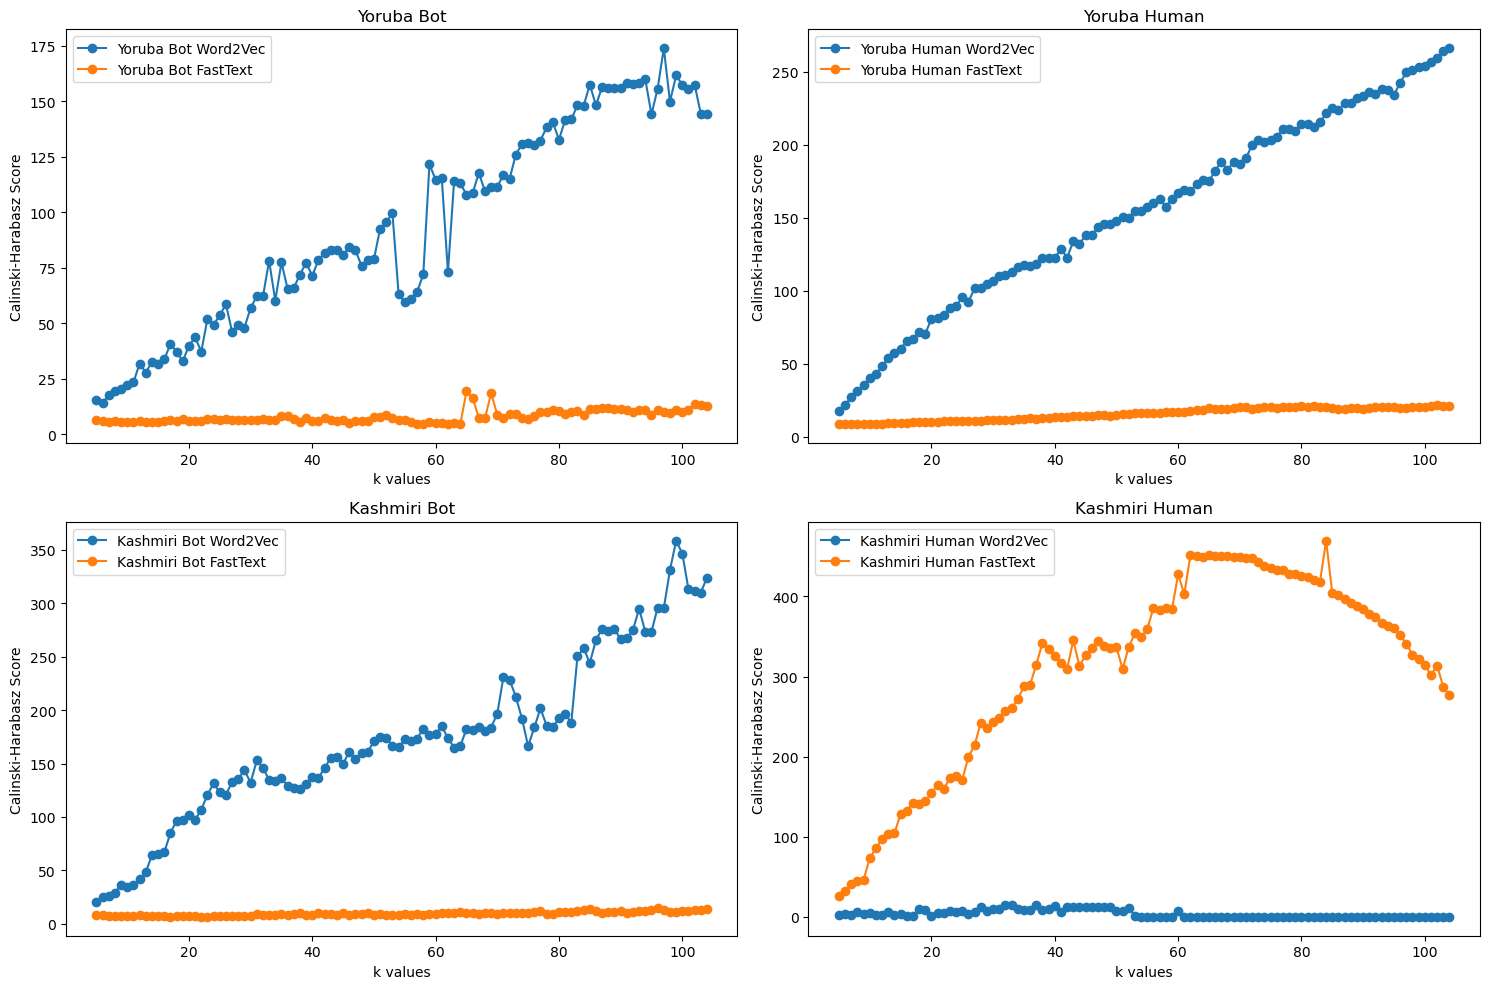

Best k values for each dataset:
Yoruba Bot Word2Vec: 97
Yoruba Human Word2Vec: 104
Kashmiri Bot Word2Vec: 99
Kashmiri Human Word2Vec: 32
Yoruba Bot FastText: 65
Yoruba Human FastText: 102
Kashmiri Bot FastText: 96
Kashmiri Human FastText: 84


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import calinski_harabasz_score
from tqdm import tqdm

# Define the datasets and their labels for easier management
languages = ['Yoruba', 'Kashmiri']
types = ['Bot', 'Human']
models = ['Word2Vec', 'FastText']
datasets = {
    'Yoruba Bot Word2Vec': vectors_yoruba_bot_wv,
    'Yoruba Human Word2Vec': vectors_yoruba_human_wv,
    'Kashmiri Bot Word2Vec': vectors_kashmiri_bot_wv,
    'Kashmiri Human Word2Vec': vectors_kashmiri_human_wv,
    'Yoruba Bot FastText': vectors_yoruba_bot_ft,
    'Yoruba Human FastText': vectors_yoruba_human_ft,
    'Kashmiri Bot FastText': vectors_kashmiri_bot_ft,
    'Kashmiri Human FastText': vectors_kashmiri_human_ft
}

# Define k and h values for each dataset
k_h_values = {
    'Yoruba Bot Word2Vec': {'k': 10, 'h': 15},
    'Yoruba Human Word2Vec': {'k': 58, 'h': 15},
    'Kashmiri Bot Word2Vec': {'k': 22, 'h': 15},
    'Kashmiri Human Word2Vec': {'k': 59, 'h': 15},
    'Yoruba Bot FastText': {'k': 59, 'h': 15},
    'Yoruba Human FastText': {'k': 6, 'h': 15},
    'Kashmiri Bot FastText': {'k': 58, 'h': 15},
    'Kashmiri Human FastText': {'k': 57, 'h': 15}
}

fig, axs = plt.subplots(2, 2, figsize=(15, 10))  # Adjust subplot grid as necessary
axs = axs.flatten()
best_k_values = []

for idx, (lang_type, vectors) in enumerate(datasets.items()):
    k_values = range(5, 105)
    ch_scores = []
    max_ch_score = 0
    best_k = 0

    for k in tqdm(k_values, desc=f"Processing {lang_type}"):
        wishart = Wishart(wishart_neighbors=k, significance_level=k_h_values[lang_type]['h'])
        labels = wishart.fit(vectors)
        if np.unique(labels).size > 1:  # Ensure there's more than one cluster
            ch_score = calinski_harabasz_score(vectors, labels)
            ch_scores.append(ch_score)
            if ch_score > max_ch_score:
                max_ch_score = ch_score
                best_k = k
        else:
            ch_scores.append(0)  # Assign a zero score if only one cluster

    best_k_values.append(best_k)  # Append the best k for this dataset

    # Select the appropriate subplot based on language and type
    if 'Yoruba' in lang_type:
        plot_index = 0 if 'Bot' in lang_type else 1
    else:  # Kashmiri
        plot_index = 2 if 'Bot' in lang_type else 3

    # Plotting
    axs[plot_index].plot(k_values, ch_scores, marker='o', linestyle='-', label=f'{lang_type}')
    axs[plot_index].set_title(f'{languages[plot_index // 2]} {types[plot_index % 2]}')
    axs[plot_index].set_xlabel('k values')
    axs[plot_index].set_ylabel('Calinski-Harabasz Score')
    axs[plot_index].legend()

plt.tight_layout()
plt.show()

print("Best k values for each dataset:")
for name, k in zip(datasets, best_k_values):
    print(f"{name}: {k}")

# Visualizations

## T-SNE Visualization technique implementation

In [28]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

# Function to find representative n-grams for each cluster
def find_representative_ngrams(ngrams, vectors, labels):
    # Check for out of bounds label indices
    if np.any(labels >= len(vectors)):
        raise ValueError("Label index exceeds vector bounds")

    unique_labels = np.unique(labels)
    representative_ngrams = {}

    for label in unique_labels:
        cluster_indices = np.where(labels == label)[0]
        if cluster_indices.size == 0:
            continue
        cluster_vectors = vectors[cluster_indices]
        cluster_center = np.mean(cluster_vectors, axis=0)
        distances = euclidean_distances(cluster_vectors, [cluster_center])
        min_index = np.argmin(distances)
        representative_ngram = ngrams[cluster_indices[min_index]]
        representative_ngrams[label] = representative_ngram

    return representative_ngrams
    

# lists of ngrams and vectors for each dataset
ngrams_lists = [ngrams_yoruba_bot_wv, ngrams_yoruba_human_wv, ngrams_kashmiri_bot_wv, ngrams_kashmiri_human_wv,
                ngrams_yoruba_bot_ft, ngrams_yoruba_human_ft, ngrams_kashmiri_bot_ft, ngrams_kashmiri_human_ft]

vectors_lists = [vectors_yoruba_bot_wv, vectors_yoruba_human_wv, vectors_kashmiri_bot_wv, vectors_kashmiri_human_wv,
                 vectors_yoruba_bot_ft, vectors_yoruba_human_ft, vectors_kashmiri_bot_ft, vectors_kashmiri_human_ft]


# list of all labels for easy iteration
label_sets = [labels_yoruba_bot_wv, labels_yoruba_human_wv, labels_kashmiri_bot_wv, labels_kashmiri_human_wv,
              labels_yoruba_bot_ft, labels_yoruba_human_ft, labels_kashmiri_bot_ft, labels_kashmiri_human_ft]

titles = ["Yoruba Bot W2V", "Yoruba Human W2V", "Kashmiri Bot W2V", "Kashmiri Human W2V",
          "Yoruba Bot FT", "Yoruba Human FT", "Kashmiri Bot FT", "Kashmiri Human FT"]

# plt.figure(figsize=(20, 24))
# for i, (labels, vectors, ngrams) in enumerate(zip(label_sets, vectors_lists, ngrams_lists), 1):
#     plt.subplot(4, 2, i)

#     # Ensure labels do not exceed vector bounds
#     if max(labels) >= len(vectors):
#         print(f"Skipping dataset {i} due to label index exceeding vector bounds.")
#         continue

#     # Calculate representative n-grams
#     rep_ngrams = find_representative_ngrams(ngrams, vectors, labels)

#     # Perform t-SNE
#     tsne = TSNE(n_components=2, perplexity=30, n_iter=1000)
#     tsne_results = tsne.fit_transform(vectors)

#     scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='viridis', alpha=0.6)
#     plt.colorbar(scatter)

#     # Annotate representative n-grams
#     """for label, ngram in rep_ngrams.items():
#         indices = np.where(labels == label)[0]
#         mean_x = np.mean(tsne_results[indices, 0])
#         mean_y = np.mean(tsne_results[indices, 1])
#         plt.annotate(ngram, (mean_x, mean_y), textcoords="offset points", xytext=(0,10), ha='center')"""

#     plt.title(f't-SNE visualization of {titles[i-1]} N-gram Clusters')

# plt.tight_layout()
# plt.show()

In [29]:
for i, (labels, vectors) in enumerate(zip(label_sets, vectors_lists)):
    print(f"Dataset {i+1} ({titles[i]}):")
    print(f"  Vectors shape: {vectors.shape}")
    print(f"  Labels length: {len(labels)}")
    if len(labels) != len(vectors):
        print("  WARNING: Mismatch between vectors and labels!")

Dataset 1 (Yoruba Bot W2V):
  Vectors shape: (16865, 30)
  Labels length: 16865
Dataset 2 (Yoruba Human W2V):
  Vectors shape: (526128, 30)
  Labels length: 526128
Dataset 3 (Kashmiri Bot W2V):
  Vectors shape: (20033, 30)
  Labels length: 20033
Dataset 4 (Kashmiri Human W2V):
  Vectors shape: (55290, 30)
  Labels length: 55290
Dataset 5 (Yoruba Bot FT):
  Vectors shape: (16865, 30)
  Labels length: 16865
Dataset 6 (Yoruba Human FT):
  Vectors shape: (526128, 30)
  Labels length: 526128
Dataset 7 (Kashmiri Bot FT):
  Vectors shape: (20033, 30)
  Labels length: 16865
Dataset 8 (Kashmiri Human FT):
  Vectors shape: (55290, 30)
  Labels length: 526128


/Users/farhananoor/anaconda3/envs/nlp_env/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/farhananoor/anaconda3/envs/nlp_env/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/farhananoor/anaconda3/envs/nlp_env/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/farhananoor/anaconda3/envs/nlp_env/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/Users/farhananoor/anaconda3/envs/nlp_env/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to '

Adjusting dataset 7 (Kashmiri Bot FT): using first 16865 elements


/Users/farhananoor/anaconda3/envs/nlp_env/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Adjusting dataset 8 (Kashmiri Human FT): using first 55290 elements


/Users/farhananoor/anaconda3/envs/nlp_env/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


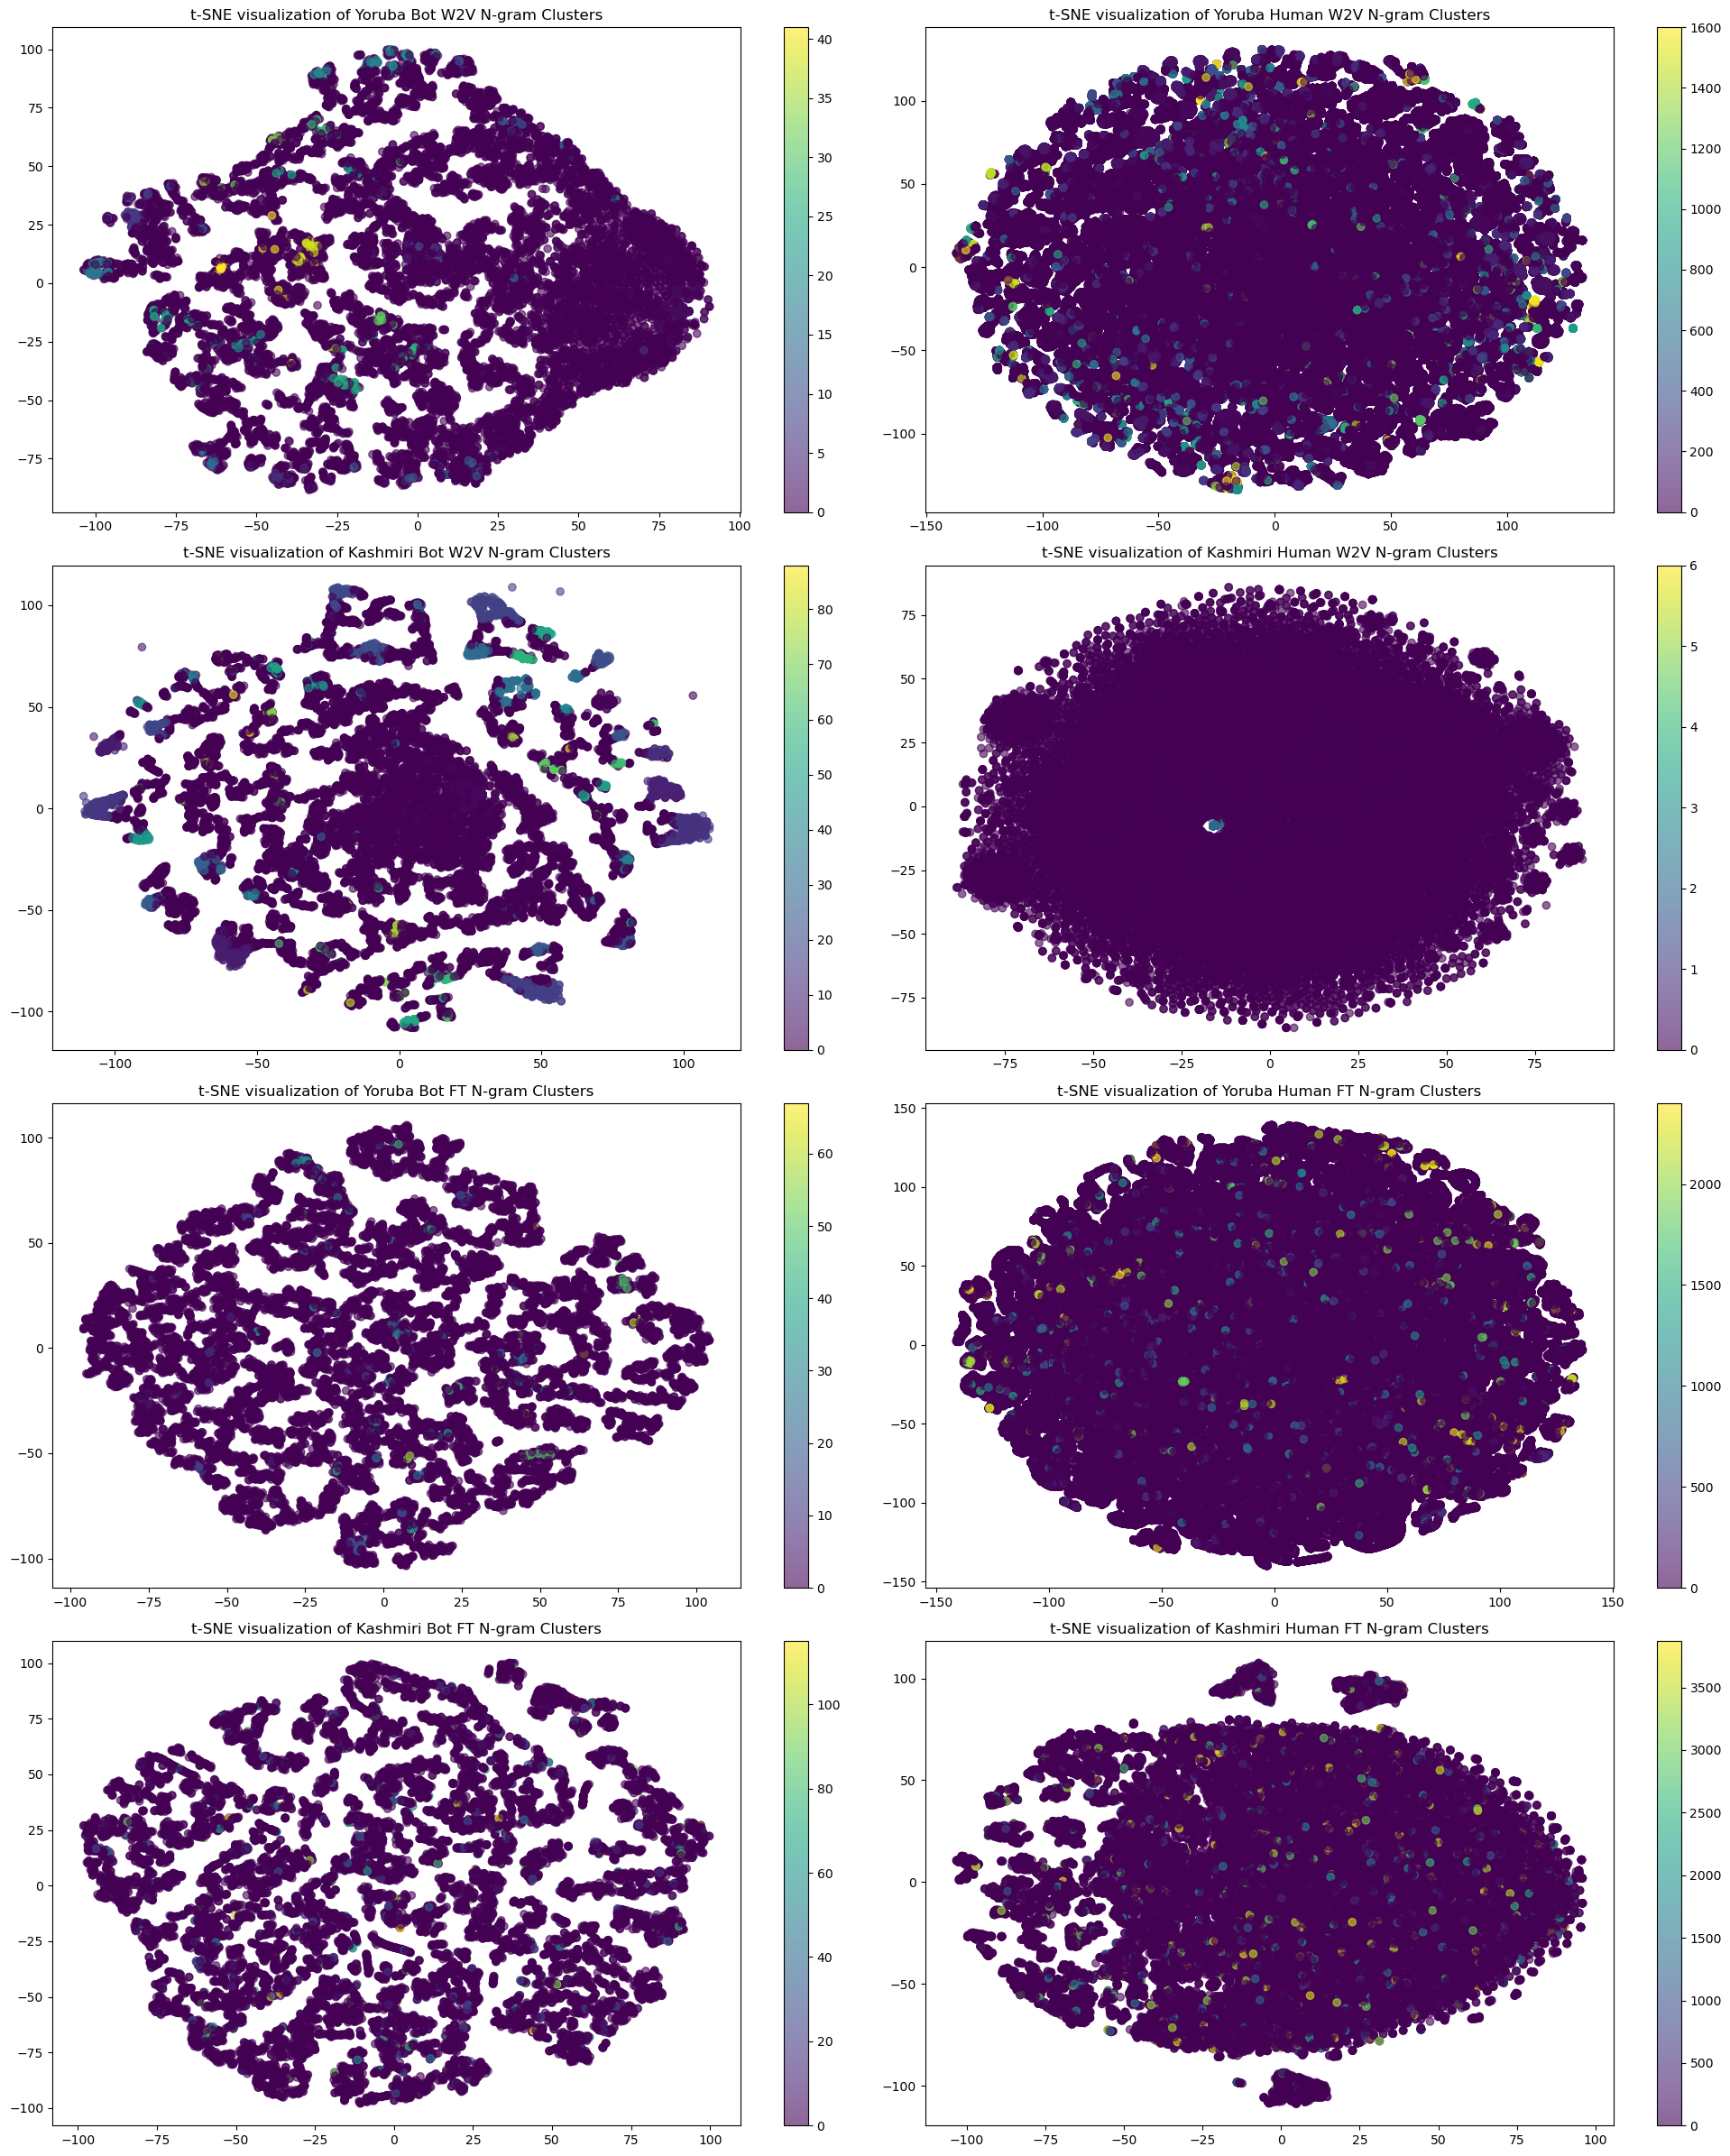

In [30]:
plt.figure(figsize=(20, 24))
for i, (labels, vectors, ngrams) in enumerate(zip(label_sets, vectors_lists, ngrams_lists), 1):
    plt.subplot(4, 2, i)
    
    # Check for length mismatch
    if len(labels) != len(vectors):
        min_length = min(len(labels), len(vectors))
        print(f"Adjusting dataset {i} ({titles[i-1]}): using first {min_length} elements")
        labels = labels[:min_length]
        vectors = vectors[:min_length]
        ngrams = ngrams[:min_length]
    
    # Your existing checks and processing
    if max(labels) >= len(vectors):
        print(f"Skipping dataset {i} due to label index exceeding vector bounds.")
        continue
        
    # Rest of your code remains the same
    rep_ngrams = find_representative_ngrams(ngrams, vectors, labels)
    tsne = TSNE(n_components=2, perplexity=30, n_iter=1000)
    tsne_results = tsne.fit_transform(vectors)
    
    scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='viridis', alpha=0.6)
    plt.colorbar(scatter)
    
    plt.title(f't-SNE visualization of {titles[i-1]} N-gram Clusters')

plt.tight_layout()
plt.show()

## PCA

In [36]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have lists of vectors for each dataset
vectors_lists = [vectors_yoruba_bot_wv, vectors_yoruba_human_wv, vectors_kashmiri_bot_wv, vectors_kashmiri_human_wv,
                 vectors_yoruba_bot_ft, vectors_yoruba_human_ft, vectors_kashmiri_bot_ft, vectors_kashmiri_human_ft]


# list of all labels for easy iteration
label_sets = [labels_yoruba_bot_wv, labels_yoruba_human_wv, labels_kashmiri_bot_wv, labels_kashmiri_human_wv,
              labels_yoruba_bot_ft, labels_yoruba_human_ft, labels_kashmiri_bot_ft, labels_kashmiri_human_ft]

titles = ["Yoruba Bot W2V", "Yoruba Human W2V", "Kashmiri Bot W2V", "Kashmiri Human W2V",
          "Yoruba Bot FT", "Yoruba Human FT", "Kashmiri Bot FT", "Kashmiri Human FT"]


# plt.figure(figsize=(20, 24))
# for i, (vectors, labels) in enumerate(zip(vectors_lists, label_sets), 1):
#     plt.subplot(4, 2, i)
#     pca = PCA(n_components=2)
#     reduced_vectors = pca.fit_transform(vectors)

#     scatter = plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=labels, cmap='viridis', alpha=0.6)
#     plt.colorbar(scatter)
#     plt.title(f'PCA Visualization of {titles[i-1]} N-grams')
#     plt.xlabel('PCA Component 1')
#     plt.ylabel('PCA Component 2')

# plt.tight_layout()
# plt.show()

In [37]:
for i, (labels, vectors, ngrams) in enumerate(zip(label_sets, vectors_lists, ngrams_lists)):
    print(f"Dataset {i+1} ({titles[i]}):")
    print(f"  Vectors shape: {vectors.shape}")
    print(f"  Labels length: {len(labels)}")
    print(f"  Ngrams length: {len(ngrams)}")
    if len(labels) != len(vectors):
        print("  WARNING: Mismatch between vectors and labels!")

Dataset 1 (Yoruba Bot W2V):
  Vectors shape: (16865, 30)
  Labels length: 16865
  Ngrams length: 16865
Dataset 2 (Yoruba Human W2V):
  Vectors shape: (526128, 30)
  Labels length: 526128
  Ngrams length: 526128
Dataset 3 (Kashmiri Bot W2V):
  Vectors shape: (20033, 30)
  Labels length: 20033
  Ngrams length: 20033
Dataset 4 (Kashmiri Human W2V):
  Vectors shape: (55290, 30)
  Labels length: 55290
  Ngrams length: 55290
Dataset 5 (Yoruba Bot FT):
  Vectors shape: (16865, 30)
  Labels length: 16865
  Ngrams length: 16865
Dataset 6 (Yoruba Human FT):
  Vectors shape: (526128, 30)
  Labels length: 526128
  Ngrams length: 526128
Dataset 7 (Kashmiri Bot FT):
  Vectors shape: (20033, 30)
  Labels length: 16865
  Ngrams length: 20033
Dataset 8 (Kashmiri Human FT):
  Vectors shape: (55290, 30)
  Labels length: 526128
  Ngrams length: 55290


Adjusting dataset 7 (Kashmiri Bot FT): using first 16865 elements
Adjusting dataset 8 (Kashmiri Human FT): using first 55290 elements


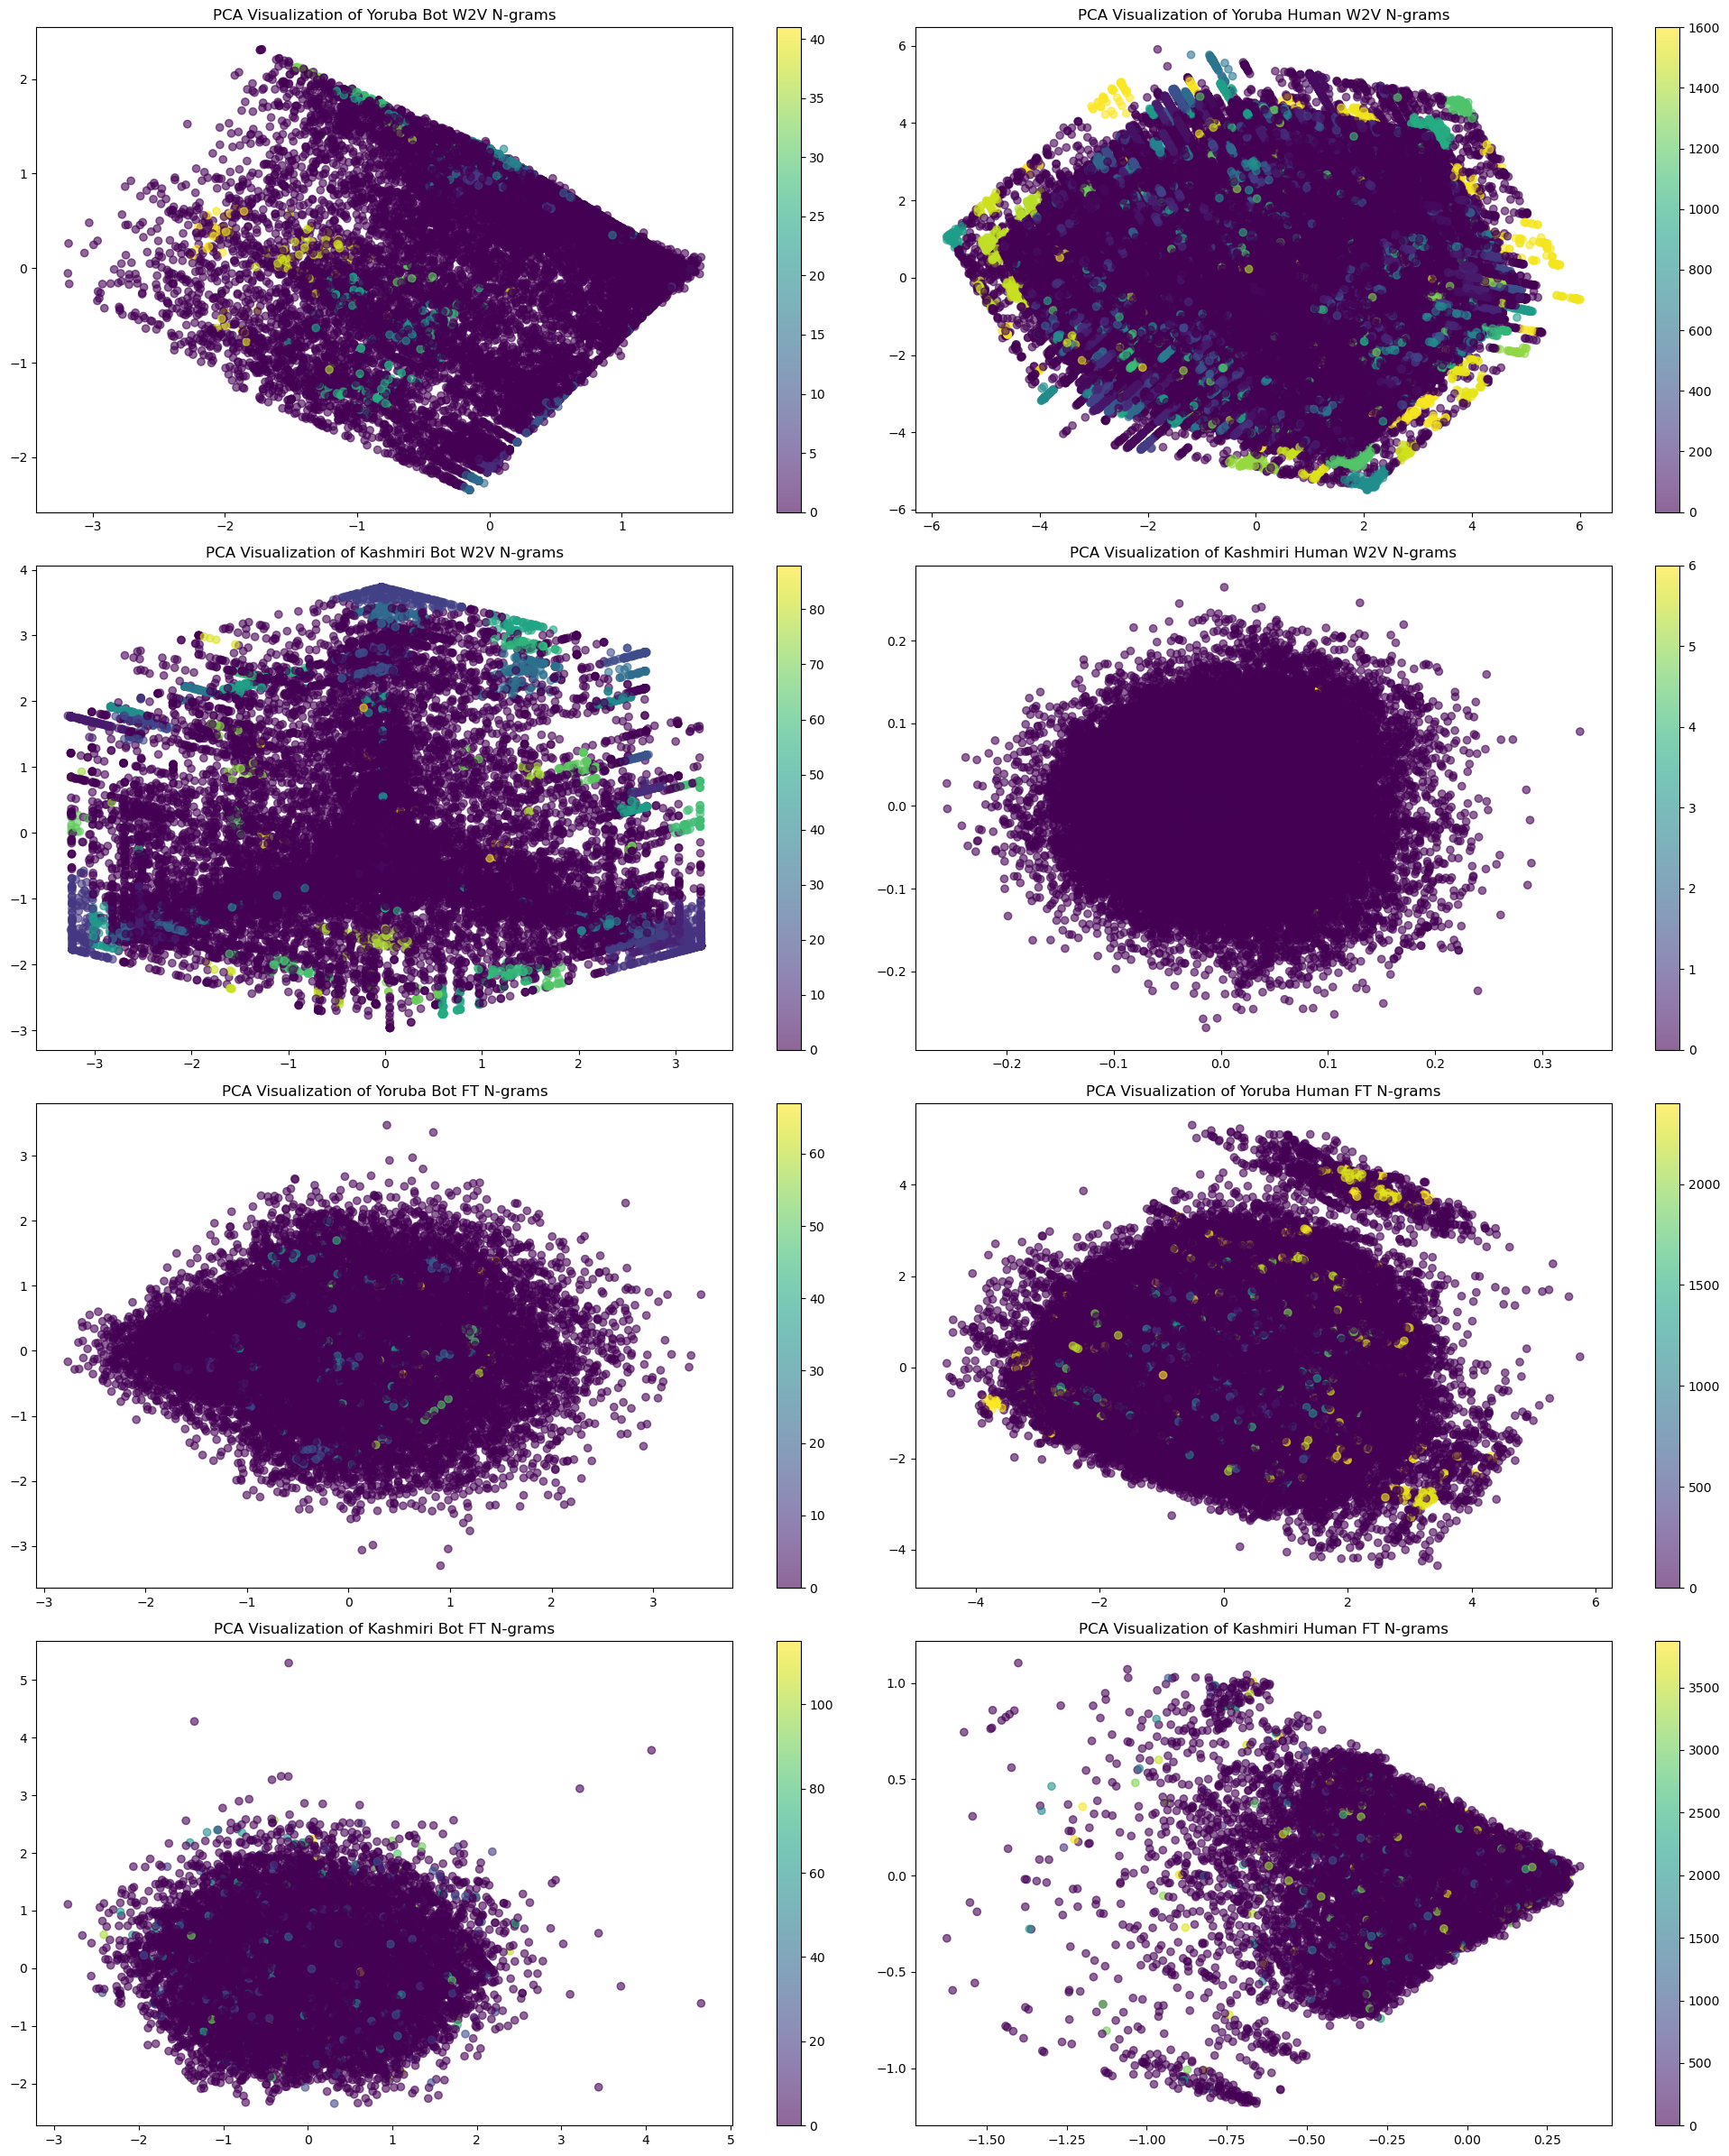

In [38]:
plt.figure(figsize=(20, 24))
for i, (labels, vectors, ngrams) in enumerate(zip(label_sets, vectors_lists, ngrams_lists), 1):
    plt.subplot(4, 2, i)
    
    # Ensure all arrays have the same length
    min_length = min(len(labels), len(vectors), len(ngrams))
    if min_length != len(labels) or min_length != len(vectors) or min_length != len(ngrams):
        print(f"Adjusting dataset {i} ({titles[i-1]}): using first {min_length} elements")
        labels = labels[:min_length]
        vectors = vectors[:min_length]
        ngrams = ngrams[:min_length]
    
    # Check for label bounds
    if max(labels) >= len(vectors):
        print(f"Skipping dataset {i} due to label index exceeding vector bounds.")
        continue
        
    # Perform dimensionality reduction
    pca = PCA(n_components=2)
    reduced_vectors = pca.fit_transform(vectors)
    
    # Plot with consistent lengths
    scatter = plt.scatter(
        reduced_vectors[:, 0], 
        reduced_vectors[:, 1], 
        c=labels, 
        cmap='viridis', 
        alpha=0.6
    )
    plt.colorbar(scatter)
    plt.title(f'PCA Visualization of {titles[i-1]} N-grams')

plt.tight_layout()
plt.show()

## Entropy-Complexity Plane Implementation

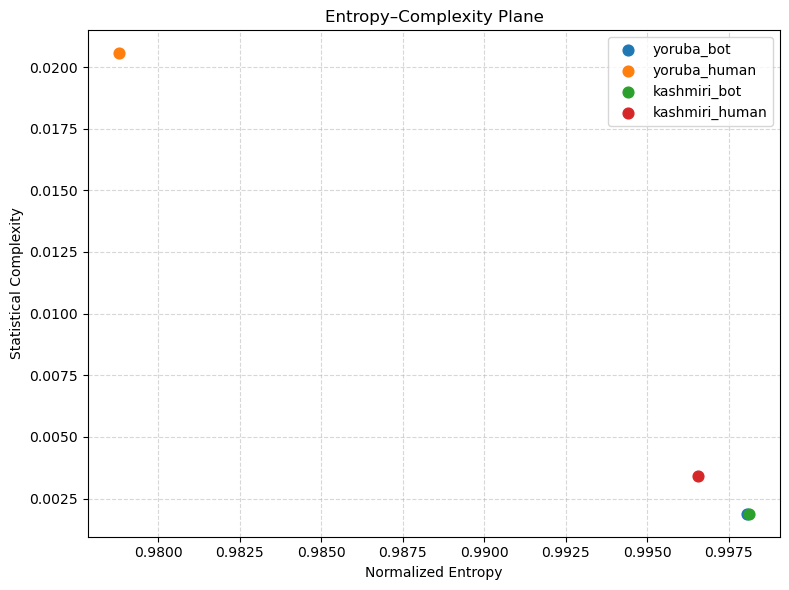

yoruba_bot: H = 0.9981, C = 0.0019
yoruba_human: H = 0.9788, C = 0.0206
kashmiri_bot: H = 0.9981, C = 0.0019
kashmiri_human: H = 0.9966, C = 0.0034


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations

# Shannon entropy
def entropy(P):
    P = P[P != 0]
    return -np.sum(P * np.log(P))

# Normalized Shannon entropy
def normalized_entropy(P):
    N = len(P)
    P_e = np.ones(N) / N
    return entropy(P) / entropy(P_e)

# Jensen–Shannon divergence
def divergence(P1, P2, Q0):
    return Q0 * (
        entropy((P1 + P2) / 2)
        - 0.5 * entropy(P1)
        - 0.5 * entropy(P2)
    )

# Normalizing constant Q0
def Q0(dist):
    D = len(dist)
    return 1 / (
        np.log(2 * D)
        + (D + 1) * np.log(1 / (D + 1)) / D / 2
        - np.log(D) / 2
    )

# Statistical complexity
def complexity(P):
    H = normalized_entropy(P)
    P_e = np.ones(len(P)) / len(P)
    return H * divergence(P, P_e, Q0(P))

# Ordinal distribution from a numeric series
def get_distribution(ts, D=3):
    perms = list(permutations(range(D)))
    idx = {p: i for i, p in enumerate(perms)}
    counts = np.zeros(len(perms))
    for i in range(len(ts) - D + 1):
        window = ts[i : i + D]
        perm = tuple(np.argsort(window))
        counts[idx[perm]] += 1
    return counts / counts.sum()

# Entropy & complexity for a series
def entropy_complexity(ts, D=3):
    P = get_distribution(ts, D)
    return normalized_entropy(P), complexity(P)

# Convert text string to numeric series (ASCII codes)
def text_to_series(text):
    return [ord(c) for c in text]

if __name__ == "__main__":
    # If your data are loaded as Python strings:
    texts = {
        "yoruba_bot":      processed_yoruba_bot,
        "yoruba_human":    processed_yoruba_human,
        "kashmiri_bot":    processed_kashmiri_bot,
        "kashmiri_human":  processed_kashmiri_human
    }


    results = {}
    for label, txt in texts.items():
        series = text_to_series(txt)
        H, C = entropy_complexity(series, D=3)
        results[label] = (H, C)

    # Plotting
    plt.figure(figsize=(8, 6))
    for label, (H, C) in results.items():
        plt.scatter(H, C, label=label, s=60)
    plt.xlabel("Normalized Entropy")
    plt.ylabel("Statistical Complexity")
    plt.title("Entropy–Complexity Plane")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Print values
    for label, (H, C) in results.items():
        print(f"{label}: H = {H:.4f}, C = {C:.4f}")

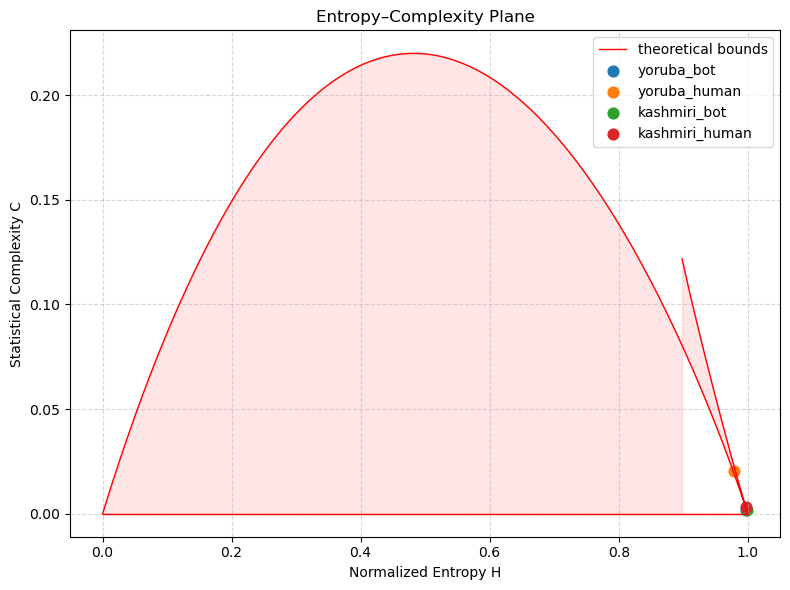

yoruba_bot: H = 0.9981, C = 0.0019
yoruba_human: H = 0.9788, C = 0.0206
kashmiri_bot: H = 0.9981, C = 0.0019
kashmiri_human: H = 0.9966, C = 0.0034


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
import math

# 1) Shannon entropy
def shannon_entropy(P):
    P = P[P > 0]
    return -np.sum(P * np.log(P))


# 2) Normalized entropy H[P] = S[P] / S_max = S[P] / ln(N)
def normalized_entropy(P):
    S = shannon_entropy(P)
    return S / np.log(len(P))


# 3) Jensen–Shannon divergence J[P,Q]
def jensen_shannon(P, Q):
    M = 0.5 * (P + Q)
    return shannon_entropy(M) - 0.5 * shannon_entropy(P) - 0.5 * shannon_entropy(Q)


# 4) MPR complexity C[P] = Q0 ⋅ J[P,Pe] ⋅ H[P]
#    where Pe = uniform distribution, and Q0 is the normalizing constant :contentReference[oaicite:0]{index=0}:contentReference[oaicite:1]{index=1}
def mpr_complexity(P):
    n = len(P)
    Pe = np.ones(n) / n
    # normalization constant Q0 (from Rosso et al. 2007)
    Q0 = 1 / (
        np.log(2 * n)
        + (n + 1) * np.log(1 / (n + 1)) / (2 * n)
        - 0.5 * np.log(n)
    )
    return normalized_entropy(P) * Q0 * jensen_shannon(P, Pe)


# 5) Ordinal‐pattern distribution with order D and time‐lag tau
def ordinal_distribution(ts, D=3, tau=1):
    perms = list(permutations(range(D)))
    index = {p: i for i, p in enumerate(perms)}
    counts = np.zeros(len(perms), dtype=float)

    # slide a window of length D with step τ
    for i in range(len(ts) - (D - 1) * tau):
        window = ts[i : i + D * tau : tau]
        ranks = tuple(np.argsort(window))
        counts[index[ranks]] += 1

    return counts / counts.sum()


# 6) Compute (H, C) for a time‐series
def entropy_complexity(ts, D=3, tau=1):
    P = ordinal_distribution(ts, D, tau)
    return normalized_entropy(P), mpr_complexity(P)


# 7) Build theoretical bounds on the plane:
#    – upper: P = [p, (1−p)/(n−1), …]
#    – lower: C=0 (straight line from (0,0) to (1,0)) :contentReference[oaicite:2]{index=2}:contentReference[oaicite:3]{index=3}
def theoretical_bounds(D, points=200):
    n = math.factorial(D)
    Hs, Cs = [], []
    Pe = np.ones(n) / n

    for p in np.linspace(0, 1, points):
        P = np.array([p] + [(1 - p) / (n - 1)] * (n - 1))
        Hs.append(normalized_entropy(P))
        Cs.append(mpr_complexity(P))

    return np.array(Hs), np.array(Cs)


if __name__ == "__main__":
    # ---- load or define your texts here ----
    texts = {
        "yoruba_bot":      processed_yoruba_bot,
        "yoruba_human":    processed_yoruba_human,
        "kashmiri_bot":    processed_kashmiri_bot,
        "kashmiri_human":  processed_kashmiri_human
    }

    # 8) Compute H,C for each text
    results = {}
    for label, txt in texts.items():
        ts = np.array([ord(c) for c in txt])
        H, C = entropy_complexity(ts, D=3, tau=1)
        results[label] = (H, C)

    # 9) Get theoretical bounds
    Hb, Cb = theoretical_bounds(D=3, points=300)

    # 10) Plot
    plt.figure(figsize=(8, 6))

    # lower bound (zero complexity)
    plt.plot([0, 1], [0, 0], 'r-', lw=1)
    # upper bound
    plt.plot(Hb, Cb, 'r-', lw=1, label="theoretical bounds")

    # shade chaotic region (between bounds)
    plt.fill_between(Hb, 0, Cb, color='red', alpha=0.1)

    # scatter your results
    for label, (H, C) in results.items():
        plt.scatter(H, C, s=60, label=label)

    plt.xlabel("Normalized Entropy H")
    plt.ylabel("Statistical Complexity C")
    plt.title("Entropy–Complexity Plane")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 11) Print numeric values
    for label, (H, C) in results.items():
        print(f"{label}: H = {H:.4f}, C = {C:.4f}")

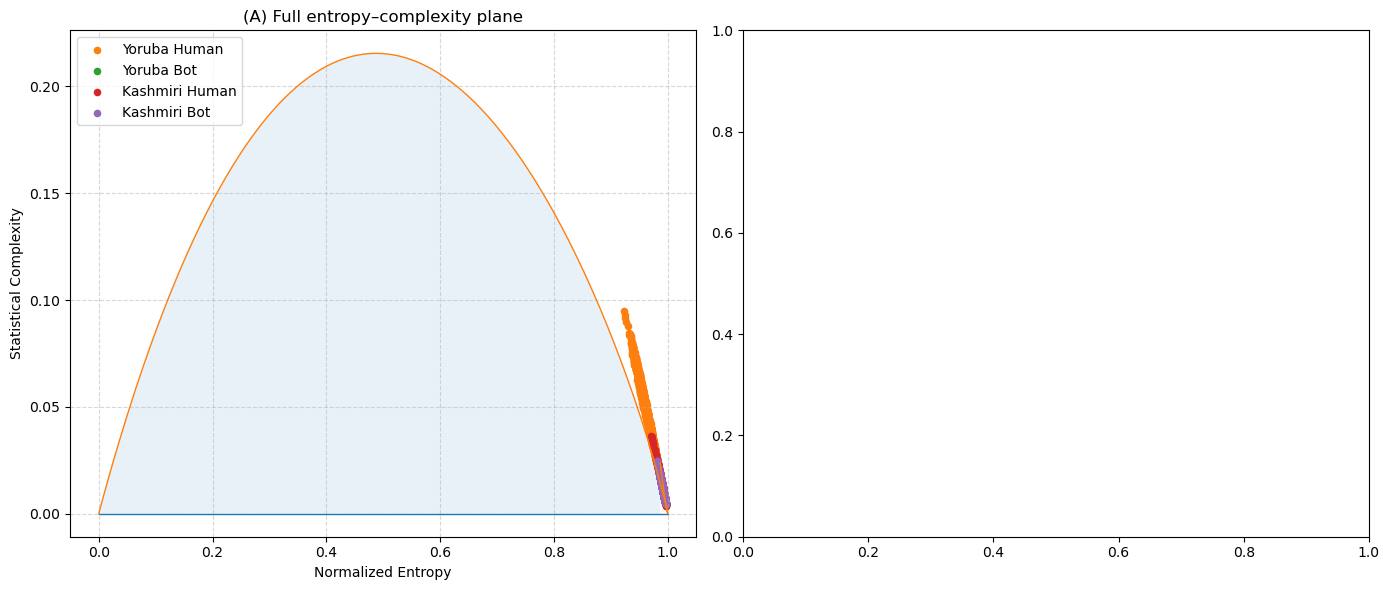

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
import math

# --- 1) Define entropy & complexity functions ---
def shannon_entropy(P):
    P = P[P > 0]
    return -np.sum(P * np.log(P))

def normalized_entropy(P):
    return shannon_entropy(P) / np.log(len(P))

def jensen_shannon(P, Q):
    M = 0.5 * (P + Q)
    return shannon_entropy(M) - 0.5 * shannon_entropy(P) - 0.5 * shannon_entropy(Q)

def mpr_complexity(P):
    n = len(P)
    Pe = np.ones(n) / n
    Q0 = 1 / (
        np.log(2 * n)
        + (n + 1) * np.log(1 / (n + 1)) / (2 * n)
        - 0.5 * np.log(n)
    )
    return normalized_entropy(P) * Q0 * jensen_shannon(P, Pe)

def ordinal_distribution(ts, D=4, tau=1):
    perms = list(permutations(range(D)))
    index = {p: i for i, p in enumerate(perms)}
    counts = np.zeros(len(perms), dtype=float)
    for i in range(len(ts) - (D - 1) * tau):
        window = ts[i : i + D * tau : tau]
        counts[index[tuple(np.argsort(window))]] += 1
    return counts / counts.sum()

def entropy_complexity(ts, D=4, tau=1):
    P = ordinal_distribution(ts, D, tau)
    return normalized_entropy(P), mpr_complexity(P)

def theoretical_bounds(D=4, points=300):
    n = math.factorial(D)
    Hb, Cb = [], []
    Pe = np.ones(n) / n
    for p in np.linspace(0, 1, points):
        P = np.array([p] + [(1 - p) / (n - 1)] * (n - 1))
        Hb.append(normalized_entropy(P))
        Cb.append(mpr_complexity(P))
    return np.array(Hb), np.array(Cb)

# --- 2) Load your processed texts here ---
# Replace these with your actual preprocessed text variables:
# processed_yoruba_human, processed_yoruba_bot, processed_kashmiri_human, processed_kashmiri_bot
texts = {
    "Yoruba Human": processed_yoruba_human,
    "Yoruba Bot": processed_yoruba_bot,
    "Kashmiri Human": processed_kashmiri_human,
    "Kashmiri Bot": processed_kashmiri_bot
}

# --- 3) Compute H & C over sliding windows ---
window_size = 2000
step = 500
D = 4
tau = 1

trajectories = {}
for label, txt in texts.items():
    ts = np.array([ord(c) for c in txt])
    Hs, Cs = [], []
    for start in range(0, len(ts) - window_size + 1, step):
        win = ts[start : start + window_size]
        H, C = entropy_complexity(win, D=D, tau=tau)
        Hs.append(H)
        Cs.append(C)
    trajectories[label] = (np.array(Hs), np.array(Cs))

# --- 4) Theoretical boundary curves ---
Hb, Cb = theoretical_bounds(D=D, points=300)

# --- 5) Plot two-panel figure ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Panel (A): Full plane
ax1.plot([0, 1], [0, 0], lw=1)            # lower bound (C = 0)
ax1.plot(Hb, Cb, lw=1)                     # upper bound
ax1.fill_between(Hb, 0, Cb, alpha=0.1)     # shaded chaotic region
for label, (Hs, Cs) in trajectories.items():
    ax1.scatter(Hs, Cs, s=20, label=label)
ax1.set_title("(A) Full entropy–complexity plane")
ax1.set_xlabel("Normalized Entropy")
ax1.set_ylabel("Statistical Complexity")
ax1.grid(True, linestyle="--", alpha=0.5)
ax1.legend(loc="upper left")

# # Panel (B): Zoomed region around your data
# ax2.plot([0, 1], [0, 0], lw=1)
# ax2.plot(Hb, Cb, lw=1)
# ax2.fill_between(Hb, 0, Cb, alpha=0.1)
# for label, (Hs, Cs) in trajectories.items():
#     ax2.scatter(Hs, Cs, s=20, label=label)
# # Adjust these limits to match your region of interest
# ax2.set_xlim(0.66, 0.78)
# ax2.set_ylim(0.58, 0.65)
# ax2.set_title("(B) Zoomed-in entropy–complexity")
# ax2.set_xlabel("Normalized Entropy")
# ax2.set_ylabel("Statistical Complexity")
# ax2.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()